In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [2]:
data = pd.read_csv('Data/data_to_process.csv')
pd.set_option('display.max_columns', 100)  

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1302 entries, 0 to 1301
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   buildingtype                     1302 non-null   object 
 1   primarypropertytype              1302 non-null   object 
 2   councildistrictcode              1302 non-null   int64  
 3   numberofbuildings                1302 non-null   float64
 4   numberoffloors                   1302 non-null   float64
 5   propertygfatotal                 1302 non-null   float64
 6   propertygfaparking               1302 non-null   float64
 7   propertygfabuilding(s)           1302 non-null   float64
 8   largestpropertyusetype           1302 non-null   object 
 9   largestpropertyusetypegfa        1302 non-null   float64
 10  secondlargestpropertyusetype     1302 non-null   object 
 11  secondlargestpropertyusetypegfa  1302 non-null   float64
 12  thirdlargestproperty

In [3]:
data = data.astype({'councildistrictcode' : object})

data.describe(include = object)

buildingtype primarypropertytype  councildistrictcode  \
count             1302                1302                 1302   
unique               4                   8                    7   
top     nonresidential              office                    7   
freq              1136                 335                  378   

       largestpropertyusetype secondlargestpropertyusetype  \
count                    1302                         1302   
unique                      8                            9   
top                    office                        aucun   
freq                      335                          842   

       thirdlargestpropertyusetype outlier  
count                         1302    1302  
unique                           7       2  
top                          aucun     non  
freq                          1123    1271

In [4]:
data.describe(exclude = object)

numberofbuildings  numberoffloors  propertygfatotal  \
count        1302.000000     1302.000000      1.302000e+03   
mean            1.160522        3.248848      8.771377e+04   
std             3.129409        4.546402      2.768324e+05   
min             1.000000        1.000000      1.128500e+04   
25%             1.000000        1.000000      2.780950e+04   
50%             1.000000        2.000000      4.515000e+04   
75%             1.000000        4.000000      8.731450e+04   
max           111.000000       99.000000      9.320156e+06   

       propertygfaparking  propertygfabuilding(s)  largestpropertyusetypegfa  \
count         1302.000000            1.302000e+03               1.302000e+03   
mean          6626.802995            8.108697e+04               7.453689e+04   
std          27589.939391            2.728842e+05               2.718226e+05   
min              0.000000            1.128500e+04               6.455000e+03   
25%              0.000000            2.709975e+04               2.392500e+04   
50%              0.000000            4.460750e+04               3.952050e+04   
75%              0.000000            7.889350e+04               7.171700e+04   
max         376000.000000            9.320156e+06               9.320156e+06   

       secondlargestpropertyusetypegfa  thirdlargestpropertyusetypegfa  \
count                      1302.000000                     1302.000000   
mean                       6846.312404                     1098.438018   
std                       21133.472957                     4830.562242   
min                           0.000000                        0.000000   
25%                           0.000000                        0.000000   
50%                           0.000000                        0.000000   
75%                        6674.750000                        0.000000   
max                      380639.000000                    80000.000000   

       energystarscore  siteenergyuse(kbtu)  ghgemissions(metrictonsco2e)  \
count       862.000000         1.302000e+03                   1302.000000   
mean         63.256961         6.444882e+06                    137.853940   
std          28.490219         2.801827e+07                    476.811288   
min           1.000000         1.697945e+04                     -0.800000   
25%          44.000000         1.103017e+06                     18.081250   
50%          70.500000         2.166226e+06                     44.527500   
75%          87.000000         5.471428e+06                    119.962500   
max         100.000000         8.739237e+08                  11140.560000   

       countofallpropertyusetypes  age_derniere_reno  electricity_ratio  \
count                 1302.000000        1302.000000        1302.000000   
mean                     1.684332          57.670507          68.271889   
std                      1.125916          32.537469          26.699163   
min                      1.000000           1.000000         -30.000000   
25%                      1.000000          31.000000          50.000000   
50%                      1.000000          54.000000          70.000000   
75%                      2.000000          88.000000         100.000000   
max                     13.000000         116.000000         100.000000   

         gas_ratio  steam_ratio  other_fuel_ratio   energy_log  \
count  1302.000000  1302.000000       1302.000000  1302.000000   
mean     29.454685     2.104455          0.069124    14.717142   
std      26.712130     9.246550          1.141011     1.243068   
min       0.000000     0.000000          0.000000     9.739818   
25%       0.000000     0.000000          0.000000    13.913560   
50%      30.000000     0.000000          0.000000    14.588497   
75%      50.000000     0.000000          0.000000    15.515050   
max     100.000000    80.000000         30.000000    20.588504   

       ghgemissions_log  
count       1302.000000  
mean           3.847044  
std            1.

In [5]:
def groupcol(df, energystar=False): #créer listes pour colonnes variables qualitatives ou quantitatives
    
    cat_col = df.select_dtypes(include = object).columns.tolist() #qualitatives
    
    #enlever les colonnes target et energystarscore si besoin
    
    if energystar == False: 
        drop_col = ['siteenergyuse(kbtu)','ghgemissions(metrictonsco2e)','energy_log', 'ghgemissions_log', 'energystarscore']
    else:
        drop_col = ['siteenergyuse(kbtu)','ghgemissions(metrictonsco2e)','energy_log', 'ghgemissions_log']
        
    num_col = df.drop(drop_col, axis = 1).select_dtypes(exclude = object).columns.tolist() #quantitatives
    
    return cat_col, drop_col, num_col

In [6]:
cat_col, drop_col, num_col = groupcol(data)

In [7]:
cat_col

['buildingtype',
 'primarypropertytype',
 'councildistrictcode',
 'largestpropertyusetype',
 'secondlargestpropertyusetype',
 'thirdlargestpropertyusetype',
 'outlier']

In [8]:
num_col

['numberofbuildings',
 'numberoffloors',
 'propertygfatotal',
 'propertygfaparking',
 'propertygfabuilding(s)',
 'largestpropertyusetypegfa',
 'secondlargestpropertyusetypegfa',
 'thirdlargestpropertyusetypegfa',
 'countofallpropertyusetypes',
 'age_derniere_reno',
 'electricity_ratio',
 'gas_ratio',
 'steam_ratio',
 'other_fuel_ratio']

In [9]:
from sklearn.model_selection import train_test_split

X = data.drop(drop_col, axis = 1)
y = data[['energy_log','ghgemissions_log', 'siteenergyuse(kbtu)', 'ghgemissions(metrictonsco2e)']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

In [10]:
def recupcolonne(colonne): #recup les colonnes targets pour avoir differents yu en fonction de comment entrainer (elec, co2, log )
    
    return y_train[colonne], y_test[colonne]

In [11]:
y_train_elec, y_test_elec = recupcolonne('siteenergyuse(kbtu)')
y_train_eleclog, y_test_eleclog = recupcolonne('energy_log')
y_train_co2, y_test_co2 = recupcolonne('ghgemissions(metrictonsco2e)')
y_train_co2log, y_test_co2log = recupcolonne('ghgemissions_log')

In [12]:
from sklearn.preprocessing import OneHotEncoder #encodage categories, OneHot car pas de relation d'ordre entre les differentes categories de 'meme type'

buildingtypes_unique = ['campus', 'nonresidential', 'nonresidential cos', 'sps-district k-12']
districts_unique = [1, 2, 3, 4, 5, 6, 7]
propertytypes1 = ['office', 'warehouse', 'education', 'store', 'residential services', 'worship facility', 'medical', 'other']
propertytypes2 = ['office', 'warehouse', 'education', 'store', 'residential services', 'worship facility', 'medical', 'aucun', 'other']
outliers_unique = ['oui', 'non']

encoderbuildingtypes = OneHotEncoder(categories = [buildingtypes_unique])
encoderdistricts = OneHotEncoder(categories = [districts_unique])
encoderpropertytypes1 = OneHotEncoder(categories = [propertytypes1,propertytypes1])
encoderpropertytypes2 = OneHotEncoder(categories = [propertytypes2, propertytypes2])
encoderoutliers = OneHotEncoder(categories = [outliers_unique])

In [13]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler #Scaler moins sensible aux outliers

col_modif = ColumnTransformer(transformers = [('buildingtype', encoderbuildingtypes, ['buildingtype']), ('districts', encoderdistricts, ['councildistrictcode']),
                                            ('primarypropertytype', encoderpropertytypes1, ['primarypropertytype', 'largestpropertyusetype']),
                                            ('secondarypropertytypes', encoderpropertytypes2, ['secondlargestpropertyusetype', 'thirdlargestpropertyusetype']),('outliers', encoderoutliers, ['outlier']),
                                            ('scaler',RobustScaler(),num_col)])

#transformer pour mettre dans pipeline : d'abord encodage categories puis scaler des variables quantitatives

In [14]:
from sklearn.model_selection import GridSearchCV

def gridsearch(pipe, params, ytrain):
    
    return GridSearchCV(pipe, param_grid = params, cv = 5, scoring = 'r2', n_jobs = -1).fit(X_train, ytrain)

# Regression linéaire

In [15]:
from sklearn.linear_model import LinearRegression #servira de baseline
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error as mse

pipe_lr = Pipeline([('preprocessing', col_modif), ('estimator', LinearRegression())])

params_lr = {'estimator__fit_intercept' : [True, False]}

lr_elec = gridsearch(pipe_lr, params_lr, y_train_elec)

lr_co2 = gridsearch(pipe_lr, params_lr, y_train_co2)

lr_eleclog = gridsearch(pipe_lr, params_lr, y_train_eleclog)

lr_co2log = gridsearch(pipe_lr, params_lr, y_train_co2log)

In [16]:
def testplot(x,y):
    
    return sns.scatterplot(x = x, y = y, color = 'b' ) #trace les points du jeu de test avec leurs vraies valeurs

In [17]:
def predictplot(modelec,modco2,xtest): #precision du xtest pour le 'zoom'
    
    return sns.scatterplot(x = modelec.predict(xtest), y = modco2.predict(xtest), color = 'r', alpha = 0.6) #trace les valeurs predictes

In [18]:
def convertpredictplot(modelec, modco2, xtest):#precision du xtest pour le 'zoom'
    
    return sns.scatterplot(x = np.expm1(modelec.predict(xtest)), y = np.expm1(modco2.predict(xtest)), color = 'r', alpha = 0.6) #convertir les valeurs prédites lors de l'utilisation du passage au log

In [19]:
def graph(mod_elec, mod_co2, log, convert = False, zoom = 1e7, type_modele=''):
        
    indexzoom = y_test_elec[y_test_elec<zoom].index #récupérer les points définis par le zoom
    legend = ['valeurs test', 'valeurs prédites']
        
    if convert == True: #utilisation du log et transformation inverse
        
        fig = plt.figure(figsize = (25,7))
        
        fig.add_subplot(1,2,1)
        testplot(y_test_elec, y_test_co2)
        convertpredictplot(mod_elec, mod_co2, X_test)
        plt.legend(labels = legend)
        plt.title('Affichage non zoomé')
        
        fig.add_subplot(1,2,2)
        testplot(y_test_elec[indexzoom], y_test_co2[indexzoom])
        convertpredictplot(mod_elec, mod_co2, X_test.loc[indexzoom])
        plt.legend(labels = legend)
        plt.title('Zoom sur les batiments à consommation électriques inférieures à '+str(zoom))
        
        fig.suptitle('Emission de CO2 en fonction de la consommation d\'électricité en utilisant les valeurs passées au log avec transformation inverse pour les modèles de type '+type_modele)
         
    
    elif log == True: #log sans transformation inverse
        
        fig = plt.figure(figsize = (15,7))
        testplot(y_test_eleclog, y_test_co2log)
        predictplot(mod_elec,mod_co2,X_test)
        plt.legend(labels = legend)
        fig.suptitle('Emission de CO2 en fonction de la consommation d\'électricité en utilisant les valeurs passées au log pour les modèles de type '+type_modele)
        
    else: #sans passage au log
        
        fig = plt.figure(figsize = (25,7))
            
        fig.add_subplot(1,2,1)
        testplot(y_test_elec, y_test_co2)
        predictplot(mod_elec,mod_co2,X_test)
        plt.legend(labels = legend)
        plt.title('Affichage non zoomé')
        
        fig.add_subplot(1,2,2)
        testplot(y_test_elec[indexzoom], y_test_co2[indexzoom])
        predictplot(mod_elec,mod_co2,X_test.loc[indexzoom])
        plt.legend(labels = legend)
        plt.title('Zoom sur les batiments à consommation électriques inférieures à '+str(zoom))
        
        fig.suptitle('Emission de CO2 en fonction de la consommation d\'électricité pour les modèles de type '+type_modele)

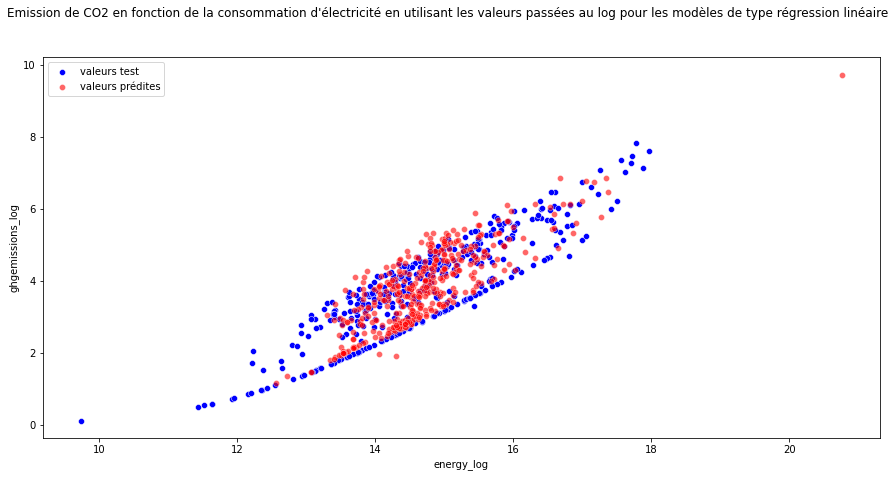

In [20]:
graph(lr_eleclog, lr_co2log, True, type_modele = 'régression linéaire')

In [21]:
X_test.iloc[lr_eleclog.predict(X_test).tolist().index(max(lr_eleclog.predict(X_test).tolist()))] #appercu des donnée sud point prédit le plus elevé en elec qui est ecarté du reste

buildingtype                       nonresidential
primarypropertytype                         other
councildistrictcode                             2
numberofbuildings                             1.0
numberoffloors                                3.0
propertygfatotal                        1172127.0
propertygfaparking                            0.0
propertygfabuilding(s)                  1172127.0
largestpropertyusetype                      other
largestpropertyusetypegfa               1172127.0
secondlargestpropertyusetype                aucun
secondlargestpropertyusetypegfa               0.0
thirdlargestpropertyusetype                 aucun
thirdlargestpropertyusetypegfa                0.0
outlier                                       non
countofallpropertyusetypes                    1.0
age_derniere_reno                              17
electricity_ratio                              70
gas_ratio                                      30
steam_ratio                                     0


In [22]:
X_test.propertygfatotal.describe()

count    3.910000e+02
mean     7.989998e+04
std      1.014381e+05
min      1.276900e+04
25%      2.762700e+04
50%      4.500000e+04
75%      9.226450e+04
max      1.172127e+06
Name: propertygfatotal, dtype: float64

In [23]:
#c'est la surface max du test set et assez éloigné des autres a priori, regardons celels du train set
X_train.propertygfatotal.describe()

count    9.110000e+02
mean     9.106744e+04
std      3.242177e+05
min      1.128500e+04
25%      2.800900e+04
50%      4.526400e+04
75%      8.630200e+04
max      9.320156e+06
Name: propertygfatotal, dtype: float64

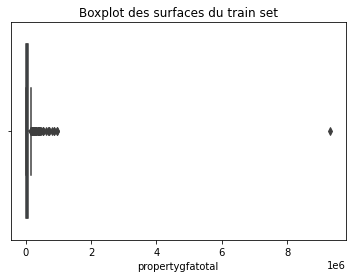

In [24]:
ax = sns.boxplot(data = X_train, x ='propertygfatotal')
ax.set_title('Boxplot des surfaces du train set');

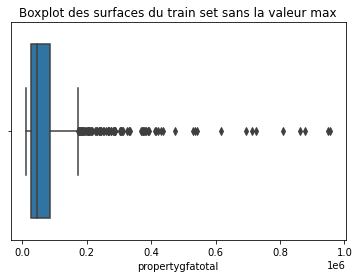

In [25]:
ax = sns.boxplot(data = X_train[X_train.propertygfatotal<2e06], x = 'propertygfatotal'); #on enleve la valeur max pour des raisons de visibilités
ax.set_title('Boxplot des surfaces du train set sans la valeur max');

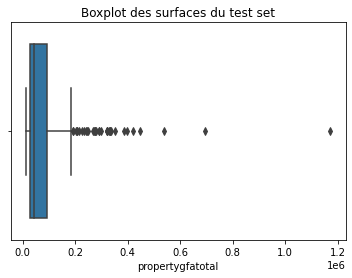

In [26]:
ax = sns.boxplot(data = X_test, x = 'propertygfatotal')
ax.set_title('Boxplot des surfaces du test set');

In [27]:
#le point excentré est quand meme un 'outlier' au niveau surface meme parmis le train set et il est très éloigné pour le test set, c'est peut etre une explication de cet écart important

In [28]:
X[X.propertygfatotal > 5e05] #regardons un peu les points aux surfaces elevées car il y en a quand meme dans le train set qui ont des surfaces proches du point éloigné

buildingtype   primarypropertytype councildistrictcode  \
2     nonresidential  residential services                   7   
15    nonresidential                 other                   7   
28    nonresidential             warehouse                   2   
91    nonresidential                 store                   5   
94    nonresidential               medical                   4   
97            campus             education                   5   
122   nonresidential                 other                   2   
157   nonresidential                 store                   7   
167   nonresidential                office                   7   
185   nonresidential  residential services                   7   
214   nonresidential                 store                   7   
391   nonresidential                 store                   7   
711   nonresidential  residential services                   7   
1028          campus             education                   7   
1260          campus                 other                   7   
1272          campus             education                   4   

      numberofbuildings  numberoffloors  propertygfatotal  propertygfaparking  \
2                   1.0            41.0          956110.0            196718.0   
15                  1.0            10.0          540360.0                 0.0   
28                  7.0             2.0          714095.0                 0.0   
91                  1.0             1.0          530039.0                 0.0   
94                  3.5            10.0          879000.0                 0.0   
97                 11.0             2.0          694072.0            111625.0   
122                 1.0             3.0         1172127.0                 0.0   
157                 1.0            10.0          693450.0                 0.0   
167                 1.0            42.0          617684.0            171500.0   
185                 1.0            12.0          542305.0                 0.0   
214                 1.0             8.0          861702.0                 0.0   
391                 1.0             1.0          947987.0            220092.5   
711                 1.0            14.0          724148.0             35895.0   
1028                7.5             2.0          537000.0                 0.0   
1260                7.0             4.0          808520.0            376000.0   
1272              111.0             1.0         9320156.0                 0.0   

      propertygfabuilding(s) largestpropertyusetype  \
2                   759392.0   residential services   
15                  540360.0                  other   
28                  714095.0              warehouse   
91                  530039.0                  store   
94                  879000.0                medical   
97                  582447.0              education   
122                1172127.0                  other   
157                 693450.0                  store   
167                 446184.0                 office   
185                 542305.0   residential services   
214                 861702.0                  store   
391                 727894.5                  store   
711                 688253.0   residential services   
1028                537000.0              education   
1260                432520.0                  other   
1272               9320156.0              education   

      largestpropertyusetypegfa secondlargestpropertyusetype  \
2                      756493.0                        aucun   
15                     537150.0                        aucun   
28                     714095.0                        aucun   
91                     505103.0                        other   
94                     879000.0                        aucun   
97                     667300.0                        aucun   
122                   1172127.0                        aucun   
157                    361107.0                       offic

In [29]:
y[X.propertygfatotal > 5e05] #leur consommations

energy_log  ghgemissions_log  siteenergyuse(kbtu)  \
2      18.100297          7.645053           72587024.0   
15     17.710562          7.266607           49158558.0   
28     17.683454          5.812756           47843892.0   
91     17.161624          6.614075           28392163.0   
94     19.346970          8.999262          252512144.0   
97     17.412942          5.997857           36504348.0   
122    17.878325          7.125074           58137710.0   
157    17.510573          5.982474           40248090.0   
167    17.440576          6.109270           37527176.0   
185    17.918421          7.921822           60516160.0   
214    16.687189          5.798577           17666646.0   
391    17.672593          5.801937           47327092.0   
711    17.435314          6.810947           37330216.0   
1028   18.150146          8.002343           76297118.0   
1260   18.875612          8.482780          157606480.0   
1272   20.588504          9.318438          873923712.0   

      ghgemissions(metrictonsco2e)  
2                         2089.280  
15                        1430.685  
28                         333.540  
91                         744.515  
94                        8096.110  
97                         401.565  
122                       1241.740  
157                        395.420  
167                        449.010  
185                       2755.790  
214                        328.830  
391                        329.940  
711                        906.730  
1028                      2986.950  
1260                      4829.860  
1272                     11140.560

In [30]:
X_test[X_test.age_derniere_reno < 25] #regardons les ages ( lors de l'analyse les abtiments jeunes consommaient plus)

buildingtype   primarypropertytype councildistrictcode  \
1017      nonresidential             warehouse                   4   
672   nonresidential cos                 other                   7   
55        nonresidential  residential services                   7   
1249      nonresidential               medical                   5   
418       nonresidential                 store                   1   
...                  ...                   ...                 ...   
753   nonresidential cos                 other                   6   
81     sps-district k-12             education                   3   
77        nonresidential                office                   4   
1239   sps-district k-12             education                   2   
936   nonresidential cos                 other                   2   

      numberofbuildings  numberoffloors  propertygfatotal  propertygfaparking  \
1017                1.0             4.0           38959.0                 0.0   
672                 1.0             1.0           21018.0                 0.0   
55                  1.0             6.0          107324.0             36934.0   
1249                1.0             2.0           53575.0                 0.0   
418                 1.0             1.0          107945.0                 0.0   
...                 ...             ...               ...                 ...   
753                 1.0             1.0           30576.0             15576.0   
81                  1.0             3.0           66994.0                 0.0   
77                  1.0             2.0           96300.0                 0.0   
1239                1.0             2.0          138705.0                 0.0   
936                 1.0             1.0           28425.0                 0.0   

      propertygfabuilding(s) largestpropertyusetype  \
1017                 38959.0              warehouse   
672                  21018.0                  other   
55                   70390.0   residential services   
1249                 53575.0                medical   
418                 107945.0                  store   
...                      ...                    ...   
753                  15000.0                  other   
81                   66994.0              education   
77                   96300.0                 office   
1239                138705.0              education   
936                  28425.0                  other   

      largestpropertyusetypegfa secondlargestpropertyusetype  \
1017                    38959.0                        aucun   
672                     21018.0                        aucun   
55                      59976.0                        other   
1249                    53575.0                        aucun   
418                     99471.0                        aucun   
...                         ...                          ...   
753                     15000.0                        other   
81                      66994.0                        aucun   
77                      92300.0                        other   
1239                   138705.0                        aucun   
936                     14081.0                        other   

      secondlargestpropertyusetypegfa thirdlargestpropertyusetype  \
1017                              0.0                       aucun   
672                               0.0                       aucun   
55                            36934.0                       aucun   
1249                              0.0                       aucun   
418                               0.0                       aucun   
...                               ...                         ...   
753                            3100.0                       aucun   
81                                0.0                       aucun   
77                             4944.0                       aucun   
1239                              0.0                       aucun   
936      

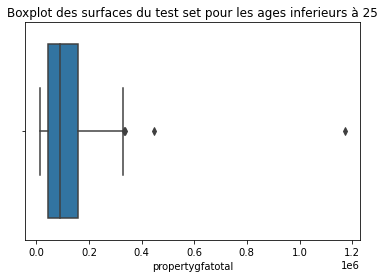

In [31]:
ax = sns.boxplot(data = X_test[X_test.age_derniere_reno < 25], x = 'propertygfatotal')
ax.set_title('Boxplot des surfaces du test set pour les ages inferieurs à 25');

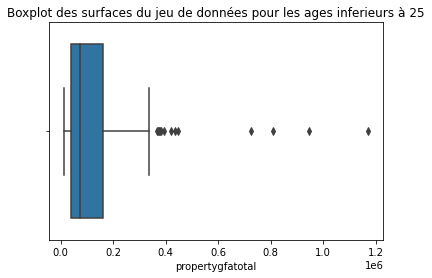

In [32]:
ax = sns.boxplot(data = data[data.age_derniere_reno < 25], x = 'propertygfatotal')
ax.set_title('Boxplot des surfaces du jeu de données pour les ages inferieurs à 25');

In [33]:
#on remarque qu'il y a tres peu de bâtiments à surface élevées parmis les bâtiments 'jeunes' et on retrouve plus particulierement notre 'outlier' dans le test set
#la combinaison surface élevée et 'bâtiment jeune' pourrait expliquer cette mauvaise prédiction

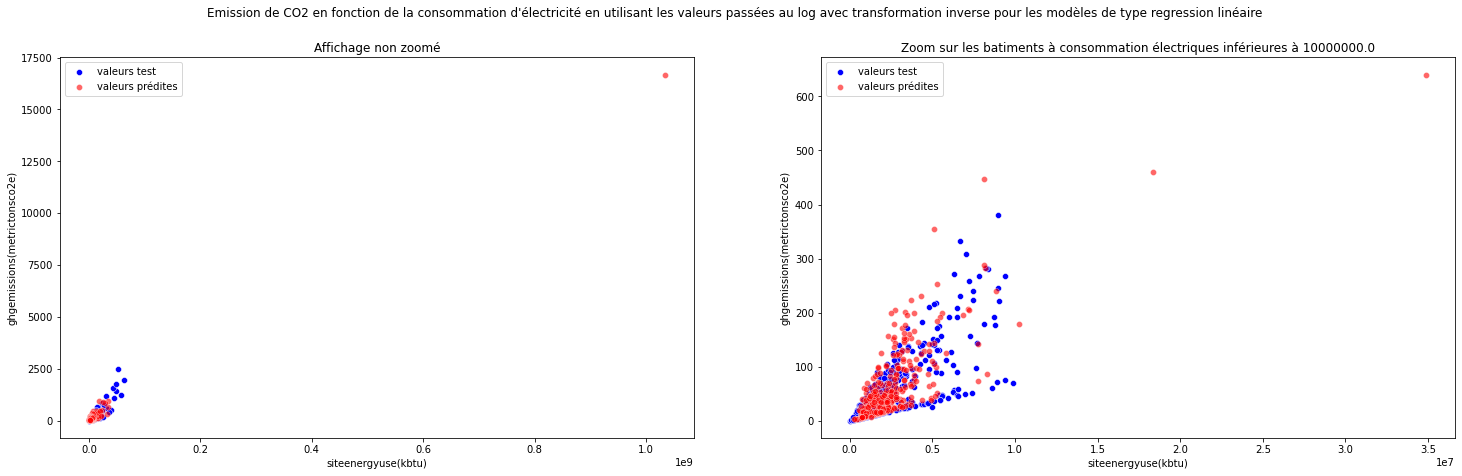

In [34]:
graph(lr_eleclog, lr_co2log, True, True, type_modele = 'regression linéaire')

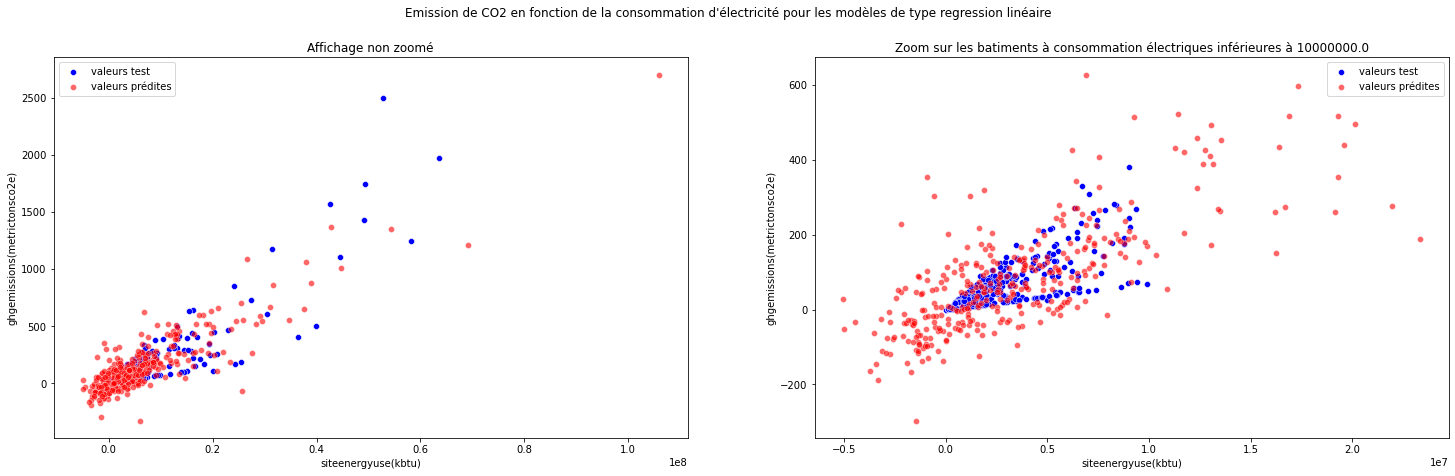

In [35]:
graph(lr_elec, lr_co2, False, type_modele = 'regression linéaire')

In [36]:
X_test.iloc[lr_elec.predict(X_test).tolist().index(max(lr_elec.predict(X_test).tolist()))] #on retrouve le meme point sans le passage au log qui est excentré

buildingtype                       nonresidential
primarypropertytype                         other
councildistrictcode                             2
numberofbuildings                             1.0
numberoffloors                                3.0
propertygfatotal                        1172127.0
propertygfaparking                            0.0
propertygfabuilding(s)                  1172127.0
largestpropertyusetype                      other
largestpropertyusetypegfa               1172127.0
secondlargestpropertyusetype                aucun
secondlargestpropertyusetypegfa               0.0
thirdlargestpropertyusetype                 aucun
thirdlargestpropertyusetypegfa                0.0
outlier                                       non
countofallpropertyusetypes                    1.0
age_derniere_reno                              17
electricity_ratio                              70
gas_ratio                                      30
steam_ratio                                     0


In [37]:
def print_score(modeles):
    
    for model,y in zip(modeles,[y_test_elec, y_test_eleclog, y_test_co2, y_test_co2log]):
        print (model, 'a un R² égal à', modeles[model].score(X_test,y))

In [38]:
dic_lr = {'lr_elec' : lr_elec, 'lr_eleclog' : lr_eleclog, 'lr_co2' : lr_co2, 'lr_co2log' : lr_co2log}

In [39]:
print_score(dic_lr)

lr_elec a un R² égal à 0.4177457537004321
lr_eleclog a un R² égal à 0.540359063282646
lr_co2 a un R² égal à 0.2704049465986895
lr_co2log a un R² égal à 0.6619675601928425


In [40]:
def df_erreurs(modele, type_conso, log, modeltitre, pos = True, ret = False): #distributions des 'root square error' (calcul de la 'rmse' pour chaque batiment)
    
    df = y_test.copy()
    df['prediction'] = modele.predict(X_test)
    
    if pos ==True:
        
        if log == False:

            if type_conso == 'elec': #calcul de la 'rse' pour chaque batiment

                df['rmse'] = df.apply(lambda x: np.sqrt((x['siteenergyuse(kbtu)']-x['prediction'])**2), axis = 1)

            else:

                df['rmse'] = df.apply(lambda x: np.sqrt((x['ghgemissions(metrictonsco2e)']-x['prediction'])**2), axis = 1)

        elif type_conso == 'elec': #utilisation de la transformation inverse pour les modeles utilisant le log

            df['rmse'] = df.apply(lambda x: np.sqrt((x['siteenergyuse(kbtu)']-np.expm1(x['prediction']))**2), axis = 1) 

        else:

            df['rmse'] = df.apply(lambda x: np.sqrt((x['ghgemissions(metrictonsco2e)']-np.expm1(x['prediction']))**2), axis = 1)

        sns.displot(data= df, x = 'rmse')
        plt.title('Distribution des \'root square error\' pour le modèle '+modeltitre);
        
        return df
        
    else:
    
        if log == False:

            if type_conso == 'elec': #calcul de la 'rse' pour chaque batiment

                df['rmse'] = df.apply(lambda x: x['siteenergyuse(kbtu)']-x['prediction'], axis = 1)

            else:

                df['rmse'] = df.apply(lambda x: x['ghgemissions(metrictonsco2e)']-x['prediction'], axis = 1)

        elif type_conso == 'elec': #utilisation de la transformation inverse pour les modeles utilisant le log

            df['rmse'] = df.apply(lambda x: x['siteenergyuse(kbtu)']-np.expm1(x['prediction']), axis = 1) 

        else:

            df['rmse'] = df.apply(lambda x: x['ghgemissions(metrictonsco2e)']-np.expm1(x['prediction']), axis = 1)

        sns.displot(data= df, x = 'rmse')
        plt.title('Distribution des erreurs pour le modèle '+modeltitre);
        
        if ret == True:
            
            return df
    
    pass

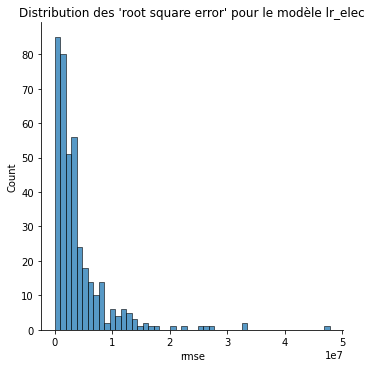

In [41]:
df_lrelec = df_erreurs(lr_elec, 'elec', False, 'lr_elec')

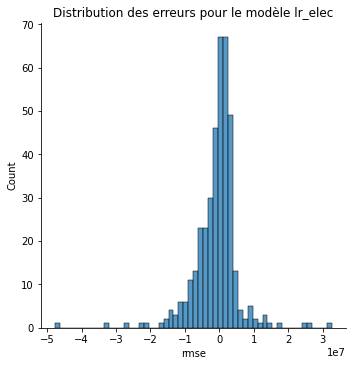

In [42]:
df_erreurs(lr_elec, 'elec', False, 'lr_elec',pos = False)

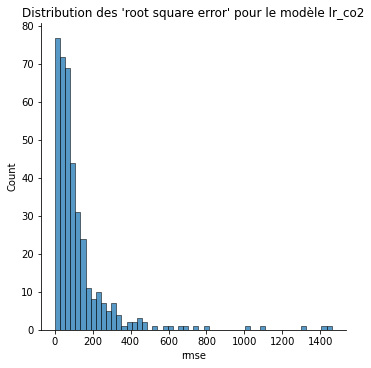

In [43]:
df_lrco2 = df_erreurs(lr_co2, 'co2', False, 'lr_co2')

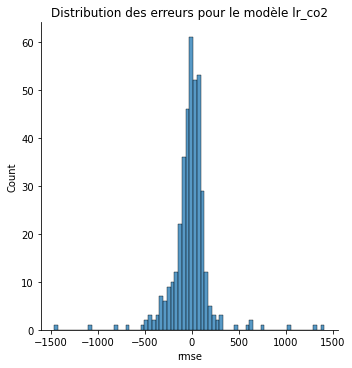

In [44]:
df_erreurs(lr_co2, 'co2', False, 'lr_co2', pos = False)

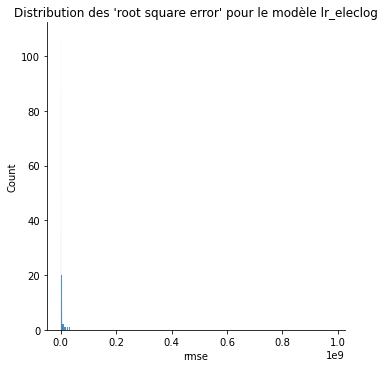

In [45]:
df_lreleclog = df_erreurs(lr_eleclog, 'elec', True, 'lr_eleclog')

In [46]:
df_lreleclog.describe() #zoomons un peu pour y voir mieux et regardons les points avec les erreurs élevées

energy_log  ghgemissions_log  siteenergyuse(kbtu)  \
count  391.000000        391.000000         3.910000e+02   
mean    14.694018          3.838400         5.151491e+06   
std      1.226714          1.367767         8.488014e+06   
min      9.739818          0.113329         1.697945e+04   
25%     13.904590          3.032290         1.093168e+06   
50%     14.627454          3.777348         2.252281e+06   
75%     15.475201          4.680811         5.257698e+06   
max     17.967841          7.824912         6.358201e+07   

       ghgemissions(metrictonsco2e)  prediction          rmse  
count                    391.000000  391.000000  3.910000e+02  
mean                     118.563529   14.712909  5.202880e+06  
std                      251.835671    0.836784  4.955493e+07  
min                        0.120000   12.561025  5.224369e+03  
25%                       19.745000   14.246647  4.524794e+05  
50%                       42.700000   14.632201  1.014335e+06  
75%                      106.857500   15.064938  2.290799e+06  
max                     2501.165000   20.757432  9.766188e+08

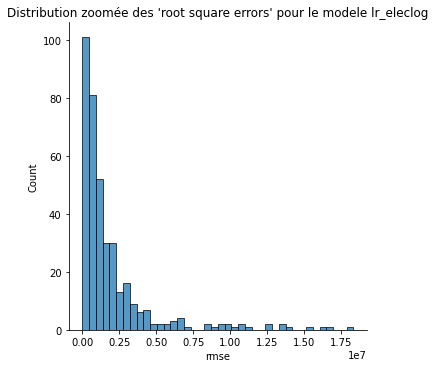

In [47]:
sns.displot(data = df_lreleclog[df_lreleclog.rmse < 2e07], x = 'rmse')
plt.title('Distribution zoomée des \'root square errors\' pour le modele lr_eleclog');

In [48]:
X_test.loc[df_lreleclog[df_lreleclog.rmse>2e07].index] #regardons les points au dessus du zoom fixé

buildingtype   primarypropertytype councildistrictcode  \
1249      nonresidential               medical                   5   
52    nonresidential cos                 other                   7   
361       nonresidential                office                   7   
161       nonresidential                 other                   7   
1247      nonresidential                office                   2   
505       nonresidential               medical                   7   
693       nonresidential  residential services                   7   
1246      nonresidential               medical                   3   
249       nonresidential               medical                   3   
122       nonresidential                 other                   2   
16        nonresidential                 other                   3   
97                campus             education                   5   

      numberofbuildings  numberoffloors  propertygfatotal  propertygfaparking  \
1249                1.0             2.0           53575.0                 0.0   
52                  1.0             5.0          396085.0                 0.0   
361                 1.0             4.0          165111.0             55000.0   
161                 1.0            11.0          299070.0             68432.0   
1247                1.0             4.0          162157.0                 0.0   
505                 1.0             4.0           49249.0                 0.0   
693                 1.0             4.0          274442.0            105499.0   
1246                1.0             8.0          178000.0                 0.0   
249                 1.0             7.0          330532.5            150455.0   
122                 1.0             3.0         1172127.0                 0.0   
16                  1.0            19.0          385274.0                 0.0   
97                 11.0             2.0          694072.0            111625.0   

      propertygfabuilding(s) largestpropertyusetype  \
1249                 53575.0                medical   
52                  396085.0                  other   
361                 110111.0                 office   
161                 230638.0                  other   
1247                162157.0                 office   
505                  49249.0                medical   
693                 168943.0   residential services   
1246                178000.0                medical   
249                 180077.5                medical   
122                1172127.0                  other   
16                  385274.0                  other   
97                  582447.0              education   

      largestpropertyusetypegfa secondlargestpropertyusetype  \
1249                    53575.0                        aucun   
52                     278500.0                        aucun   
361                    104667.0                        other   
161                    250000.0                        aucun   
1247                    88698.0                        other   
505                     40584.0                       office   
693                    108763.0                        other   
1246                   181930.0                        aucun   
249                    215602.0                        aucun   
122                   1172127.0                        aucun   
16                     385274.0                        aucun   
97                     667300.0                        aucun   

      secondlargestpropertyusetypegfa thirdlargestpropertyusetype  \
1249                              0.0                       aucun   
52                                0.0                       aucun   
361                           30222.0                       other   
161                               0.0                       aucun   
1247                          72726.0                       aucun   
505                            7165.0                       aucun   
693            

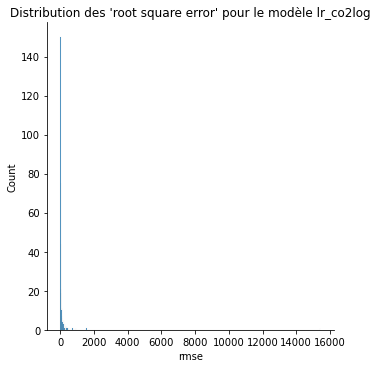

In [49]:
df_lrco2log = df_erreurs(lr_co2log, 'co2', True, 'lr_co2log')

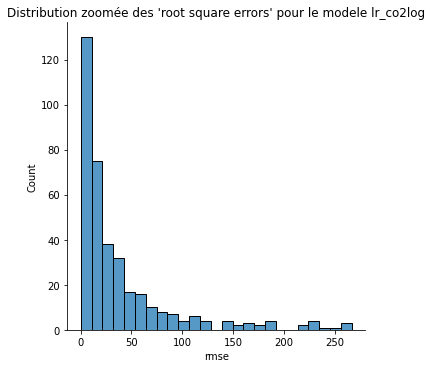

In [50]:
ax = sns.displot(data = df_lrco2log[df_lrco2log.rmse<300], x = 'rmse')
plt.title('Distribution zoomée des \'root square errors\' pour le modele lr_co2log');

In [51]:
X_test.loc[df_lrco2log[df_lrco2log.rmse>300].index]

buildingtype   primarypropertytype councildistrictcode  \
1249      nonresidential               medical                   5   
52    nonresidential cos                 other                   7   
1275      nonresidential  residential services                   4   
161       nonresidential                 other                   7   
682               campus                 store                   7   
233       nonresidential                 store                   2   
312       nonresidential                 other                   3   
227       nonresidential                office                   4   
1247      nonresidential                office                   2   
505       nonresidential               medical                   7   
693       nonresidential  residential services                   7   
1246      nonresidential               medical                   3   
15        nonresidential                 other                   7   
1253      nonresidential                 other                   3   
249       nonresidential               medical                   3   
122       nonresidential                 other                   2   
16        nonresidential                 other                   3   
97                campus             education                   5   

      numberofbuildings  numberoffloors  propertygfatotal  propertygfaparking  \
1249                1.0             2.0           53575.0                 0.0   
52                  1.0             5.0          396085.0                 0.0   
1275                1.0             1.0          166991.0                 0.0   
161                 1.0            11.0          299070.0             68432.0   
682                 1.0             2.0           49280.0                 0.0   
233                 1.0             1.0          158415.0                 0.0   
312                 1.0             3.0          169785.0             63782.0   
227                 1.0             3.0          103697.0             47656.0   
1247                1.0             4.0          162157.0                 0.0   
505                 1.0             4.0           49249.0                 0.0   
693                 1.0             4.0          274442.0            105499.0   
1246                1.0             8.0          178000.0                 0.0   
15                  1.0            10.0          540360.0                 0.0   
1253                1.0             7.0          267470.0                 0.0   
249                 1.0             7.0          330532.5            150455.0   
122                 1.0             3.0         1172127.0                 0.0   
16                  1.0            19.0          385274.0                 0.0   
97                 11.0             2.0          694072.0            111625.0   

      propertygfabuilding(s) largestpropertyusetype  \
1249                 53575.0                medical   
52                  396085.0                  other   
1275                166991.0   residential services   
161                 230638.0                  other   
682                  49280.0                  store   
233                 158415.0                  store   
312                 106003.0                  other   
227                  56041.0                 office   
1247                162157.0                 office   
505                  49249.0                medical   
693                 168943.0   residential services   
1246                178000.0                medical   
15                  540360.0                  other   
1253                267470.0                  other   
249                 180077.5                medical   
122                1172127.0                  other   
16                  385274.0                  other   
97                  582447.0              education   

      largestpropertyusetypegfa secondlargestpropertyusetype  \
1249                    53575.0

In [52]:
def rmse (model, type_conso, log): #calcul rmse du modele, squared = False pour prendre la racine carré et ramener à l'unité de base (kbtu)
    
    if log == False:
        
        if type_conso == 'elec':

            return mse(y_test_elec, model.predict(X_test), squared = False)
        
        else:
        
            return mse(y_test_co2, model.predict(X_test), squared = False)
            
    elif type_conso == 'elec': #transformation inverse pour garder meme unité lors du passage au log
    
        return mse(y_test_elec, np.expm1(model.predict(X_test)), squared = False)
        
    else:
        
        return mse(y_test_co2, np.expm1(model.predict(X_test)), squared = False)
    
    pass
    

In [53]:
rmse(lr_elec, 'elec', False)

6468541.23934191

In [54]:
rmse(lr_eleclog, 'elec', True)


49764251.76176769

In [55]:
rmse(lr_co2, 'co2', False)

214.8335523817725

In [56]:
rmse(lr_co2log, 'co2', True)

798.817714667745

# Régression Ridge

In [57]:
from sklearn.linear_model import Ridge

In [58]:
#prérecherche du alpha pour réduire un peu le temps de calcul du gridsearch, effectuée sur les différents modèles

n_alpha = 50
alphas = np.logspace(-2,6, n_alpha)

ridge = Ridge()

coeffs = []
errors = []

for a in alphas:
    ridge.set_params(alpha=a)
    pipe_ridge_alphas = Pipeline([('preprocessing', col_modif),('estimator', ridge)])
    pipe_ridge_alphas.fit(X_train, y_train_co2)
    coeffs.append(ridge.coef_)
    errors.append(np.mean((pipe_ridge_alphas.predict(X_test)-y_test_co2)**2)) #calcul mse pour chaque alpha

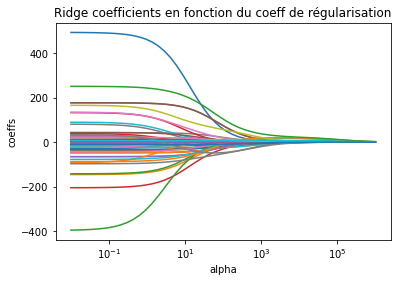

In [59]:
ax = plt.gca()

ax.plot(alphas, coeffs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('coeffs')
plt.title('Ridge coefficients en fonction du coeff de régularisation')
plt.axis('tight')
plt.show()

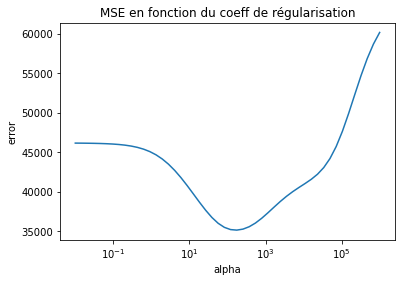

In [60]:
ax = plt.gca()

ax.plot(alphas, errors)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.axis('tight')
plt.title('MSE en fonction du coeff de régularisation')
plt.show()

In [61]:
pipe_ridge = Pipeline([('preprocessing', col_modif),('estimator', Ridge())])

params_ridge = {'estimator__alpha': np.logspace(-2,5, 200)} #on peut cibler la plage pour les alphas grace aux recherches précédentes

ridge_elec = gridsearch(pipe_ridge, params_ridge, y_train_elec)

ridge_eleclog = gridsearch(pipe_ridge, params_ridge, y_train_eleclog)

ridge_co2 = gridsearch(pipe_ridge, params_ridge, y_train_co2)

ridge_co2log = gridsearch(pipe_ridge, params_ridge, y_train_co2log)

In [62]:
dic_ridge = {'ridge_elec' : ridge_elec, 'ridge_eleclog' : ridge_eleclog, 'ridge_co2' : ridge_co2, 'ridge_co2log': ridge_co2log}

In [63]:
print_score(dic_ridge)

ridge_elec a un R² égal à 0.4835135308739953
ridge_eleclog a un R² égal à 0.2094284078410672
ridge_co2 a un R² égal à 0.3509014922884449
ridge_co2log a un R² égal à 0.18203123385465836


In [64]:
#On peut voir que les scores avec les valeurs de base sont meilleurs mais ceux au passage au log sont moins bons que notre baseline, on ne s'attardera donc pas trop dessus (r2 max à 0.5)

In [65]:
ridge_elec.best_params_

{'estimator__alpha': 4247.571552536894}

In [66]:
ridge_eleclog.best_params_

{'estimator__alpha': 52310.993080562585}

In [67]:
rmse(ridge_elec, 'elec', False)

6092274.922295967

In [68]:
rmse(ridge_eleclog, 'elec', True)

8355012.152675196

In [69]:
rmse(ridge_co2, 'co2', False)

202.63593968633066

In [70]:
rmse(ridge_co2log, 'co2', True)

250.0607148961881

In [71]:
ridge_co2.best_params_

{'estimator__alpha': 11226.677735108136}

In [72]:
ridge_co2log.best_params_

{'estimator__alpha': 52310.993080562585}

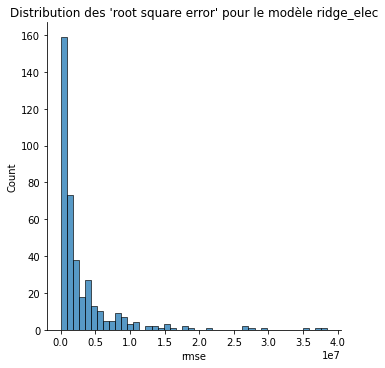

In [73]:
df_ridgelec = df_erreurs(ridge_elec, 'elec', False, 'ridge_elec')

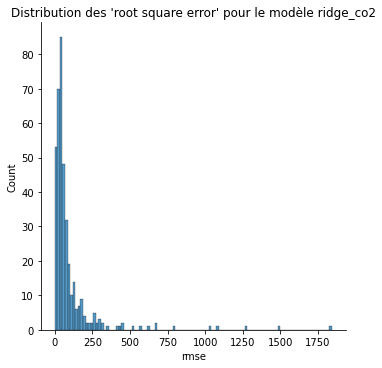

In [74]:
df_ridgeco2 = df_erreurs(ridge_co2, 'co2', False, 'ridge_co2')

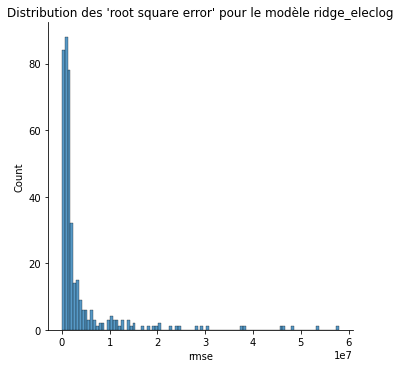

In [75]:
df_ridgeleclog = df_erreurs(ridge_eleclog, 'elec', True, 'ridge_eleclog')

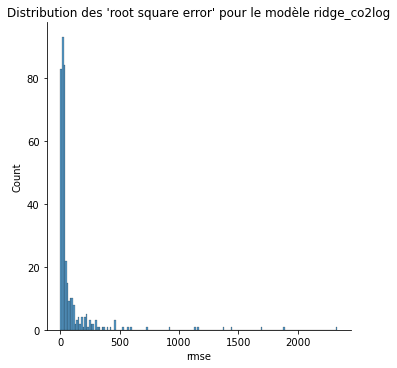

In [76]:
df_ridgeco2log = df_erreurs(ridge_co2log, 'co2', True, 'ridge_co2log')

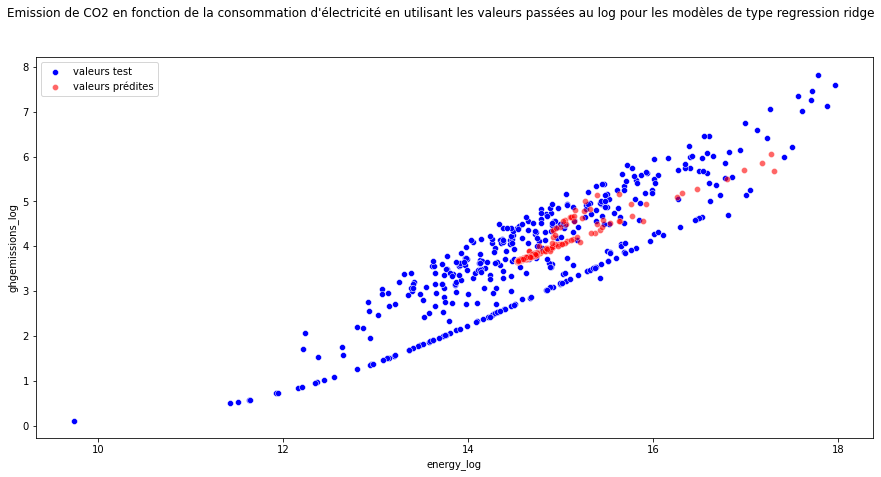

In [77]:
graph(ridge_eleclog, ridge_co2log, True, type_modele = 'regression ridge')

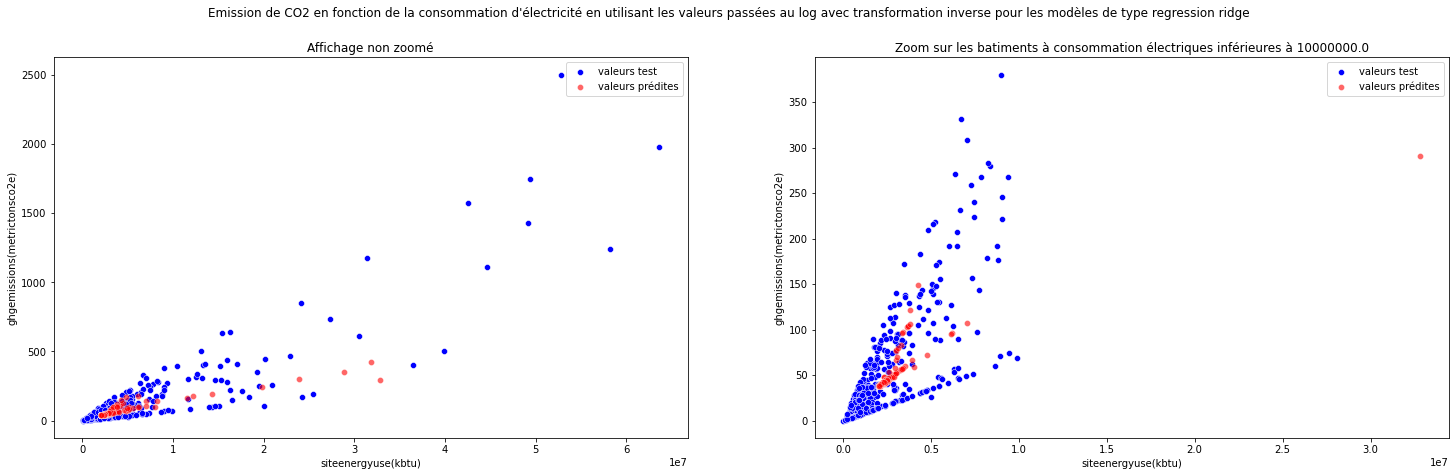

In [78]:
graph(ridge_eleclog, ridge_co2log, True, True, type_modele = 'regression ridge')

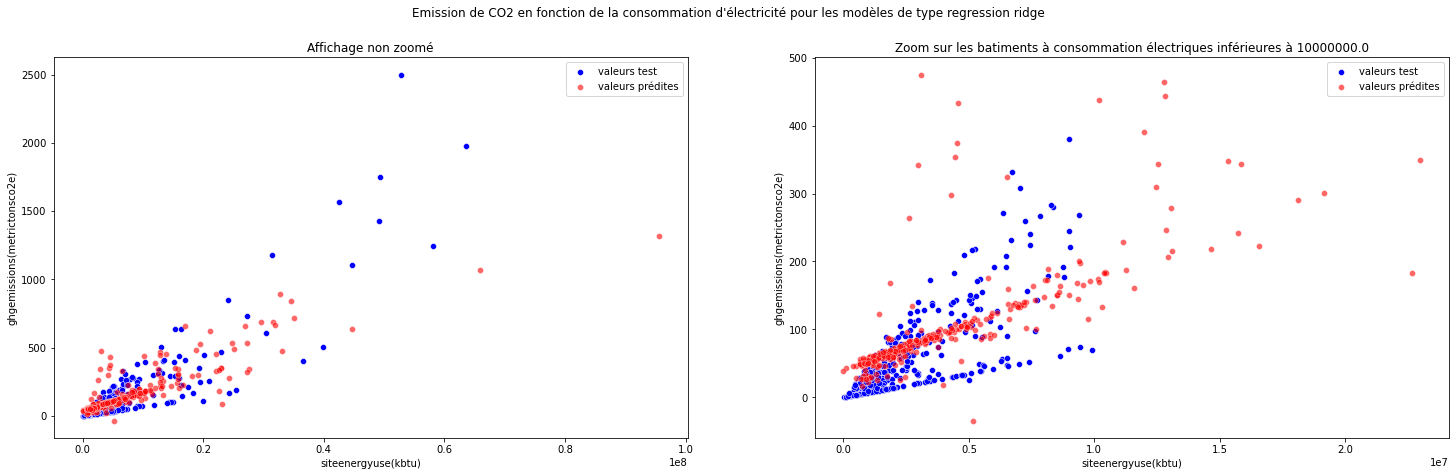

In [79]:
graph(ridge_elec, ridge_co2, False, type_modele = 'regression ridge')

# Lasso

In [80]:
from sklearn.linear_model import Lasso

In [81]:
n_alpha = 50 #recherche 'manuelle' d'une plage de départ
alphas = np.logspace(-5,6, n_alpha)

lasso = Lasso(max_iter = 10000)

coeffs = []
errors = []

for a in alphas:
    lasso.set_params(alpha=a)
    pipe_lasso_alphas = Pipeline([('preprocessing', col_modif),('estimator', lasso)])
    pipe_lasso_alphas.fit(X_train, y_train_elec)
    coeffs.append(lasso.coef_)
    errors.append(np.mean((pipe_lasso_alphas.predict(X_test)-y_test_elec)**2))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.050272911394359e+16, tolerance: 99228274433632.42
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.048495535415005e+16, tolerance: 99228274433632.42
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.0454547921003944e+16, tolerance: 99228274433632.42
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Conv

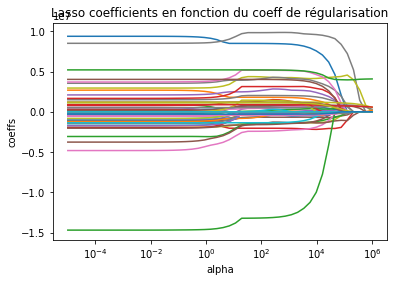

In [82]:
ax = plt.gca()

ax.plot(alphas, coeffs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('coeffs')
plt.title('Lasso coefficients en fonction du coeff de régularisation')
plt.axis('tight')
plt.show()

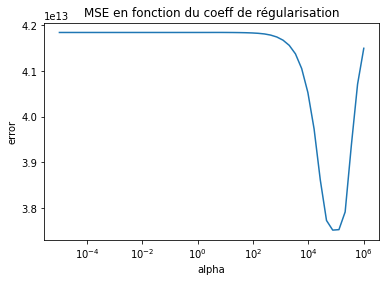

In [83]:
ax = plt.gca()

ax.plot(alphas, errors)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.title('MSE en fonction du coeff de régularisation')
plt.axis('tight')
plt.show()

In [84]:
pipe_lasso = Pipeline([('preprocessing', col_modif),('estimator', Lasso(max_iter = 10000))])

params_lasso = {'estimator__alpha': np.logspace(-4,6, 200)}

lasso_elec = gridsearch(pipe_lasso,params_lasso, y_train_elec)

lasso_eleclog = gridsearch(pipe_lasso,params_lasso, y_train_eleclog)

lasso_co2 = gridsearch(pipe_lasso,params_lasso, y_train_co2)

lasso_co2log = gridsearch(pipe_lasso,params_lasso, y_train_co2log)

In [85]:
dic_lasso = {'lasso_elec': lasso_elec, 'lasso_eleclog': lasso_eleclog, 'lasso_co2' : lasso_co2, 'lasso_co2log':lasso_co2log}

In [86]:
print_score(dic_lasso) 

lasso_elec a un R² égal à 0.42256240627527597
lasso_eleclog a un R² égal à 0.1771566163858591
lasso_co2 a un R² égal à 0.31526028871687095
lasso_co2log a un R² égal à 0.16352503568813892


In [87]:
#comme pour le ridge, les socres ne sont pas extraordinaires

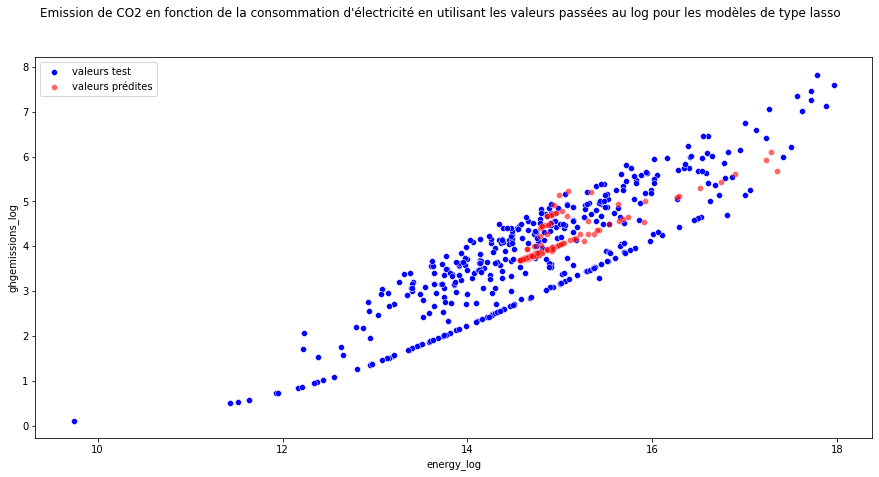

In [88]:
graph(lasso_eleclog, lasso_co2log, True, type_modele = 'lasso')

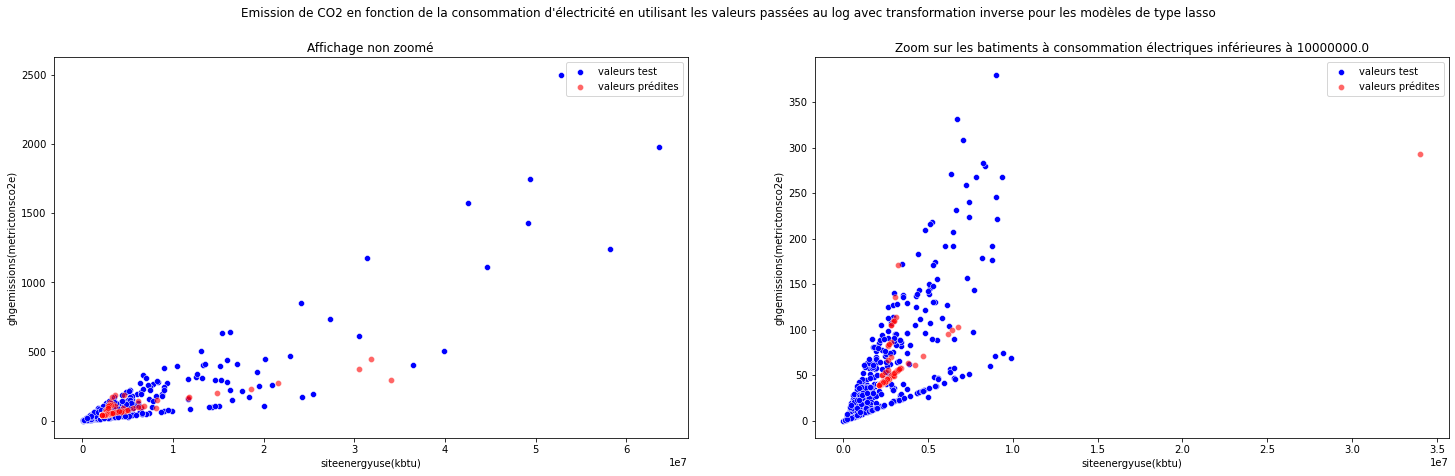

In [89]:
graph(lasso_eleclog, lasso_co2log, True, True, type_modele = 'lasso')

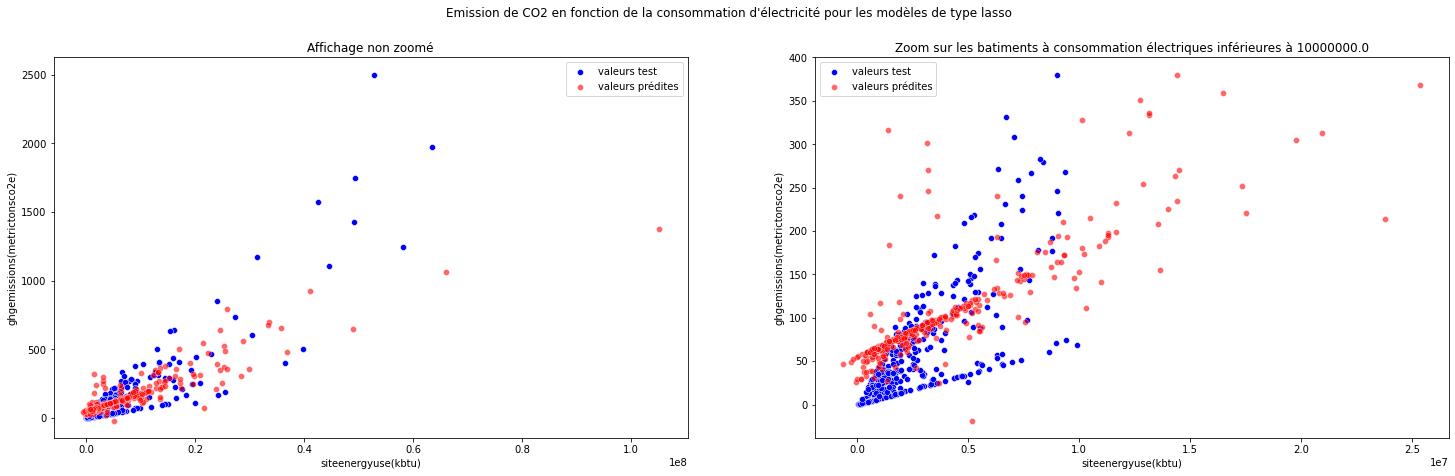

In [90]:
graph(lasso_elec, lasso_co2, False, type_modele = 'lasso')

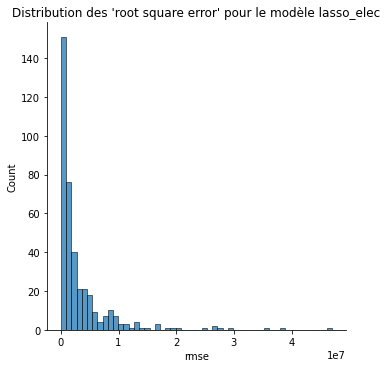

In [91]:
df_lassoelec = df_erreurs(lasso_elec, 'elec', False, 'lasso_elec')

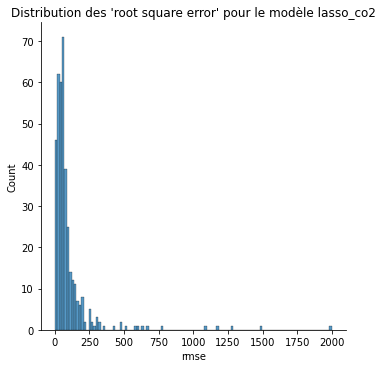

In [92]:
df_lassco2 = df_erreurs(lasso_co2, 'co2', False, 'lasso_co2')

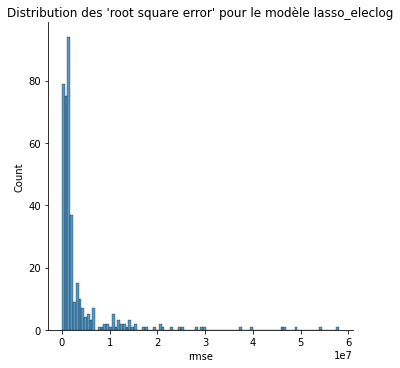

In [93]:
df_lassoeleclog = df_erreurs(lasso_eleclog, 'elec', True, 'lasso_eleclog')

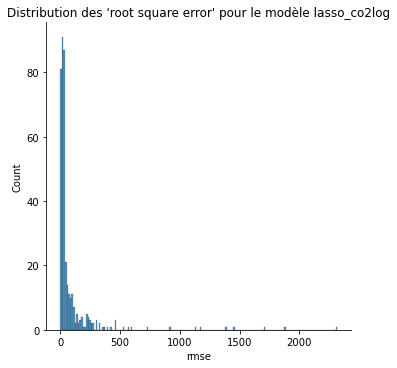

In [94]:
df_lassoco2log = df_erreurs(lasso_co2log, 'co2', True, 'lasso_co2log')

In [95]:
rmse(lasso_elec, 'elec', False)

6441730.426633802

In [96]:
rmse(lasso_eleclog, 'elec', True)

8454212.608904788

In [97]:
rmse(lasso_co2, 'co2', False)

208.12484482776864

In [98]:
rmse(lasso_co2log, 'co2', True)

250.46005886691245

# Elasticnet

In [99]:
from sklearn.linear_model import ElasticNet

pipe_elasticnet = Pipeline([('preprocessing', col_modif),('estimator', ElasticNet())])

params_elasticnet = {'estimator__alpha': np.logspace(-4,6, 200), 'estimator__l1_ratio' : np.arange(0.1,1,0.1)}

elasticnet_elec = gridsearch(pipe_elasticnet, params_elasticnet, y_train_elec)

elasticnet_eleclog = gridsearch(pipe_elasticnet, params_elasticnet, y_train_eleclog)

elasticnet_co2 = gridsearch(pipe_elasticnet, params_elasticnet, y_train_co2)

elasticnet_co2log = gridsearch(pipe_elasticnet, params_elasticnet, y_train_co2log)

In [100]:
dic_elasticnet = {'elasticnet_elec' : elasticnet_elec, 'elasticnet_eleclog' : elasticnet_eleclog, 'elasticnet_co2' : elasticnet_co2,
                  'elasticnet_co2log' : elasticnet_co2log}

In [101]:
print_score(dic_elasticnet)

elasticnet_elec a un R² égal à 0.4860863369855126
elasticnet_eleclog a un R² égal à 0.18118838179420982
elasticnet_co2 a un R² égal à 0.34063485302500995
elasticnet_co2log a un R² égal à 0.16576934304626578


In [102]:
#combinaison des deux précédents pour voir si ca aide, à priori non)

In [103]:
rmse(elasticnet_elec, 'elec', False)

6077082.06475803

In [104]:
rmse(elasticnet_eleclog, 'elec', True)

8439892.930275153

In [105]:
rmse(elasticnet_co2, 'co2', False)

204.2321752572181

In [106]:
rmse(elasticnet_co2log, 'co2', True)

250.29648732636744

In [107]:
elasticnet_elec.best_params_

{'estimator__alpha': 6.669919663030129, 'estimator__l1_ratio': 0.1}

In [108]:
elasticnet_eleclog.best_params_

{'estimator__alpha': 5.291978735958447, 'estimator__l1_ratio': 0.2}

In [109]:
elasticnet_co2.best_params_

{'estimator__alpha': 107.18913192051286, 'estimator__l1_ratio': 0.9}

In [110]:
elasticnet_co2log.best_params_

{'estimator__alpha': 5.291978735958447, 'estimator__l1_ratio': 0.2}

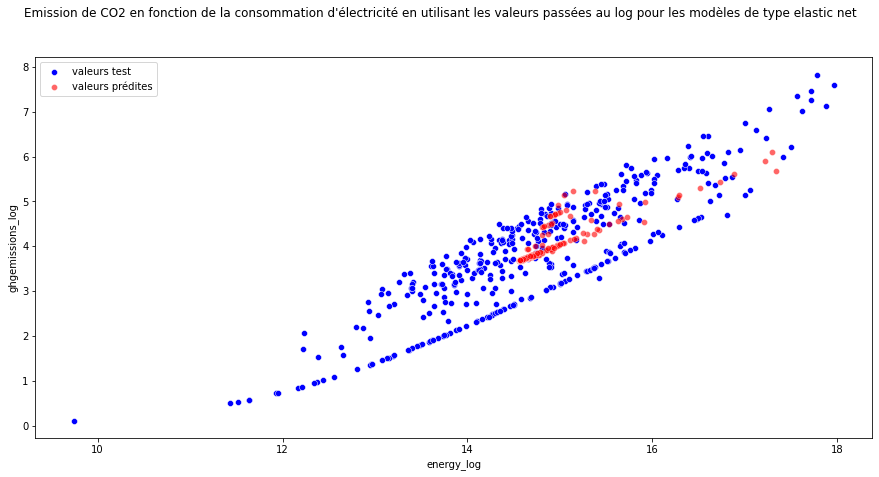

In [111]:
graph(elasticnet_eleclog, elasticnet_co2log, True, type_modele = 'elastic net')

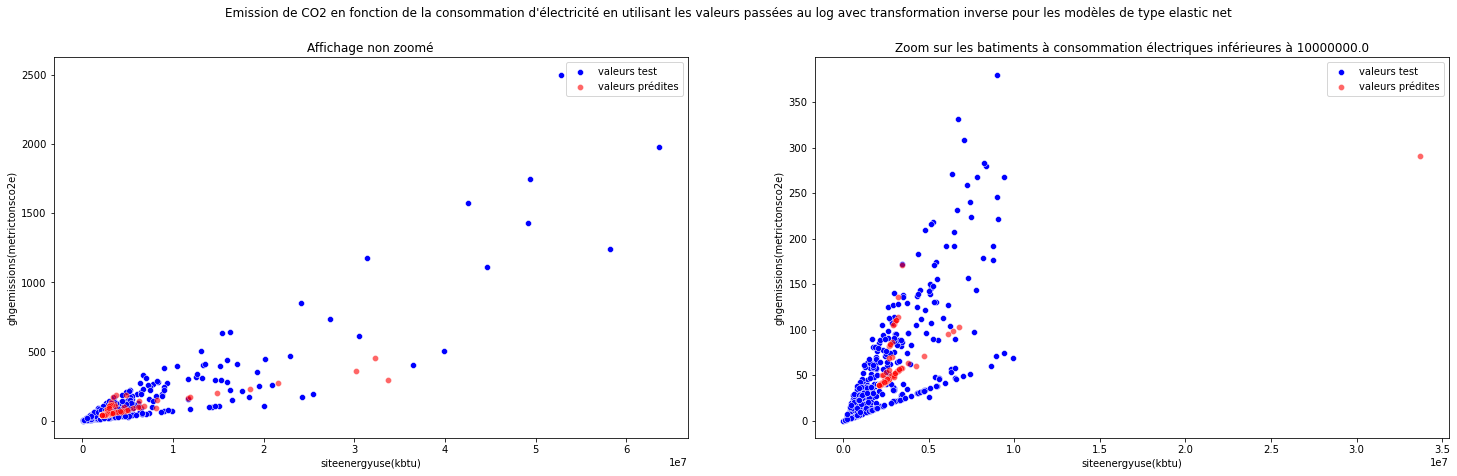

In [112]:
graph(elasticnet_eleclog, elasticnet_co2log, True, True, type_modele = 'elastic net')

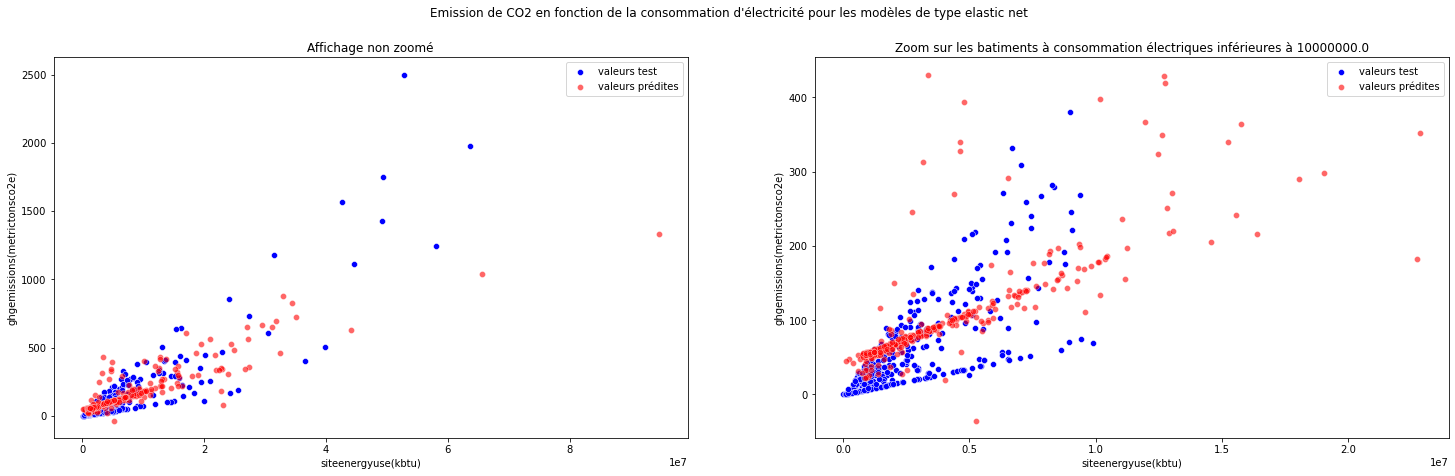

In [113]:
graph(elasticnet_elec, elasticnet_co2, False, type_modele = 'elastic net')

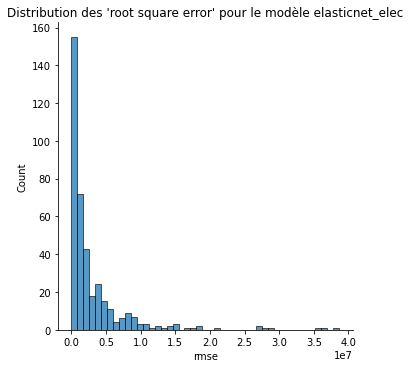

In [114]:
df_elasticnetelec = df_erreurs(elasticnet_elec, 'elec', False, 'elasticnet_elec')

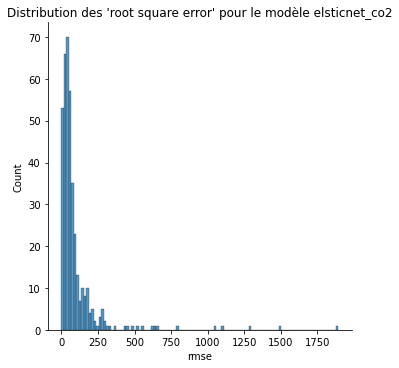

In [115]:
df_elasticnetco2 = df_erreurs(elasticnet_co2, 'co2', False, 'elsticnet_co2')

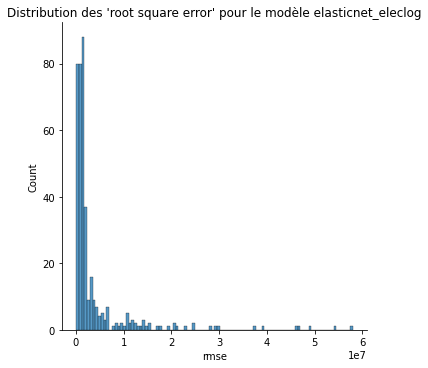

In [116]:
df_elasticneteleclog = df_erreurs(elasticnet_eleclog, 'elec', True, 'elasticnet_eleclog')

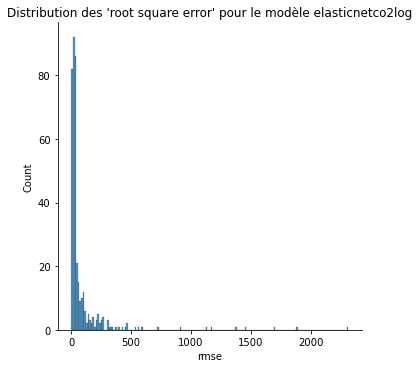

In [117]:
df_elasticnetco2log = df_erreurs(elasticnet_co2log, 'co2', True, 'elasticnetco2log')

# SVM

In [118]:
from sklearn.svm import SVR
from sklearn.svm import LinearSVR

In [119]:
#Recherche 'manuelle'

n_alpha = 50
alphas = np.logspace(-8,8, n_alpha)

svm = LinearSVR()

errors = []

for a in alphas:
    svm.set_params(C=a, max_iter=100000)
    pipe_SVR_alphas = Pipeline([('preprocessing', col_modif),('estimator', svm)])
    pipe_SVR_alphas.fit(X_train, y_train_co2)
    errors.append(np.mean((pipe_SVR_alphas.predict(X_test)-y_test_co2)**2))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations

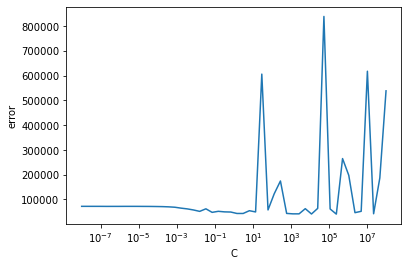

In [120]:
ax = plt.gca()

ax.plot(alphas, errors)
ax.set_xscale('log')
plt.xlabel('C')
plt.ylabel('error')
plt.axis('tight')
plt.show()

In [121]:
pipe_SVR = Pipeline([('preprocessing', col_modif),('estimator', SVR())])
pipe_LinearSVR = Pipeline([('preprocessing', col_modif),('estimator', LinearSVR())])

#séparation des log et du linear au vu des plages de valeurs de C pour accelerer le calcul, augmentation du nombre d'itérations pour aider à la convergence

params_SVR = [{'estimator__C': np.logspace(-4,5, 200), 'estimator__kernel': ['poly'], 'estimator__epsilon' : [0, 0.1, 0.3], 'estimator__max_iter' : [1000000]},
              {'estimator__C': np.logspace(-6,8, 200), 'estimator__kernel': ['rbf'], 'estimator__epsilon' : [0, 0.1, 0.3]}]

params_SVR_log = [{'estimator__C': np.logspace(-4,5, 200), 'estimator__kernel': ['poly'], 'estimator__epsilon' : [0, 0.1, 0.3], 'estimator__max_iter' : [1000000]},
              {'estimator__C': np.logspace(-6,4, 200), 'estimator__kernel': ['rbf'], 'estimator__epsilon' : [0, 0.1, 0.3]}]


params_LinearSVR = {'estimator__C': np.logspace(-3,8,200), 'estimator__epsilon' : [0, 0.1, 0.3, 0.5],
                    'estimator__loss' : ['epsilon_insensitive', 'squared_epsilon_insensitive']}

SVR_elec = gridsearch(pipe_SVR,params_SVR,y_train_elec)

SVR_eleclog = gridsearch(pipe_SVR,params_SVR_log,y_train_eleclog)

SVR_co2 = gridsearch(pipe_SVR,params_SVR,y_train_co2)

SVR_co2log = gridsearch(pipe_SVR,params_SVR_log,y_train_co2log)

LinearSVR_elec = gridsearch(pipe_LinearSVR,params_LinearSVR, y_train_elec)

LinearSVR_eleclog = gridsearch(pipe_LinearSVR,params_LinearSVR, y_train_eleclog)

LinearSVR_co2 = gridsearch(pipe_LinearSVR,params_LinearSVR, y_train_co2)

LinearSVR_co2log = gridsearch(pipe_LinearSVR,params_LinearSVR,y_train_co2log)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [122]:
dic_svr = {'SVR_elec' : SVR_elec, 'SVR_eleclog' : SVR_eleclog, 'SVR_co2' : SVR_co2, 'SVR_co2log' : SVR_co2log}

In [123]:
print_score(dic_svr)

SVR_elec a un R² égal à -0.01001471556499789
SVR_eleclog a un R² égal à 0.149521122877731
SVR_co2 a un R² égal à -0.0500756344942217
SVR_co2log a un R² égal à 0.07624066885153435


In [124]:
dic_linearsvr = {'LinearSVR_elec' : LinearSVR_elec, 'LinearSVR_eleclog' : LinearSVR_eleclog, 'LinearSVR_co2' : LinearSVR_co2,
                 'LinearSVR_co2log' : LinearSVR_co2log}

In [125]:
print_score(dic_linearsvr)

LinearSVR_elec a un R² égal à -12.2502212817788
LinearSVR_eleclog a un R² égal à -11.405261171401968
LinearSVR_co2 a un R² égal à -0.5443317725886883
LinearSVR_co2log a un R² égal à -1.6816569775717576


In [126]:
#scores vraiment pas bons

In [127]:
rmse(SVR_elec, 'elec', False)

8519495.340381596

In [128]:
rmse(SVR_eleclog, 'elec', True)

8306080.74113041

In [129]:
rmse(SVR_co2, 'co2', False)

257.7338493004184

In [130]:
rmse(SVR_co2log, 'co2', True)

257.05164961998037

In [131]:
rmse(LinearSVR_elec, 'elec', False)

30857560.178259723

In [132]:
rmse(LinearSVR_eleclog, 'elec', True)

1.1339285699118127e+22

In [133]:
rmse(LinearSVR_co2, 'co2', False)

312.5586141792305

In [134]:
rmse(LinearSVR_co2log, 'co2', True)

431765.6517816788

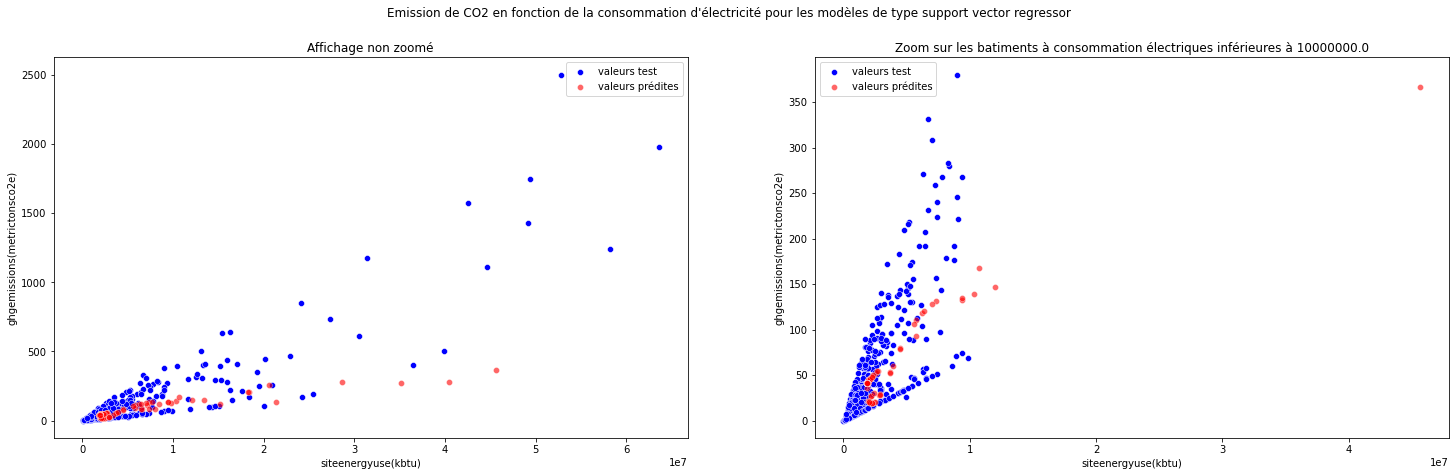

In [135]:
graph(SVR_elec, SVR_co2, False, type_modele = 'support vector regressor')

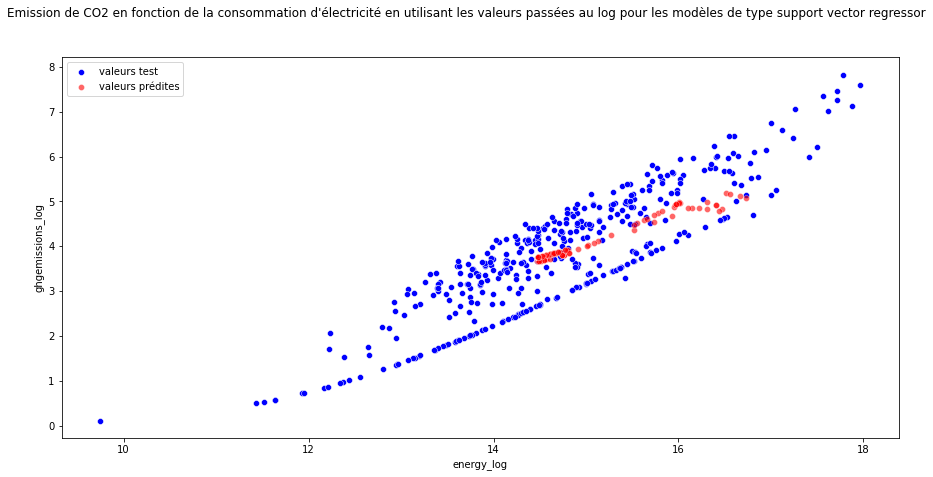

In [136]:
graph(SVR_eleclog, SVR_co2log, True, type_modele = 'support vector regressor')

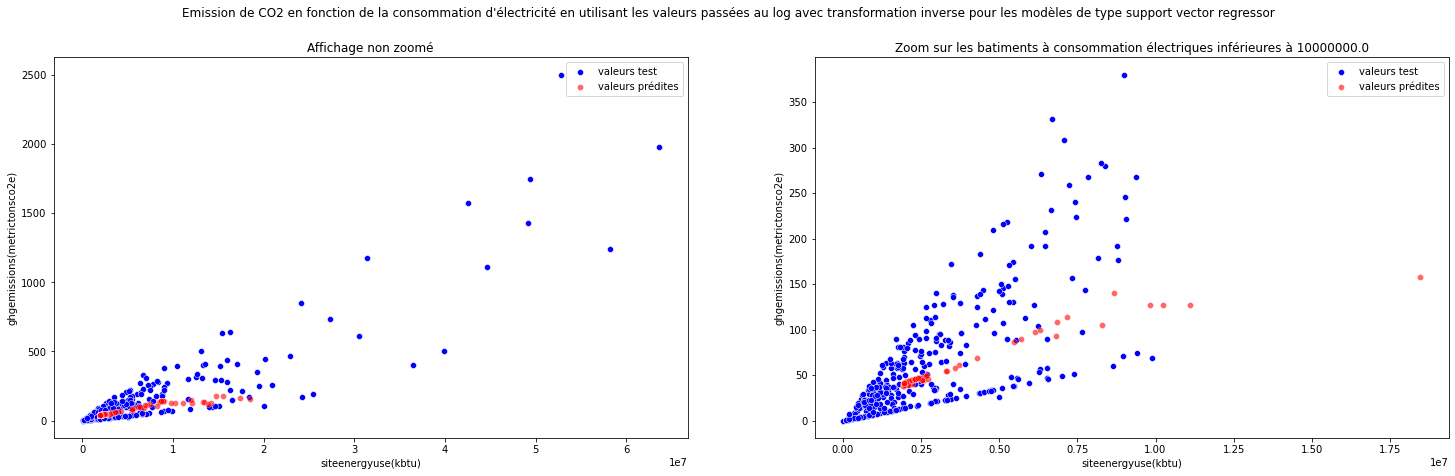

In [137]:
graph(SVR_eleclog, SVR_co2log, True, True, type_modele = 'support vector regressor')

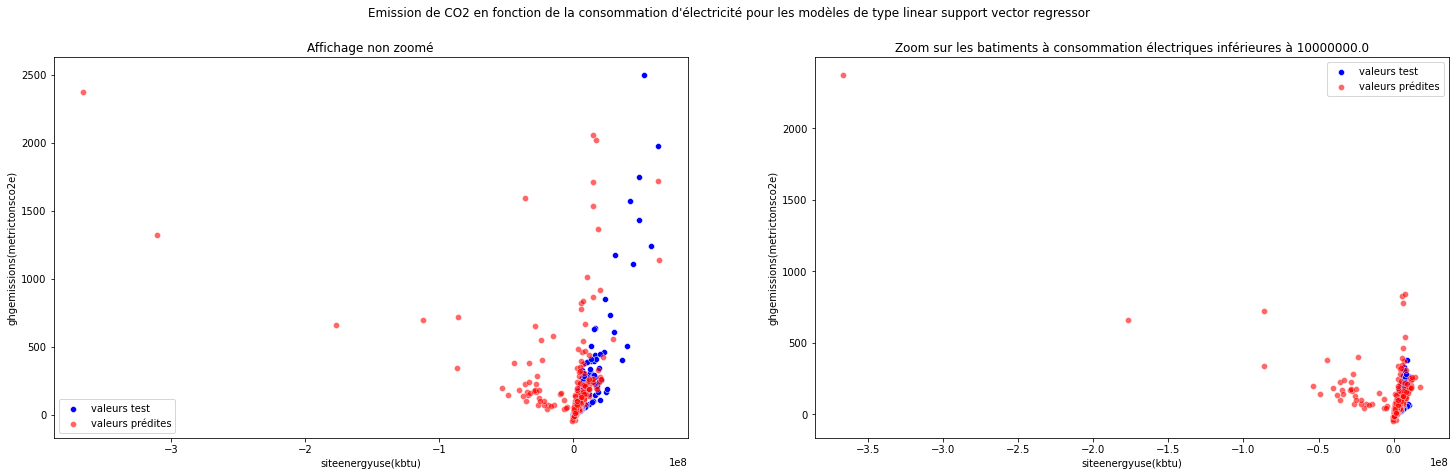

In [138]:
graph(LinearSVR_elec, LinearSVR_co2, False, type_modele = 'linear support vector regressor')

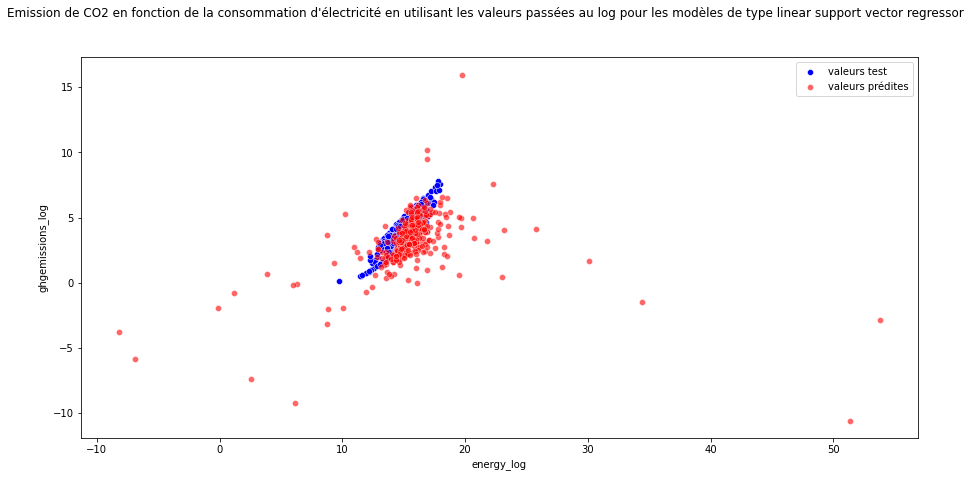

In [139]:
graph(LinearSVR_eleclog, LinearSVR_co2log, True, type_modele = 'linear support vector regressor')

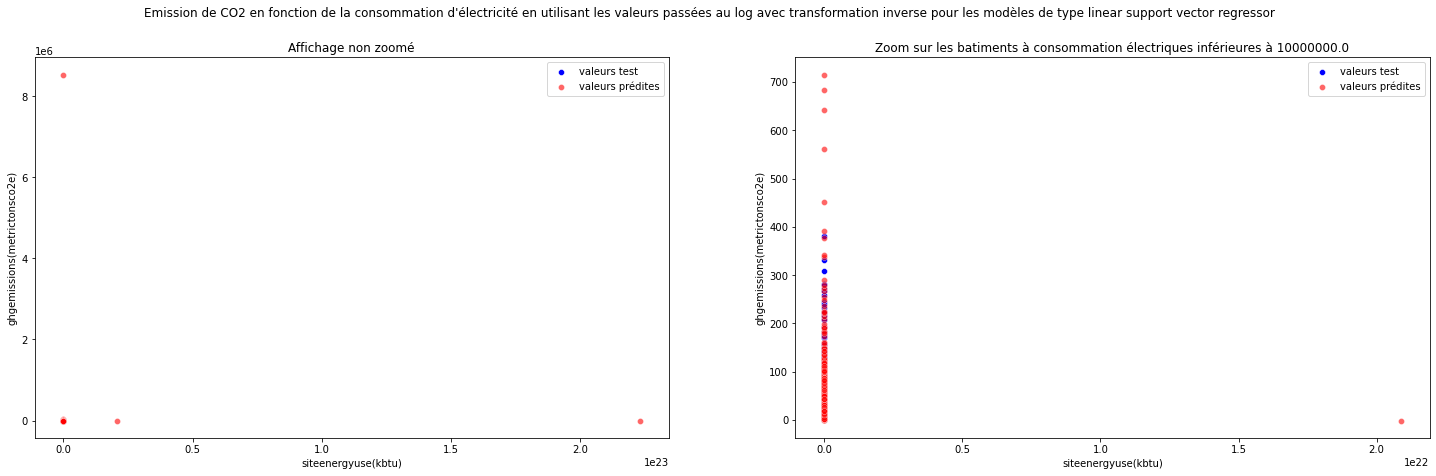

In [140]:
graph(LinearSVR_eleclog, LinearSVR_co2log, True, True, type_modele = 'linear support vector regressor')

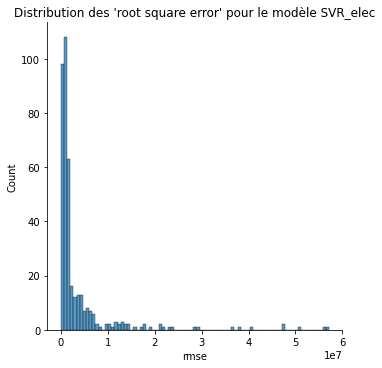

In [141]:
df_svrelec = df_erreurs(SVR_elec, 'elec', False, 'SVR_elec')

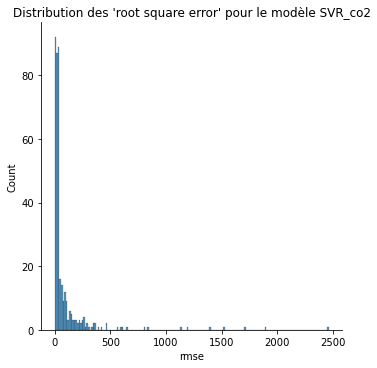

In [142]:
df_svrco2 = df_erreurs(SVR_co2, 'co2', False, 'SVR_co2')

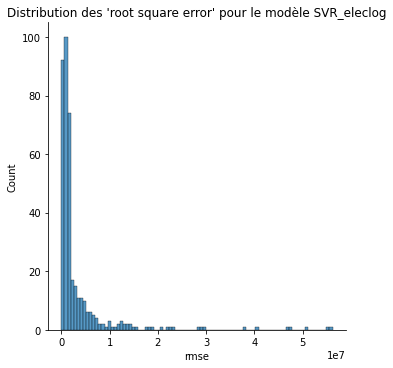

In [143]:
df_svreleclog = df_erreurs(SVR_eleclog, 'elec', True, 'SVR_eleclog')

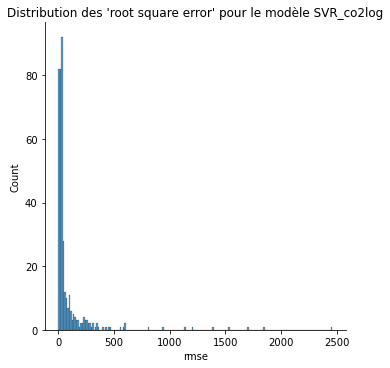

In [144]:
df_svrco2log = df_erreurs(SVR_co2log, 'co2', True, 'SVR_co2log')

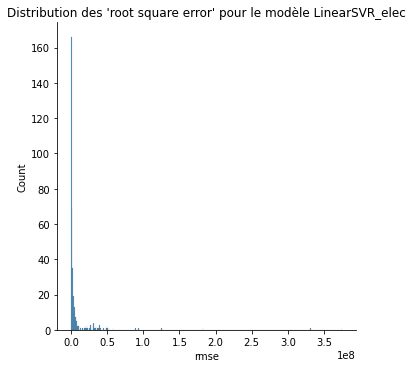

In [145]:
df_linearsvrelec = df_erreurs(LinearSVR_elec, 'elec', False, 'LinearSVR_elec')

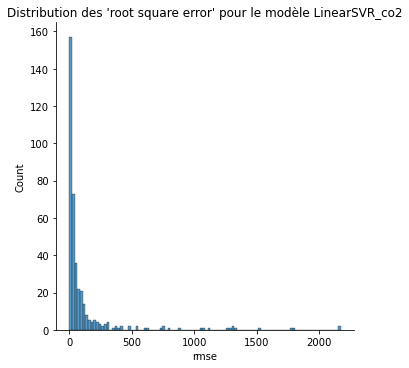

In [146]:
df_linearsvrco2 = df_erreurs(LinearSVR_co2, 'co2', False, 'LinearSVR_co2')

In [147]:
#df_erreurs(LinearSVR_eleclog, 'elec', True) renvoie erreur donc mis en commentaire

In [148]:
#df_erreurs(LinearSVR_co2log, 'co2', True)

# Random Forest

In [149]:
from sklearn.ensemble import RandomForestRegressor

In [150]:
pipe_RandomForestRegressor = Pipeline([('preprocessing', col_modif),('estimator', RandomForestRegressor(random_state = 0))])

params_RandomForestRegressor = {'estimator__n_estimators' : [100,200,300], 'estimator__bootstrap': [True,False],
                                'estimator__max_depth': [None,3,5,10,20], #racinemaxfeat,
                                'estimator__max_features': ['auto','sqrt'], 'estimator__min_samples_leaf': [1,2,4,10],
                                'estimator__min_samples_split': [2,5,10]}


RandomForestRegressor_eleclog = gridsearch(pipe_RandomForestRegressor, params_RandomForestRegressor, y_train_eleclog)

RandomForestRegressor_co2log = gridsearch(pipe_RandomForestRegressor, params_RandomForestRegressor, y_train_co2log)

RandomForestRegressor_elec = gridsearch(pipe_RandomForestRegressor,params_RandomForestRegressor, y_train_elec)

RandomForestRegressor_co2 = gridsearch(pipe_RandomForestRegressor,params_RandomForestRegressor, y_train_co2)

In [151]:
dic_randomforest = {'RFR_elec' : RandomForestRegressor_elec, 'RFR_eleclog': RandomForestRegressor_eleclog, 'RFR_co2' : RandomForestRegressor_co2, 'RFR_co2log' : RandomForestRegressor_co2log}

In [152]:
print_score(dic_randomforest)

RFR_elec a un R² égal à 0.4724155873818431
RFR_eleclog a un R² égal à 0.7174917637397387
RFR_co2 a un R² égal à -0.3975528370184238
RFR_co2log a un R² égal à 0.7817336199857672


In [153]:
#Scores relativement bons en utiliant la transformation au log

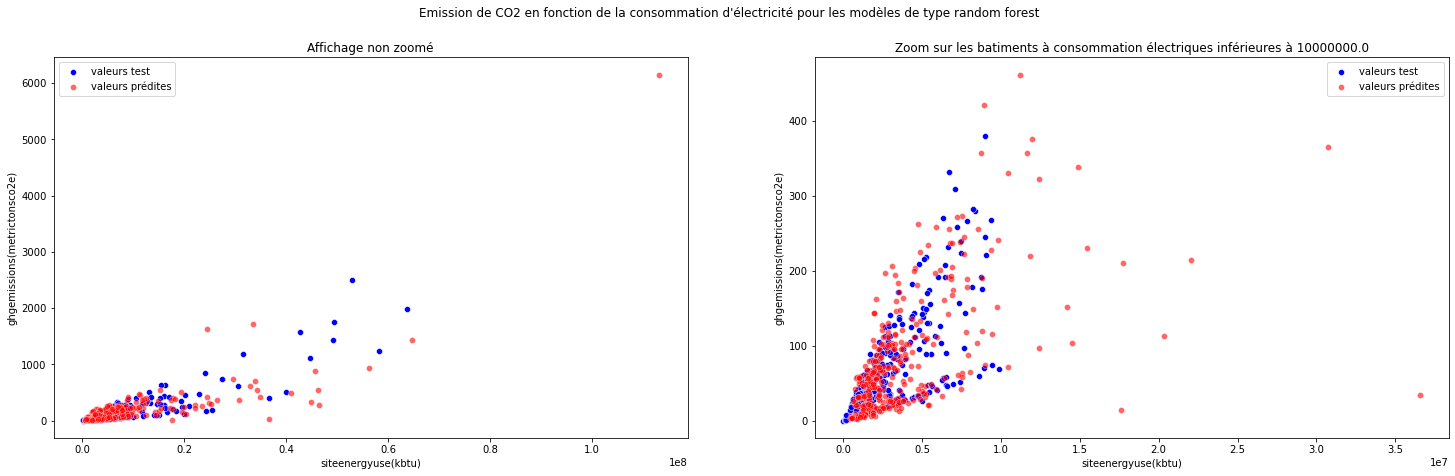

In [154]:
graph(RandomForestRegressor_elec, RandomForestRegressor_co2, False, type_modele = 'random forest')

In [155]:
X_test.iloc[RandomForestRegressor_elec.predict(X_test).tolist().index(max(RandomForestRegressor_elec.predict(X_test).tolist()))]

buildingtype                       nonresidential
primarypropertytype                         other
councildistrictcode                             2
numberofbuildings                             1.0
numberoffloors                                3.0
propertygfatotal                        1172127.0
propertygfaparking                            0.0
propertygfabuilding(s)                  1172127.0
largestpropertyusetype                      other
largestpropertyusetypegfa               1172127.0
secondlargestpropertyusetype                aucun
secondlargestpropertyusetypegfa               0.0
thirdlargestpropertyusetype                 aucun
thirdlargestpropertyusetypegfa                0.0
outlier                                       non
countofallpropertyusetypes                    1.0
age_derniere_reno                              17
electricity_ratio                              70
gas_ratio                                      30
steam_ratio                                     0


In [156]:
#toujours le meme point à l'ecart

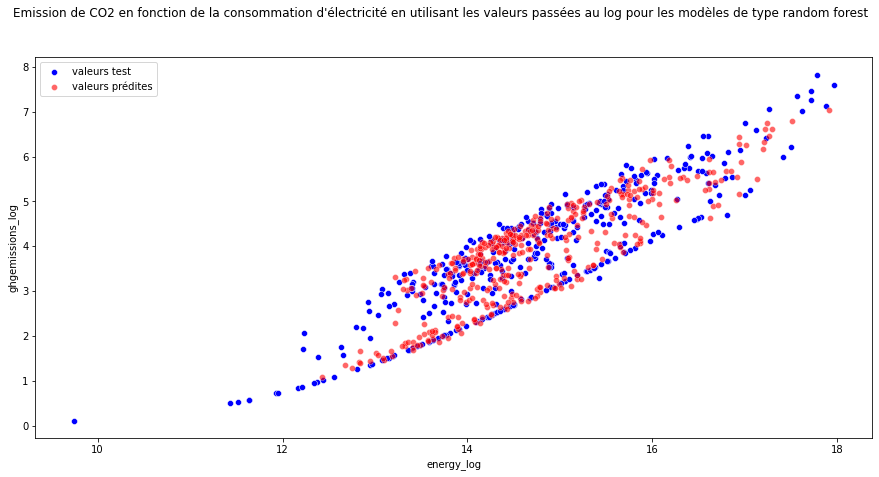

In [157]:
graph(RandomForestRegressor_eleclog, RandomForestRegressor_co2log, True, type_modele = 'random forest')

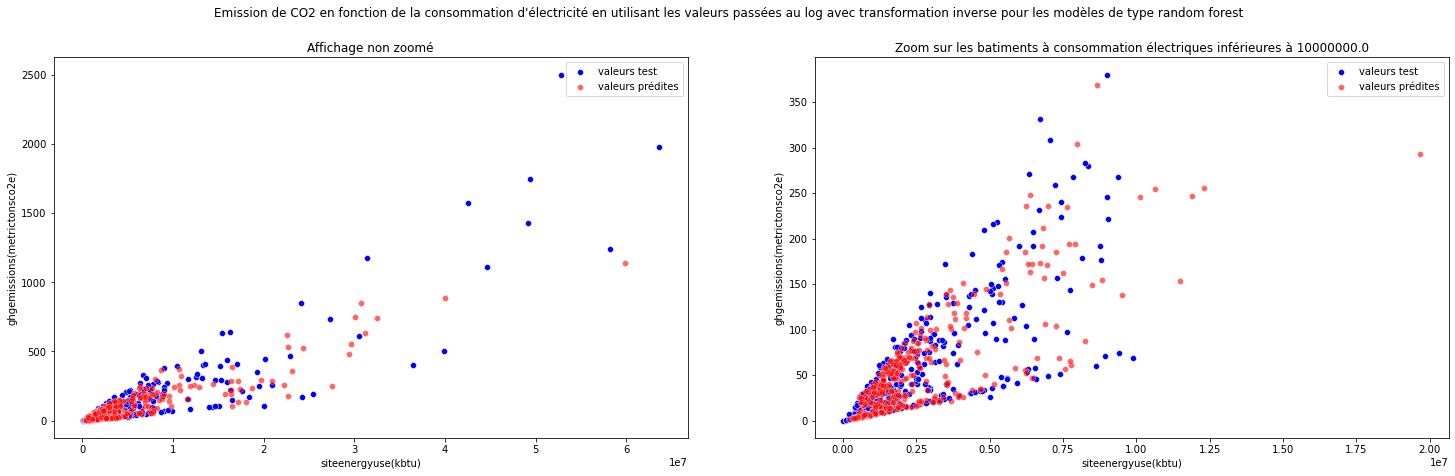

In [158]:
graph(RandomForestRegressor_eleclog, RandomForestRegressor_co2log, True, True, type_modele = 'random forest')

In [159]:
cols = []

encoder = RandomForestRegressor_eleclog.best_estimator_.named_steps['preprocessing'].transformers_ 

for i in np.arange(5):
    
    cols += encoder[i][1].get_feature_names(encoder[i][2]).tolist() #récupération de snoms des features dasn l'ordre du transformer

In [160]:
cols

['buildingtype_campus',
 'buildingtype_nonresidential',
 'buildingtype_nonresidential cos',
 'buildingtype_sps-district k-12',
 'councildistrictcode_1',
 'councildistrictcode_2',
 'councildistrictcode_3',
 'councildistrictcode_4',
 'councildistrictcode_5',
 'councildistrictcode_6',
 'councildistrictcode_7',
 'primarypropertytype_office',
 'primarypropertytype_warehouse',
 'primarypropertytype_education',
 'primarypropertytype_store',
 'primarypropertytype_residential services',
 'primarypropertytype_worship facility',
 'primarypropertytype_medical',
 'primarypropertytype_other',
 'largestpropertyusetype_office',
 'largestpropertyusetype_warehouse',
 'largestpropertyusetype_education',
 'largestpropertyusetype_store',
 'largestpropertyusetype_residential services',
 'largestpropertyusetype_worship facility',
 'largestpropertyusetype_medical',
 'largestpropertyusetype_other',
 'secondlargestpropertyusetype_office',
 'secondlargestpropertyusetype_warehouse',
 'secondlargestpropertyusetype

In [161]:
cols +=num_col

In [162]:
def graph_feature_imp (model, modelname =''):
    
    impo = model.best_estimator_.named_steps['estimator'].feature_importances_
    
    fig = plt.figure(figsize = (20,10))
    ax = sns.barplot(x=cols, y=impo)
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
    ax.set_title('Feature importance pour le modele '+ modelname)
    
    pass

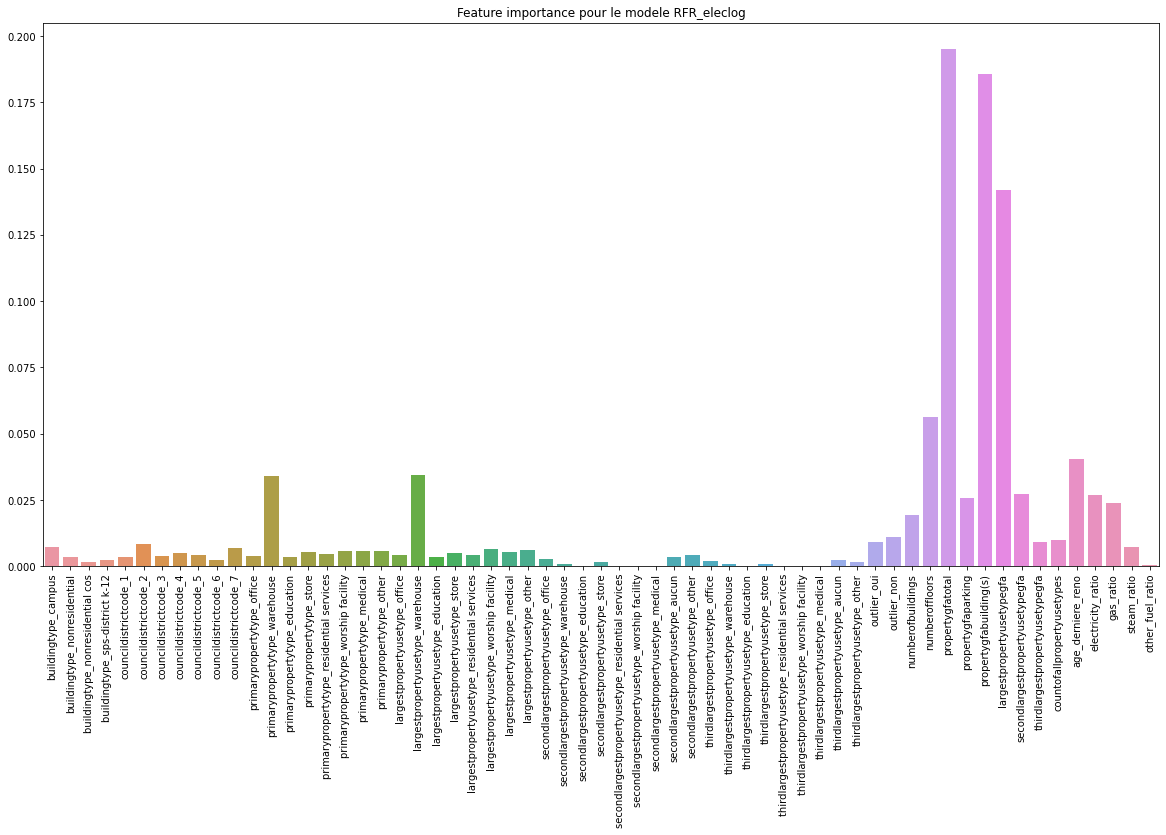

In [163]:
graph_feature_imp(RandomForestRegressor_eleclog, 'RFR_eleclog')

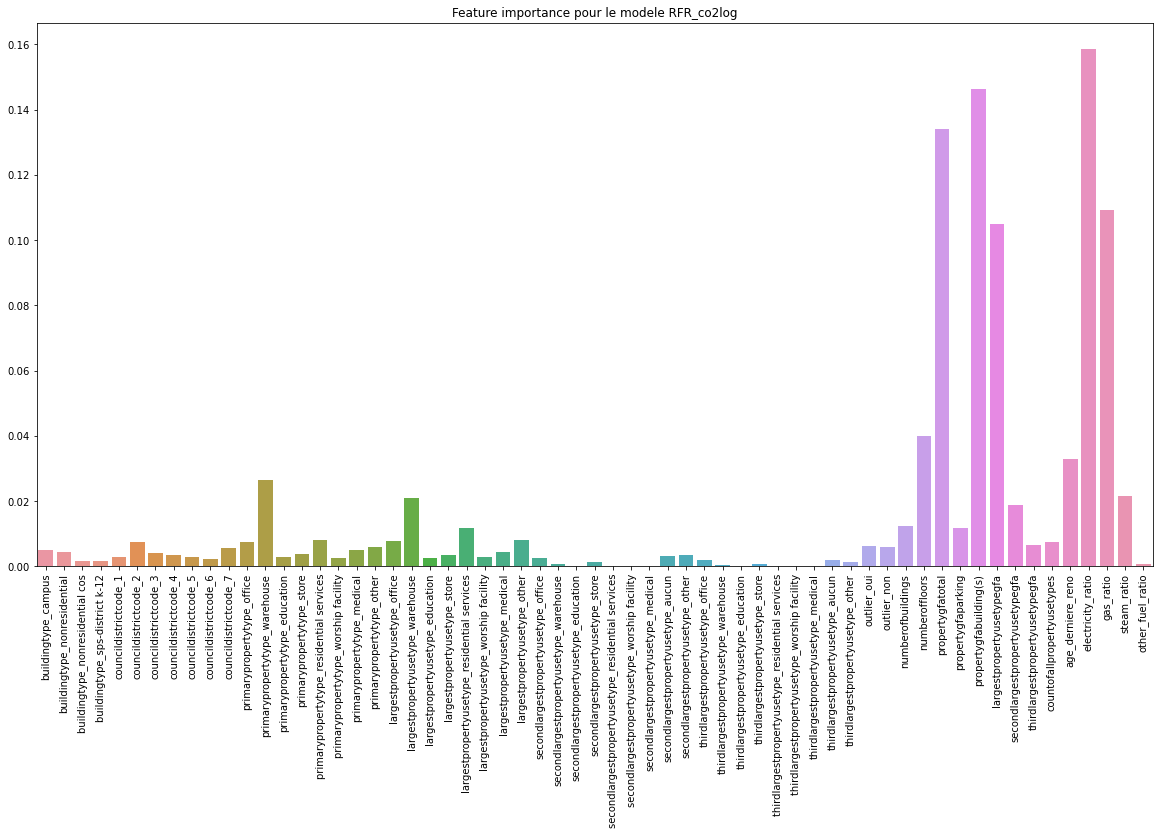

In [164]:
graph_feature_imp(RandomForestRegressor_co2log, 'RFR_co2log')

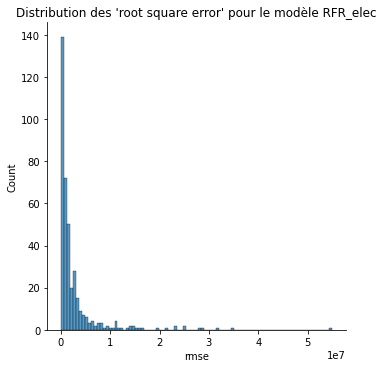

In [165]:
df_RFR_elec = df_erreurs(RandomForestRegressor_elec, 'elec', False, 'RFR_elec')

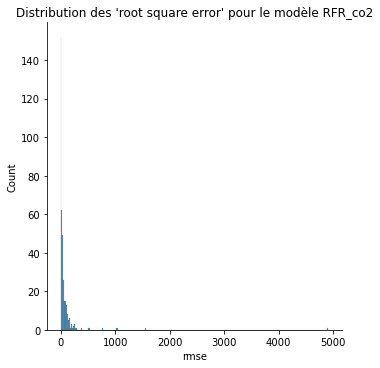

In [166]:
df_RFR_co2 = df_erreurs(RandomForestRegressor_co2, 'co2', False, 'RFR_co2')

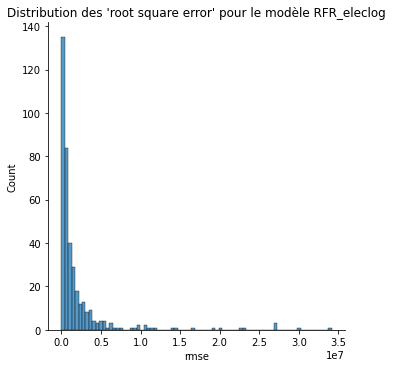

In [167]:
df_RFR_eleclog = df_erreurs(RandomForestRegressor_eleclog, 'elec', True, 'RFR_eleclog')

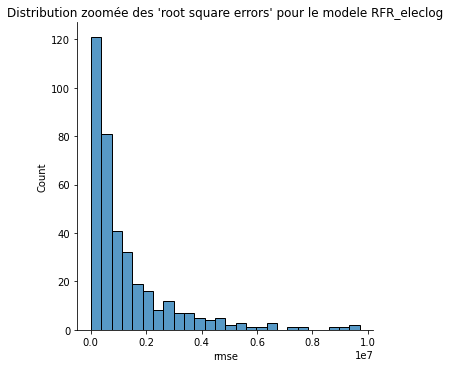

In [168]:
sns.displot(data = df_RFR_eleclog[df_RFR_eleclog.rmse<1e07], x = 'rmse')
plt.title('Distribution zoomée des \'root square errors\' pour le modele RFR_eleclog');

In [169]:
df_rmse_elevee = X_test.loc[df_RFR_eleclog[df_RFR_eleclog.rmse > 1e07].index]
df_rmse_elevee

buildingtype   primarypropertytype councildistrictcode  \
420   nonresidential                office                   1   
1249  nonresidential               medical                   5   
349   nonresidential               medical                   3   
161   nonresidential                 other                   7   
358   nonresidential                 store                   7   
233   nonresidential                 store                   2   
312   nonresidential                 other                   3   
1247  nonresidential                office                   2   
505   nonresidential               medical                   7   
693   nonresidential  residential services                   7   
1246  nonresidential               medical                   3   
1253  nonresidential                 other                   3   
249   nonresidential               medical                   3   
122   nonresidential                 other                   2   
16    nonresidential                 other                   3   
97            campus             education                   5   
77    nonresidential                office                   4   

      numberofbuildings  numberoffloors  propertygfatotal  propertygfaparking  \
420                 1.0             3.0           85126.0                 0.0   
1249                1.0             2.0           53575.0                 0.0   
349                 1.0            10.0          422503.0            206580.0   
161                 1.0            11.0          299070.0             68432.0   
358                 1.0             1.0           57176.0                 0.0   
233                 1.0             1.0          158415.0                 0.0   
312                 1.0             3.0          169785.0             63782.0   
1247                1.0             4.0          162157.0                 0.0   
505                 1.0             4.0           49249.0                 0.0   
693                 1.0             4.0          274442.0            105499.0   
1246                1.0             8.0          178000.0                 0.0   
1253                1.0             7.0          267470.0                 0.0   
249                 1.0             7.0          330532.5            150455.0   
122                 1.0             3.0         1172127.0                 0.0   
16                  1.0            19.0          385274.0                 0.0   
97                 11.0             2.0          694072.0            111625.0   
77                  1.0             2.0           96300.0                 0.0   

      propertygfabuilding(s) largestpropertyusetype  \
420                  85126.0                 office   
1249                 53575.0                medical   
349                 215923.0                medical   
161                 230638.0                  other   
358                  57176.0                  store   
233                 158415.0                  store   
312                 106003.0                  other   
1247                162157.0                 office   
505                  49249.0                medical   
693                 168943.0   residential services   
1246                178000.0                medical   
1253                267470.0                  other   
249                 180077.5                medical   
122                1172127.0                  other   
16                  385274.0                  other   
97                  582447.0              education   
77                   96300.0                 office   

      largestpropertyusetypegfa secondlargestpropertyusetype  \
420                     81526.0                        aucun   
1249                    53575.0                        aucun   
349                    197408.0                        aucun   
161                    250000.0                        aucun   
358                     39500.0                  

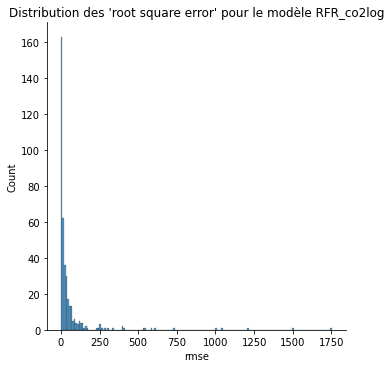

In [170]:
df_RFR_co2log = df_erreurs(RandomForestRegressor_co2log, 'co2', True, 'RFR_co2log')

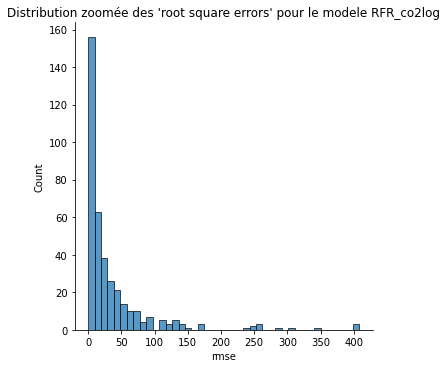

In [171]:
sns.displot(data = df_RFR_co2log[df_RFR_co2log.rmse < 500], x = 'rmse')
plt.title('Distribution zoomée des \'root square errors\' pour le modele RFR_co2log');

In [172]:
X_test.loc[df_RFR_co2log[df_RFR_co2log.rmse > 500].index]

buildingtype primarypropertytype councildistrictcode  \
1249  nonresidential             medical                   5   
161   nonresidential               other                   7   
505   nonresidential             medical                   7   
1246  nonresidential             medical                   3   
15    nonresidential               other                   7   
1253  nonresidential               other                   3   
249   nonresidential             medical                   3   
122   nonresidential               other                   2   
16    nonresidential               other                   3   
97            campus           education                   5   

      numberofbuildings  numberoffloors  propertygfatotal  propertygfaparking  \
1249                1.0             2.0           53575.0                 0.0   
161                 1.0            11.0          299070.0             68432.0   
505                 1.0             4.0           49249.0                 0.0   
1246                1.0             8.0          178000.0                 0.0   
15                  1.0            10.0          540360.0                 0.0   
1253                1.0             7.0          267470.0                 0.0   
249                 1.0             7.0          330532.5            150455.0   
122                 1.0             3.0         1172127.0                 0.0   
16                  1.0            19.0          385274.0                 0.0   
97                 11.0             2.0          694072.0            111625.0   

      propertygfabuilding(s) largestpropertyusetype  \
1249                 53575.0                medical   
161                 230638.0                  other   
505                  49249.0                medical   
1246                178000.0                medical   
15                  540360.0                  other   
1253                267470.0                  other   
249                 180077.5                medical   
122                1172127.0                  other   
16                  385274.0                  other   
97                  582447.0              education   

      largestpropertyusetypegfa secondlargestpropertyusetype  \
1249                    53575.0                        aucun   
161                    250000.0                        aucun   
505                     40584.0                       office   
1246                   181930.0                        aucun   
15                     537150.0                        aucun   
1253                   160482.0                      medical   
249                    215602.0                        aucun   
122                   1172127.0                        aucun   
16                     385274.0                        aucun   
97                     667300.0                        aucun   

      secondlargestpropertyusetypegfa thirdlargestpropertyusetype  \
1249                              0.0                       aucun   
161                               0.0                       aucun   
505                            7165.0                       aucun   
1246                              0.0                       aucun   
15                                0.0                       aucun   
1253                         106988.0                       aucun   
249                               0.0                       aucun   
122                               0.0                       aucun   
16                                0.0                       aucun   
97                                0.0                       aucun   

      thirdlargestpropertyusetypegfa outlier  countofallpropertyusetypes  \
1249                             0.0     non                         1.0   
161                              0.0     non                         1.0   
505                              0.0     non                         2.0   
1246                             0.0

In [173]:
rmse(RandomForestRegressor_elec, 'elec', False)

6157380.571281133

In [174]:
rmse(RandomForestRegressor_co2, 'co2', False)

297.33448885249146

In [175]:
rmse(RandomForestRegressor_eleclog, 'elec', True)

4806305.980325309

In [176]:
rmse(RandomForestRegressor_co2log, 'co2', True)

179.35032164678643

In [177]:
def graph_ypred_ytest(x, y, typemodele):
    
    fig = plt.figure(figsize = (15,7))

    sns.scatterplot(x=x,y=y)

    mini = min(min(x), min(y))
    maxi = max(max(x), max(y))

    sns.lineplot(x=[mini,maxi], y=[mini,maxi], color='r')

    plt.title('Valeurs prédites en fonction des valeurs réelles pour le modele'+ typemodele);

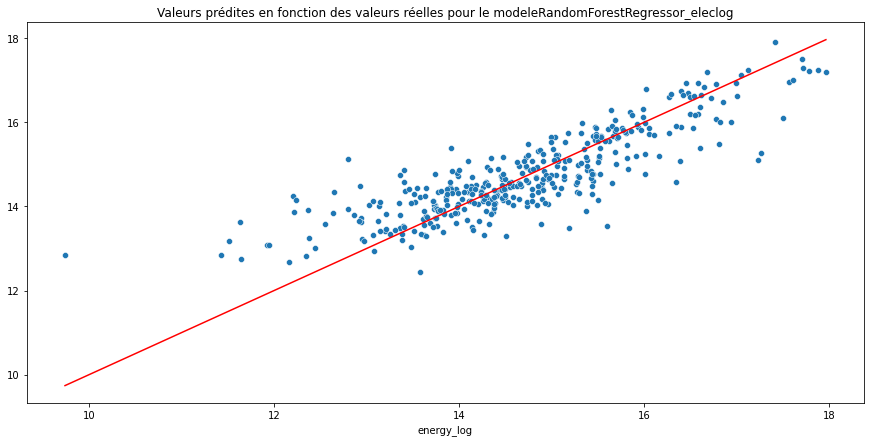

In [178]:
graph_ypred_ytest(y_test_eleclog, RandomForestRegressor_eleclog.predict(X_test), 'RandomForestRegressor_eleclog')

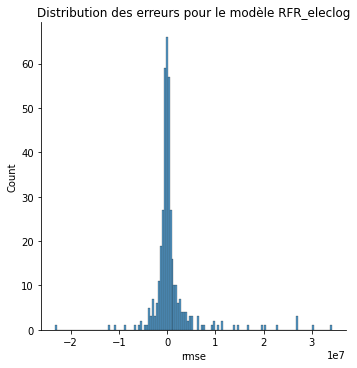

In [179]:
df_erreurs(RandomForestRegressor_eleclog, 'elec', True, 'RFR_eleclog', pos=False)

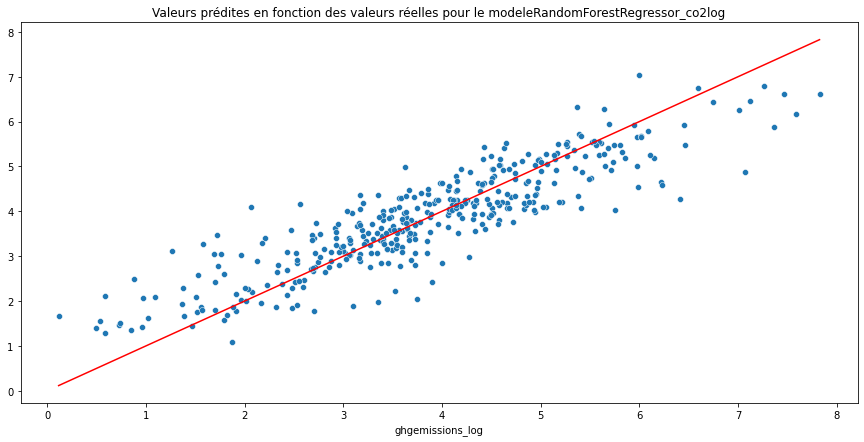

In [180]:
graph_ypred_ytest(y_test_co2log, RandomForestRegressor_co2log.predict(X_test), 'RandomForestRegressor_co2log')

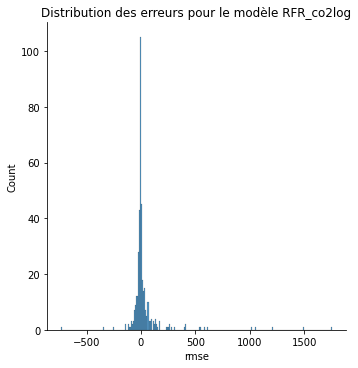

In [181]:
df_erreurs(RandomForestRegressor_co2log, 'co2', True, 'RFR_co2log', pos=False)

# AdaBoost

In [182]:
from sklearn.ensemble import AdaBoostRegressor

In [183]:
pipe_AdaBoost = Pipeline([('preprocessing', col_modif),('estimator', AdaBoostRegressor(random_state = 0))])

params_AdaBoost = {'estimator__n_estimators' : [50,100,200,300], 'estimator__learning_rate' : [0.1, 0.3, 0.5, 0.8, 1]}


Adaboost_eleclog = gridsearch(pipe_AdaBoost, params_AdaBoost, y_train_eleclog)

Adaboost_co2log = gridsearch(pipe_AdaBoost, params_AdaBoost, y_train_co2log)

Adaboost_elec = gridsearch(pipe_AdaBoost, params_AdaBoost, y_train_elec)

Adaboost_co2 = gridsearch(pipe_AdaBoost, params_AdaBoost, y_train_co2)

In [184]:
dic_adaboost = {'Adaboost_elec' : Adaboost_elec, 'Adaboost_eleclog': Adaboost_eleclog, 'Adaboost_co2' : Adaboost_co2, 'Adaboost_co2log' : Adaboost_co2log}

In [185]:
print_score(dic_adaboost)

Adaboost_elec a un R² égal à -0.46918806508113486
Adaboost_eleclog a un R² égal à 0.6369356420606628
Adaboost_co2 a un R² égal à -0.20106055478873675
Adaboost_co2log a un R² égal à 0.6895430931019405


In [186]:
#scores au log pas trop mauvais mais moins bons que le modele random forest

In [187]:
rmse(Adaboost_elec, 'elec', False)

10275162.878606714

In [188]:
rmse(Adaboost_eleclog, 'elec', True)

6416134.458793614

In [189]:
rmse(Adaboost_co2, 'co2', False)

275.64087597708624

In [190]:
rmse(Adaboost_co2log, 'co2', True)

188.40197602322155

In [191]:
Adaboost_co2log.best_params_

{'estimator__learning_rate': 0.8, 'estimator__n_estimators': 300}

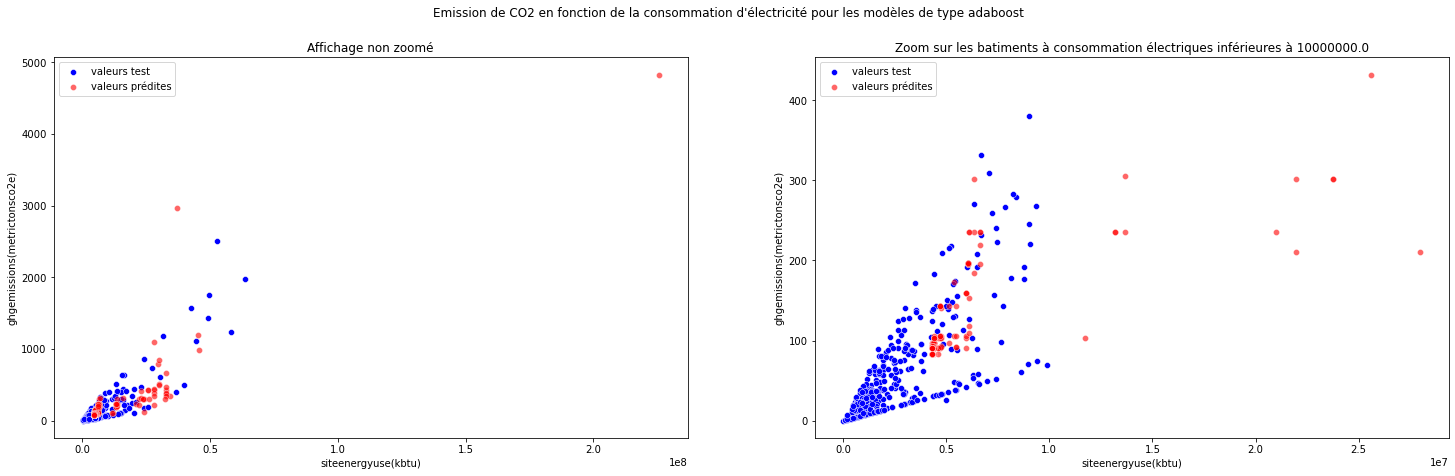

In [192]:
graph(Adaboost_elec, Adaboost_co2, False, type_modele = 'adaboost')

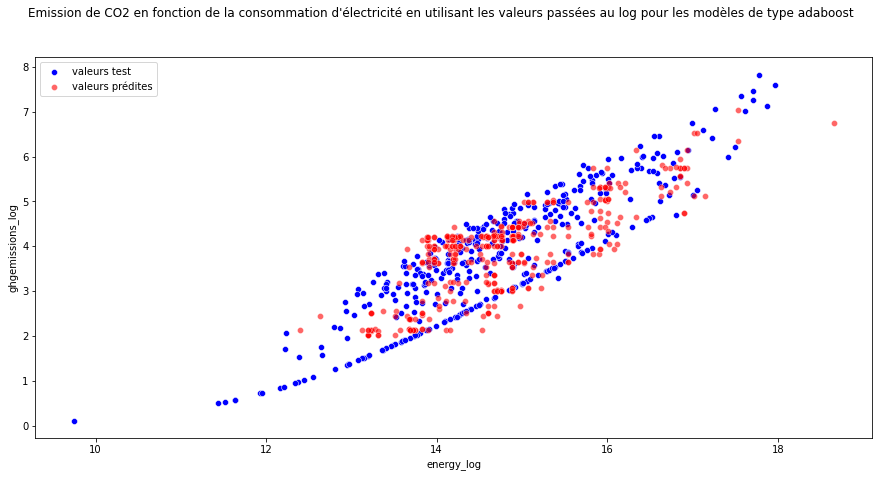

In [193]:
graph(Adaboost_eleclog, Adaboost_co2log, True, type_modele = 'adaboost')

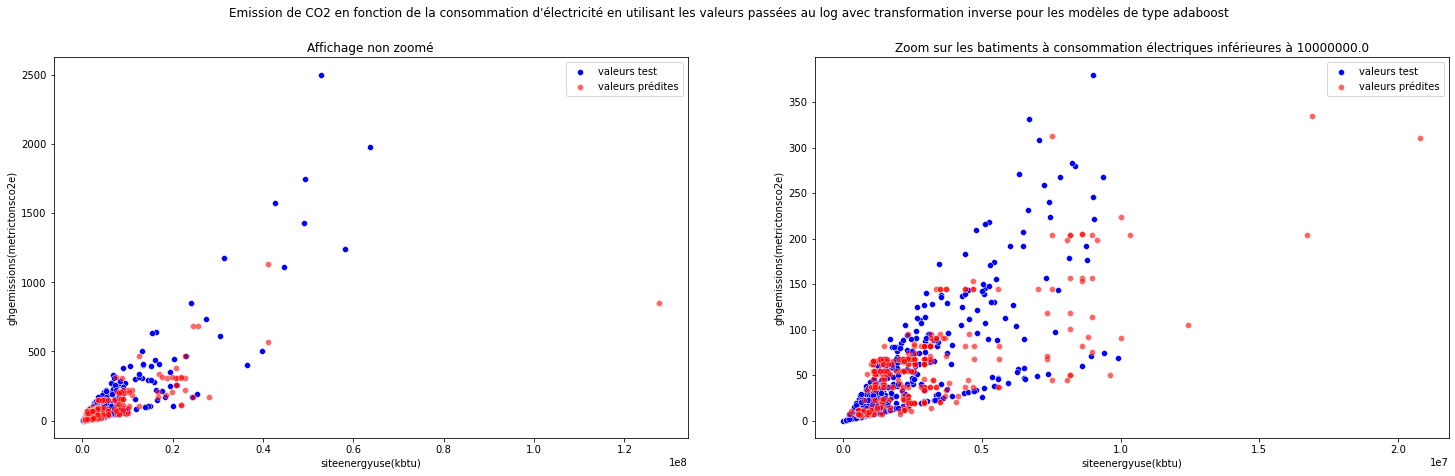

In [194]:
graph(Adaboost_eleclog, Adaboost_co2log, True, True, type_modele = 'adaboost')

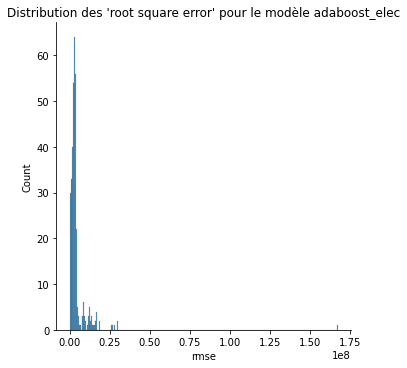

In [195]:
df_adaboostelec = df_erreurs(Adaboost_elec, 'elec', False, 'adaboost_elec')

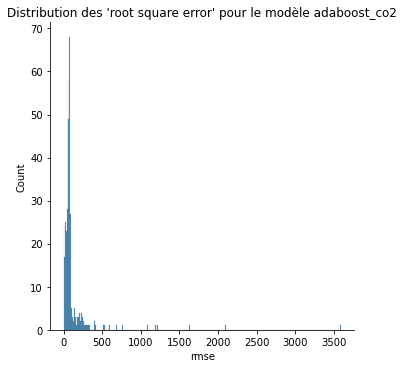

In [196]:
df_adaboostco2 = df_erreurs(Adaboost_co2, 'co2', False, 'adaboost_co2')

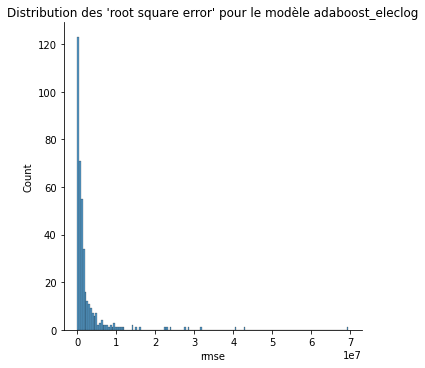

In [197]:
df_adaboosteleclog = df_erreurs(Adaboost_eleclog, 'elec', True, 'adaboost_eleclog')

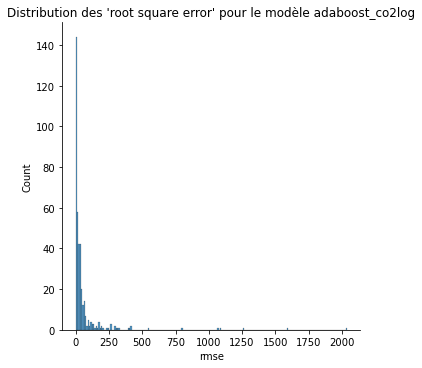

In [198]:
df_adaboostco2log = df_erreurs(Adaboost_co2log, 'co2', True, 'adaboost_co2log')

# Gradient Boosting

In [199]:
from sklearn.ensemble import GradientBoostingRegressor

In [200]:
pipe_GBoost = Pipeline([('preprocessing', col_modif),('estimator', GradientBoostingRegressor(random_state = 0))])

params_GBoost = {'estimator__max_depth':[3,5,10],'estimator__min_samples_split': [2,5] ,'estimator__n_estimators' : [50,100,200],
                 'estimator__learning_rate' : [0.1, 0.3, 0.5, 0.8, 1], 'estimator__loss' : ['ls', 'lad', 'huber']}


GBoost_eleclog = gridsearch(pipe_GBoost, params_GBoost, y_train_eleclog)

GBoost_co2log = gridsearch(pipe_GBoost, params_GBoost, y_train_co2log)

GBoost_elec = gridsearch(pipe_GBoost, params_GBoost, y_train_elec)

GBoost_co2 = gridsearch(pipe_GBoost, params_GBoost, y_train_co2)

In [201]:
dic_Gboost = {'GBoost_elec' : GBoost_elec, 'GBoost_eleclog' : GBoost_eleclog, 'GBoost_co2' : GBoost_co2, 'GBoost_co2log': GBoost_co2log}

In [202]:
print_score(dic_Gboost) #avec tuning sur depth et min samples split

GBoost_elec a un R² égal à -0.27294331573763597
GBoost_eleclog a un R² égal à 0.7233958317933932
GBoost_co2 a un R² égal à -0.7812806826000296
GBoost_co2log a un R² égal à 0.8073327790226049


In [203]:
GBoost_co2log.best_params_

{'estimator__learning_rate': 0.1,
 'estimator__loss': 'ls',
 'estimator__max_depth': 3,
 'estimator__min_samples_split': 5,
 'estimator__n_estimators': 100}

In [204]:
rmse(GBoost_elec, 'elec', False)

9564329.983585874

In [205]:
rmse(GBoost_eleclog, 'elec', True)

5652673.829946497

In [206]:
rmse(GBoost_co2, 'co2', False)

335.6814546010055

In [207]:
rmse(GBoost_co2log, 'co2', True)

151.4980382157591

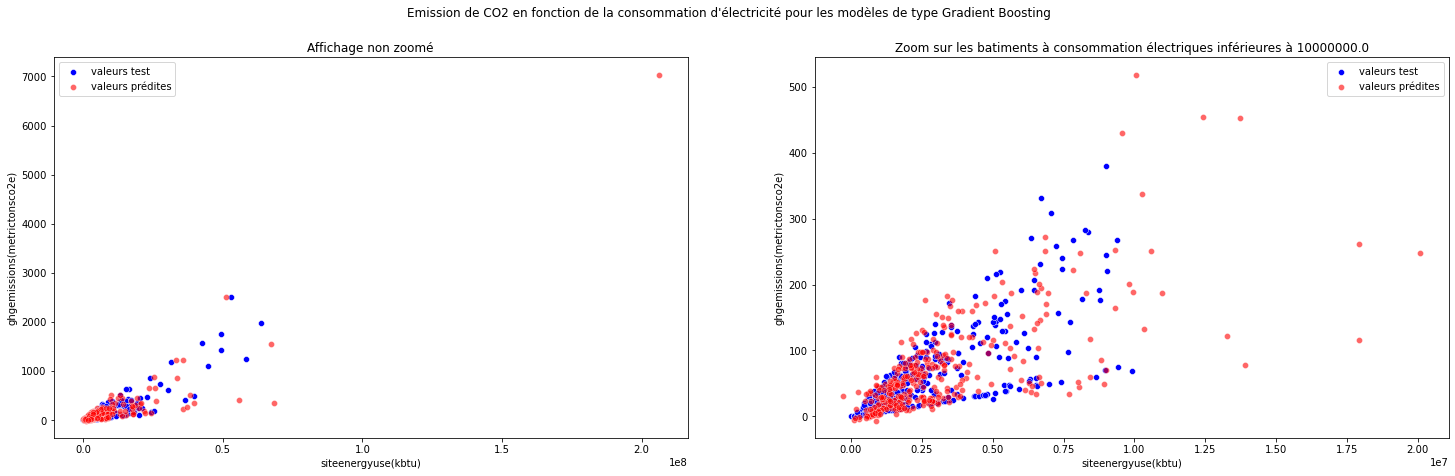

In [208]:
graph(GBoost_elec, GBoost_co2, False, type_modele = 'Gradient Boosting')

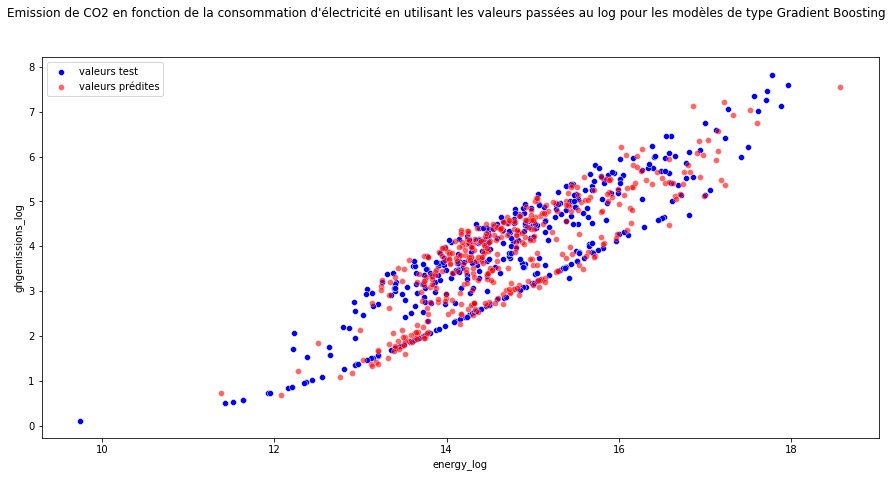

In [209]:
graph(GBoost_eleclog, GBoost_co2log, True, type_modele = 'Gradient Boosting')

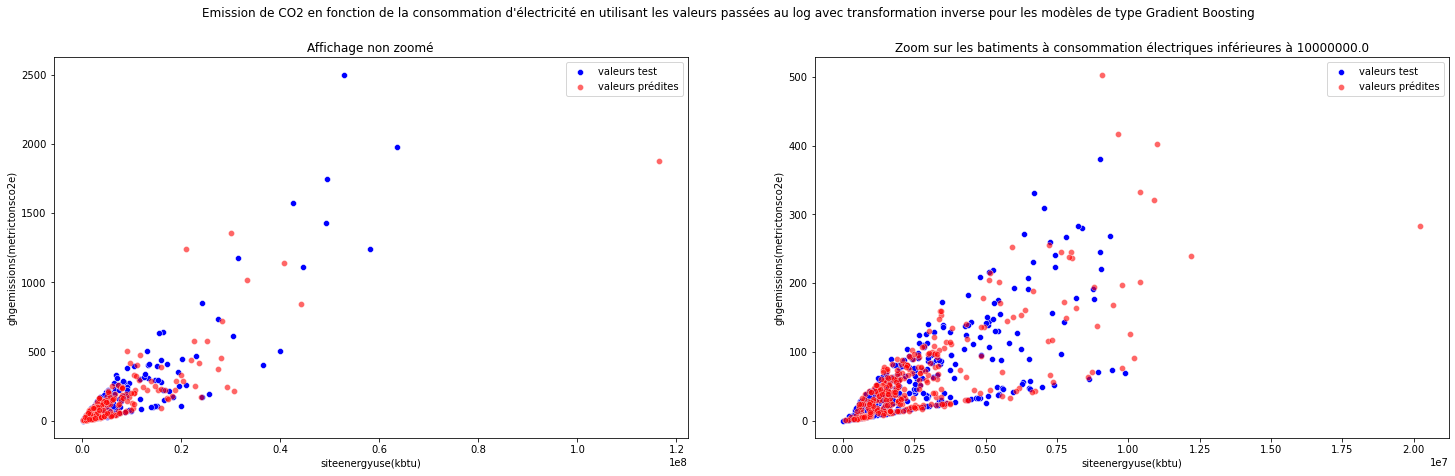

In [210]:
graph(GBoost_eleclog, GBoost_co2log, True, True, type_modele = 'Gradient Boosting')

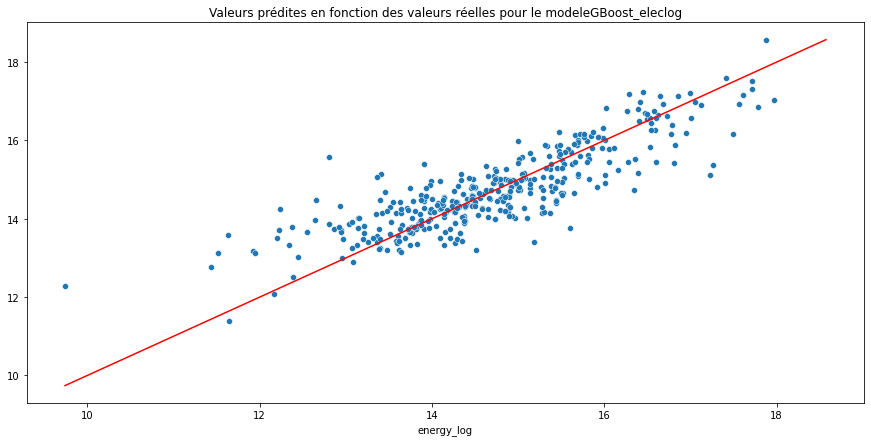

In [211]:
graph_ypred_ytest(y_test_eleclog, GBoost_eleclog.predict(X_test), 'GBoost_eleclog')

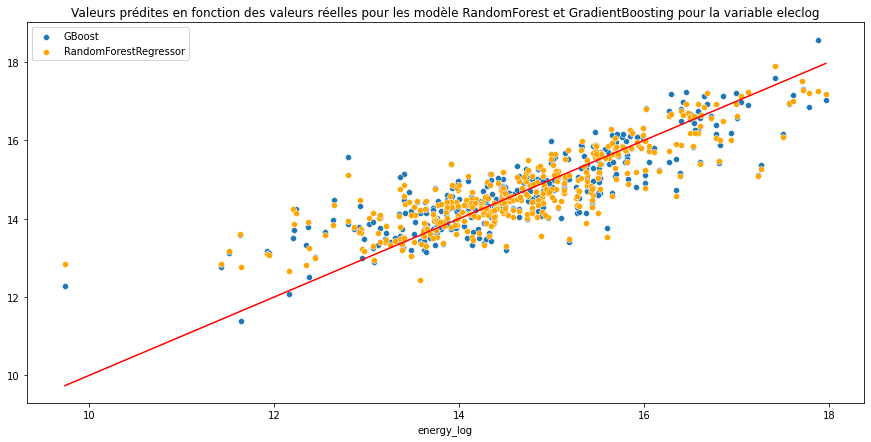

In [212]:
fig = plt.figure(figsize = (15,7))
sns.scatterplot(x = y_test_eleclog, y = GBoost_eleclog.predict(X_test))
sns.scatterplot(x = y_test_eleclog, y = RandomForestRegressor_eleclog.predict(X_test), color= 'orange')
plt.legend(['GBoost', 'RandomForestRegressor'])
sns.lineplot(x=[min(y_test_eleclog),max(y_test_eleclog)], y=[min(y_test_eleclog),max(y_test_eleclog)], color='r')
plt.title('Valeurs prédites en fonction des valeurs réelles pour les modèle RandomForest et GradientBoosting pour la variable eleclog');

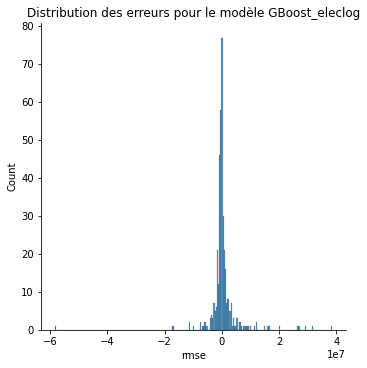

In [213]:
df_gboosteleclog_neg = df_erreurs(GBoost_eleclog, 'elec', True, 'GBoost_eleclog', pos = False, ret = True)

In [214]:
df_gboosteleclog_neg

energy_log  ghgemissions_log  siteenergyuse(kbtu)  \
580    12.369330          0.972671         2.354669e+05   
1017   13.833276          3.382354         1.017924e+06   
761    14.182584          3.516459         1.443503e+06   
686    15.442408          4.941821         5.088064e+06   
186    16.267806          5.050561         1.161498e+07   
...          ...               ...                  ...   
520    13.067904          2.926114         4.734977e+05   
733    15.292770          4.946132         4.380921e+06   
936    14.727727          4.344909         2.489835e+06   
500    14.685900          2.870452         2.387840e+06   
877    15.370054          3.526213         4.732923e+06   

      ghgemissions(metrictonsco2e)  prediction          rmse  
580                          1.645   13.781848 -7.314295e+05  
1017                        28.440   13.862227 -2.990020e+04  
761                         32.665   14.222980 -5.950500e+04  
686                        139.025   14.395756  3.301588e+06  
186                        155.110   16.758711 -7.361507e+06  
...                            ...         ...           ...  
520                         17.655   13.254298 -9.701819e+04  
733                        139.630   14.538106  2.321151e+06  
936                         76.085   15.015576 -8.304973e+05  
500                         16.645   14.723290 -9.097269e+04  
877                         32.995   14.151915  3.333019e+06  

[391 rows x 6 columns]

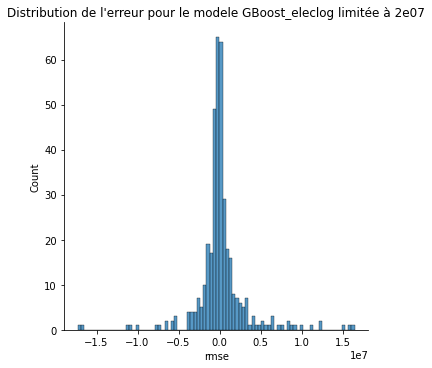

In [215]:
sns.displot(data = df_gboosteleclog_neg[abs(df_gboosteleclog_neg.rmse)<2e07], x = 'rmse')
plt.title("Distribution de l'erreur pour le modele GBoost_eleclog limitée à 2e07");

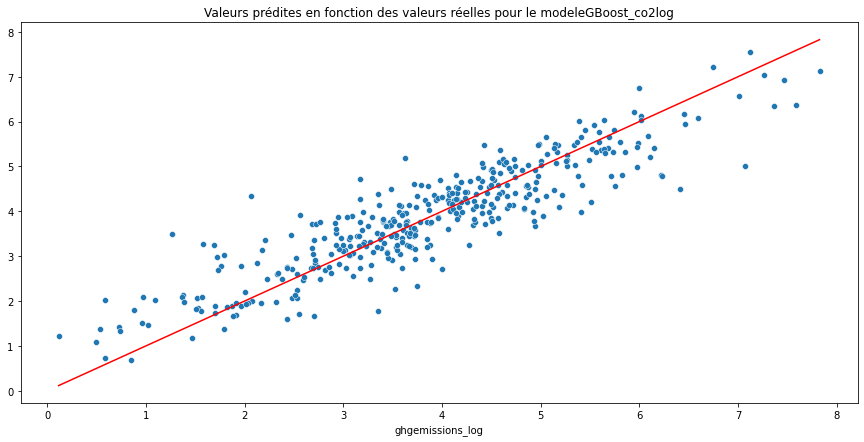

In [216]:
graph_ypred_ytest(y_test_co2log, GBoost_co2log.predict(X_test), 'GBoost_co2log')

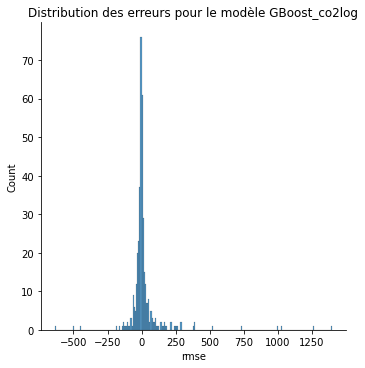

In [217]:
df_gboostco2log_neg = df_erreurs(GBoost_co2log, 'co2', True, 'GBoost_co2log', pos = False, ret = True)

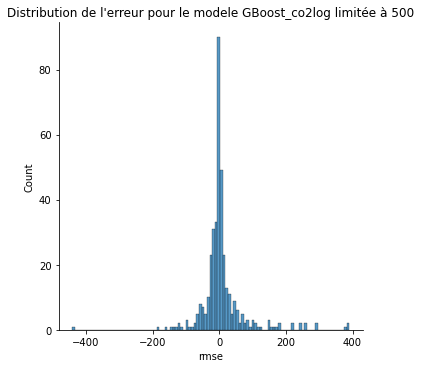

In [218]:
sns.displot(data = df_gboostco2log_neg[abs(df_gboostco2log_neg.rmse)<500], x = 'rmse')
plt.title("Distribution de l'erreur pour le modele GBoost_co2log limitée à 500");

In [219]:
X_test.iloc[GBoost_eleclog.predict(X_test).tolist().index(max(GBoost_eleclog.predict(X_test).tolist()))]

buildingtype                       nonresidential
primarypropertytype                         other
councildistrictcode                             2
numberofbuildings                             1.0
numberoffloors                                3.0
propertygfatotal                        1172127.0
propertygfaparking                            0.0
propertygfabuilding(s)                  1172127.0
largestpropertyusetype                      other
largestpropertyusetypegfa               1172127.0
secondlargestpropertyusetype                aucun
secondlargestpropertyusetypegfa               0.0
thirdlargestpropertyusetype                 aucun
thirdlargestpropertyusetypegfa                0.0
outlier                                       non
countofallpropertyusetypes                    1.0
age_derniere_reno                              17
electricity_ratio                              70
gas_ratio                                      30
steam_ratio                                     0


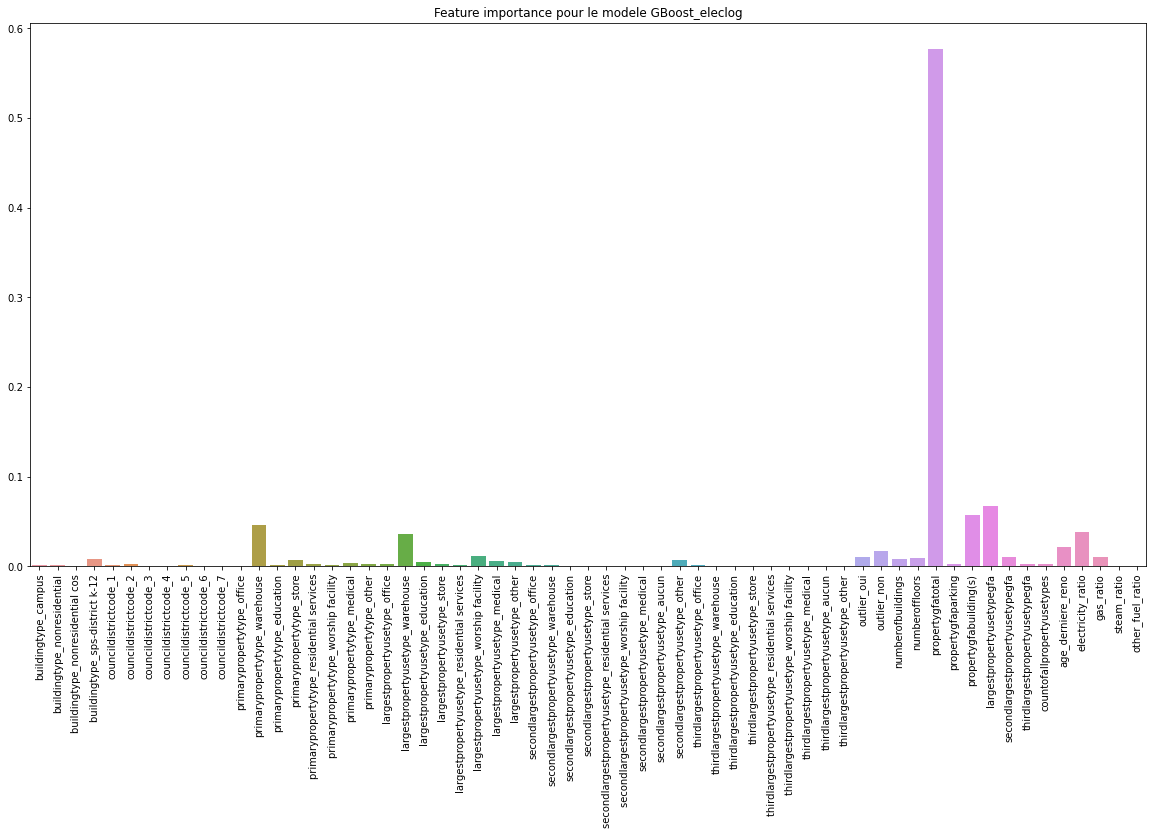

In [220]:
graph_feature_imp(GBoost_eleclog, 'GBoost_eleclog')

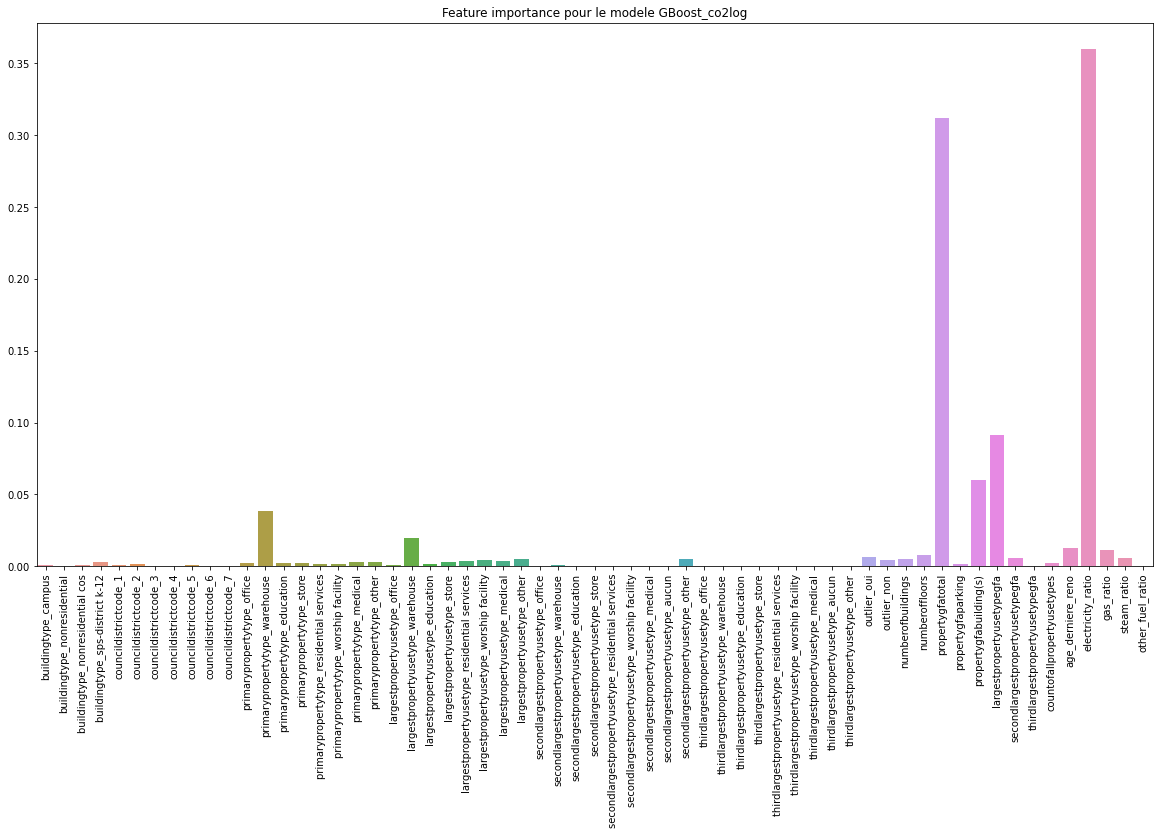

In [221]:
graph_feature_imp(GBoost_co2log, 'GBoost_co2log')

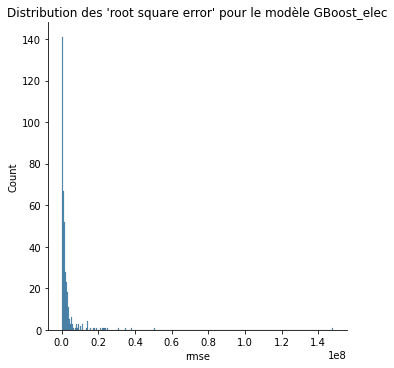

In [222]:
df_gboostelec = df_erreurs(GBoost_elec, 'elec', False, 'GBoost_elec')

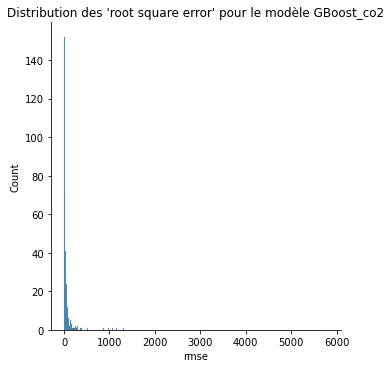

In [223]:
df_gboostco2 = df_erreurs(GBoost_co2, 'co2', False, 'GBoost_co2')

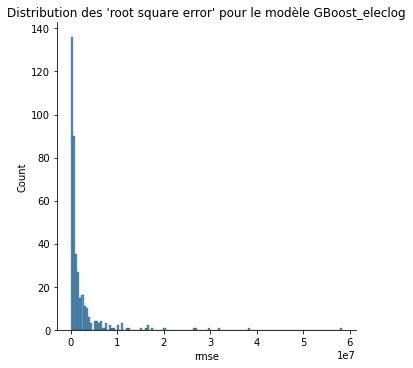

In [224]:
df_gboosteleclog = df_erreurs(GBoost_eleclog, 'elec', True, 'GBoost_eleclog')

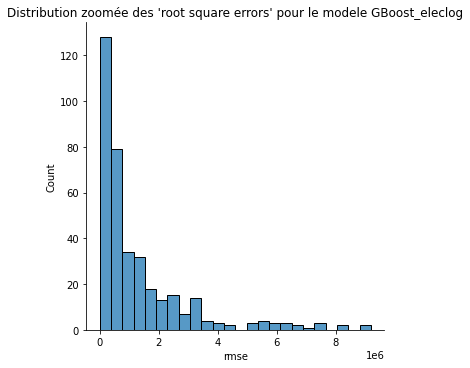

In [225]:
sns.displot(data = df_gboosteleclog[df_gboosteleclog.rmse<1e07], x = 'rmse')
plt.title('Distribution zoomée des \'root square errors\' pour le modele GBoost_eleclog');

In [226]:
X_test.loc[df_gboosteleclog[df_gboosteleclog.rmse>1e07].index]

buildingtype   primarypropertytype councildistrictcode  \
420   nonresidential                office                   1   
1249  nonresidential               medical                   5   
161   nonresidential                 other                   7   
358   nonresidential                 store                   7   
233   nonresidential                 store                   2   
312   nonresidential                 other                   3   
1247  nonresidential                office                   2   
254   nonresidential                 other                   6   
406   nonresidential                office                   2   
505   nonresidential               medical                   7   
693   nonresidential  residential services                   7   
1246  nonresidential               medical                   3   
268   nonresidential                 other                   6   
1253  nonresidential                 other                   3   
249   nonresidential               medical                   3   
122   nonresidential                 other                   2   
16    nonresidential                 other                   3   
77    nonresidential                office                   4   
88    nonresidential                 other                   3   

      numberofbuildings  numberoffloors  propertygfatotal  propertygfaparking  \
420                 1.0             3.0           85126.0                 0.0   
1249                1.0             2.0           53575.0                 0.0   
161                 1.0            11.0          299070.0             68432.0   
358                 1.0             1.0           57176.0                 0.0   
233                 1.0             1.0          158415.0                 0.0   
312                 1.0             3.0          169785.0             63782.0   
1247                1.0             4.0          162157.0                 0.0   
254                 1.0             3.0          280252.0            156312.0   
406                 1.0             8.0          446261.0            124788.0   
505                 1.0             4.0           49249.0                 0.0   
693                 1.0             4.0          274442.0            105499.0   
1246                1.0             8.0          178000.0                 0.0   
268                 1.0             5.0          322869.0            182454.0   
1253                1.0             7.0          267470.0                 0.0   
249                 1.0             7.0          330532.5            150455.0   
122                 1.0             3.0         1172127.0                 0.0   
16                  1.0            19.0          385274.0                 0.0   
77                  1.0             2.0           96300.0                 0.0   
88                  2.0             6.0          250981.0                 0.0   

      propertygfabuilding(s) largestpropertyusetype  \
420                  85126.0                 office   
1249                 53575.0                medical   
161                 230638.0                  other   
358                  57176.0                  store   
233                 158415.0                  store   
312                 106003.0                  other   
1247                162157.0                 office   
254                 123940.0                  other   
406                 321473.0                 office   
505                  49249.0                medical   
693                 168943.0   residential services   
1246                178000.0                medical   
268                 140415.0                  other   
1253                267470.0                  other   
249                 180077.5                medical   
122                1172127.0                  other   
16                  385274.0                  other   
77                   96300.0                 office   
88                  2

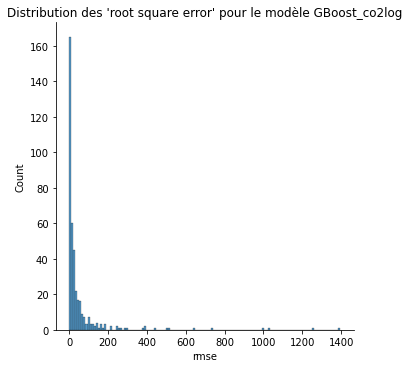

In [227]:
df_gboostco2log = df_erreurs(GBoost_co2log, 'co2', True, 'GBoost_co2log')

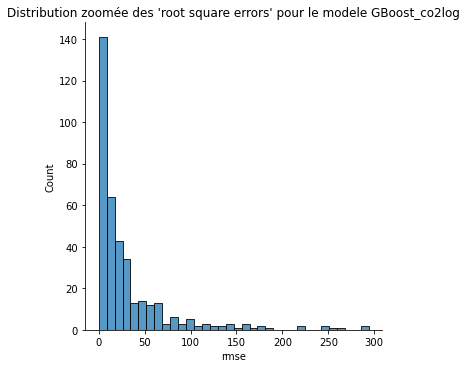

In [228]:
sns.displot(data = df_gboostco2log[df_gboostco2log.rmse < 300], x = 'rmse')
plt.title('Distribution zoomée des \'root square errors\' pour le modele GBoost_co2log');

In [229]:
X_test.loc[df_gboostco2log[df_gboostco2log.rmse > 300].index]

buildingtype primarypropertytype councildistrictcode  \
1249      nonresidential             medical                   5   
52    nonresidential cos               other                   7   
161       nonresidential               other                   7   
1247      nonresidential              office                   2   
505       nonresidential             medical                   7   
1246      nonresidential             medical                   3   
1264  nonresidential cos               other                   2   
1253      nonresidential               other                   3   
249       nonresidential             medical                   3   
122       nonresidential               other                   2   
16        nonresidential               other                   3   
97                campus           education                   5   

      numberofbuildings  numberoffloors  propertygfatotal  propertygfaparking  \
1249                1.0             2.0           53575.0                 0.0   
52                  1.0             5.0          396085.0                 0.0   
161                 1.0            11.0          299070.0             68432.0   
1247                1.0             4.0          162157.0                 0.0   
505                 1.0             4.0           49249.0                 0.0   
1246                1.0             8.0          178000.0                 0.0   
1264                1.0             1.0           51044.5                 0.0   
1253                1.0             7.0          267470.0                 0.0   
249                 1.0             7.0          330532.5            150455.0   
122                 1.0             3.0         1172127.0                 0.0   
16                  1.0            19.0          385274.0                 0.0   
97                 11.0             2.0          694072.0            111625.0   

      propertygfabuilding(s) largestpropertyusetype  \
1249                 53575.0                medical   
52                  396085.0                  other   
161                 230638.0                  other   
1247                162157.0                 office   
505                  49249.0                medical   
1246                178000.0                medical   
1264                 51044.5                  other   
1253                267470.0                  other   
249                 180077.5                medical   
122                1172127.0                  other   
16                  385274.0                  other   
97                  582447.0              education   

      largestpropertyusetypegfa secondlargestpropertyusetype  \
1249                    53575.0                        aucun   
52                     278500.0                        aucun   
161                    250000.0                        aucun   
1247                    88698.0                        other   
505                     40584.0                       office   
1246                   181930.0                        aucun   
1264                    35361.0                        other   
1253                   160482.0                      medical   
249                    215602.0                        aucun   
122                   1172127.0                        aucun   
16                     385274.0                        aucun   
97                     667300.0                        aucun   

      secondlargestpropertyusetypegfa thirdlargestpropertyusetype  \
1249                              0.0                       aucun   
52                                0.0                       aucun   
161                               0.0                       aucun   
1247                          72726.0                       aucun   
505                            7165.0                       aucun   
1246                              0.0                       aucun   
1264                          12689.0    

# Comparaison modèles

In [230]:
comparaison_elec = pd.DataFrame(columns = ['modele', 'R2', 'rmse', 'fit_time'])

In [231]:
comparaison_co2 = pd.DataFrame(columns = ['modele', 'R2', 'rmse', 'fit_time'])

In [232]:
dic_elec = {'lr_elec' : lr_elec,
            'ridge_elec' : ridge_elec,
            'lasso_elec' : lasso_elec,
            'elasticnet_elec' : elasticnet_elec,
            'SVR_elec' : SVR_elec,
            'LinearSVR_elec' : LinearSVR_elec,
            'RandomForest_elec' : RandomForestRegressor_elec,
            'Adaboost_elec' : Adaboost_elec,
            'Gradient_Boosting_elec' : GBoost_elec}

In [233]:
dic_eleclog = {'lr_eleclog' : lr_eleclog,
               'ridge_eleclog' : ridge_eleclog,
               'lasso_eleclog' : lasso_eleclog,
               'elasticnet_eleclog' : elasticnet_eleclog,
               'SVR_eleclog' : SVR_eleclog,
               'LinearSVR_eleclog' : LinearSVR_eleclog,
               'RandomForest_eleclog' : RandomForestRegressor_eleclog,
               'Adaboost_eleclog' : Adaboost_eleclog,
               'Gradient_Boosting_eleclog' : GBoost_eleclog}

In [234]:
dic_co2 = {'lr_co2' : lr_co2,
            'ridge_co2' : ridge_co2,
            'lasso_co2' : lasso_co2,
            'elasticnet_co2' : elasticnet_co2,
            'SVR_co2' : SVR_co2,
            'LinearSVR_co2' : LinearSVR_co2,
            'RandomForest_co2' : RandomForestRegressor_co2,
            'Adaboost_co2' : Adaboost_co2,
            'Gradient_Boosting_co2' : GBoost_co2}

In [235]:
dic_co2log = {'lr_co2log' : lr_co2log,
            'ridge_co2log' : ridge_co2log,
            'lasso_co2log' : lasso_co2log,
            'elasticnet_co2log' : elasticnet_co2log,
            'SVR_co2log' : SVR_co2log,
            'LinearSVR_co2log' : LinearSVR_co2log,
            'RandomForest_co2log' : RandomForestRegressor_co2log,
            'Adaboost_co2log' : Adaboost_co2log,
            'Gradient_Boosting_co2log' : GBoost_co2log}

In [236]:
for model in dic_elec:
    
    df = pd.DataFrame([[model, dic_elec[model].score(X_test, y_test_elec), rmse(dic_elec[model], 'elec', False), dic_elec[model].refit_time_]],
                       columns = ['modele', 'R2', 'rmse', 'fit_time'])
    comparaison_elec = comparaison_elec.append(df)

In [237]:
for model in dic_eleclog:
    
    df = pd.DataFrame([[model, dic_eleclog[model].score(X_test, y_test_eleclog), rmse(dic_eleclog[model], 'elec', True), dic_eleclog[model].refit_time_]],
                       columns = ['modele', 'R2', 'rmse', 'fit_time'])
    comparaison_elec = comparaison_elec.append(df)

In [238]:
for model in dic_co2:
    
    df2 = pd.DataFrame([[model, dic_co2[model].score(X_test, y_test_co2), rmse(dic_co2[model], 'co2', False), dic_co2[model].refit_time_]],
                       columns = ['modele', 'R2', 'rmse', 'fit_time'])
    comparaison_co2 = comparaison_co2.append(df2)

In [239]:
for model in dic_co2log:
    
    df2 = pd.DataFrame([[model, dic_co2log[model].score(X_test, y_test_co2log), rmse(dic_co2log[model], 'co2', True), dic_co2log[model].refit_time_]],
                       columns = ['modele', 'R2', 'rmse', 'fit_time'])
    comparaison_co2 = comparaison_co2.append(df2)

In [240]:
comparaison_elec.sort_values('R2', ascending = False)

modele         R2          rmse  fit_time
0  Gradient_Boosting_eleclog   0.723396  5.652674e+06  0.180164
0       RandomForest_eleclog   0.717492  4.806306e+06  0.474431
0           Adaboost_eleclog   0.636936  6.416134e+06  0.121110
0                 lr_eleclog   0.540359  4.976425e+07  0.012011
0            elasticnet_elec   0.486086  6.077082e+06  0.016014
0                 ridge_elec   0.483514  6.092275e+06  0.012010
0          RandomForest_elec   0.472416  6.157381e+06  0.430391
0                 lasso_elec   0.422562  6.441730e+06  0.035032
0                    lr_elec   0.417746  6.468541e+06  0.047042
0              ridge_eleclog   0.209428  8.355012e+06  0.010862
0         elasticnet_eleclog   0.181188  8.439893e+06  0.011899
0              lasso_eleclog   0.177157  8.454213e+06  0.020795
0                SVR_eleclog   0.149521  8.306081e+06  0.048043
0                   SVR_elec  -0.010015  8.519495e+06  0.066059
0     Gradient_Boosting_elec  -0.272943  9.564330e+06  1.135292
0              Adaboost_elec  -0.469188  1.027516e+07  0.255231
0          LinearSVR_eleclog -11.405261  1.133929e+22  0.049044
0             LinearSVR_elec -12.250221  3.085756e+07  0.046042

In [241]:
comparaison_co2.sort_values('R2', ascending = False)

modele        R2           rmse  fit_time
0  Gradient_Boosting_co2log  0.807333     151.498038  0.181165
0       RandomForest_co2log  0.781734     179.350322  0.310282
0           Adaboost_co2log  0.689543     188.401976  0.071064
0                 lr_co2log  0.661968     798.817715  0.012012
0                 ridge_co2  0.350901     202.635940  0.012010
0            elasticnet_co2  0.340635     204.232175  0.011014
0                 lasso_co2  0.315260     208.124845  0.013012
0                    lr_co2  0.270405     214.833552  0.013012
0              ridge_co2log  0.182031     250.060715  0.011010
0         elasticnet_co2log  0.165769     250.296487  0.011846
0              lasso_co2log  0.163525     250.460059  0.013012
0                SVR_co2log  0.076241     257.051650  0.058053
0                   SVR_co2 -0.050076     257.733849  0.058051
0              Adaboost_co2 -0.201061     275.640876  0.131119
0          RandomForest_co2 -0.397553     297.334489  1.168070
0             LinearSVR_co2 -0.544332     312.558614  0.046042
0     Gradient_Boosting_co2 -0.781281     335.681455  0.571289
0          LinearSVR_co2log -1.681657  431765.651782  0.050045

# Energy_starscore

In [242]:
data_energystar = data[data.energystarscore.notna()]

In [243]:
data_energystar

buildingtype   primarypropertytype councildistrictcode  \
0         nonresidential  residential services                   7   
1         nonresidential  residential services                   7   
2         nonresidential  residential services                   7   
3         nonresidential  residential services                   7   
5         nonresidential  residential services                   7   
...                  ...                   ...                 ...   
1282      nonresidential                office                   2   
1284      nonresidential             education                   3   
1292  nonresidential cos                office                   7   
1295  nonresidential cos                office                   2   
1297  nonresidential cos                office                   2   

      numberofbuildings  numberoffloors  propertygfatotal  propertygfaparking  \
0                   1.0            12.0           88434.0                 0.0   
1                   1.0            11.0          103566.0             15064.0   
2                   1.0            41.0          956110.0            196718.0   
3                   1.0            10.0           61320.0                 0.0   
5                   1.0            11.0           83008.0                 0.0   
...                 ...             ...               ...                 ...   
1282                1.0             2.0           24990.0                 0.0   
1284                1.0             3.0           45000.0                 0.0   
1292                1.0             1.0           13661.0                 0.0   
1295                1.0             1.0           15398.0                 0.0   
1297                1.0             1.0           12294.0                 0.0   

      propertygfabuilding(s) largestpropertyusetype  \
0                    88434.0   residential services   
1                    88502.0   residential services   
2                   759392.0   residential services   
3                    61320.0   residential services   
5                    83008.0   residential services   
...                      ...                    ...   
1282                 24990.0                 office   
1284                 45000.0              education   
1292                 13661.0                 office   
1295                 15398.0                 office   
1297                 12294.0                 office   

      largestpropertyusetypegfa secondlargestpropertyusetype  \
0                       88434.0                        aucun   
1                       83880.0                        other   
2                      756493.0                        aucun   
3                       61320.0                        aucun   
5                       81352.0                        aucun   
...                         ...                          ...   
1282                    24990.0                        aucun   
1284                    45728.0                        aucun   
1292                    13661.0                        aucun   
1295                    15398.0                        aucun   
1297                    12294.0                        aucun   

      secondlargestpropertyusetypegfa thirdlargestpropertyusetype  \
0                                 0.0                       aucun   
1                             15064.0                       other   
2                                 0.0                       aucun   
3                                 0.0                       aucun   
5                                 0.0                       aucun   
...                               ...                         ...   
1282                              0.0                       aucun   
1284                              0.0                       aucun   
1292                              0.0                       aucun   
1295                              0.0                       aucun   
1297     

In [244]:
data_energystar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 862 entries, 0 to 1297
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   buildingtype                     862 non-null    object 
 1   primarypropertytype              862 non-null    object 
 2   councildistrictcode              862 non-null    object 
 3   numberofbuildings                862 non-null    float64
 4   numberoffloors                   862 non-null    float64
 5   propertygfatotal                 862 non-null    float64
 6   propertygfaparking               862 non-null    float64
 7   propertygfabuilding(s)           862 non-null    float64
 8   largestpropertyusetype           862 non-null    object 
 9   largestpropertyusetypegfa        862 non-null    float64
 10  secondlargestpropertyusetype     862 non-null    object 
 11  secondlargestpropertyusetypegfa  862 non-null    float64
 12  thirdlargestpropertyu

## Avec energystar

In [245]:
cat_col_energy, drop_col_energy, num_col_energy = groupcol(data_energystar, True)

In [246]:
X = data_energystar.drop(drop_col_energy, axis = 1)
y = data_energystar[['energy_log','ghgemissions_log', 'siteenergyuse(kbtu)', 'ghgemissions(metrictonsco2e)']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

y_train_elec, y_test_elec = recupcolonne('siteenergyuse(kbtu)')
y_train_eleclog, y_test_eleclog = recupcolonne('energy_log')
y_train_co2, y_test_co2 = recupcolonne('ghgemissions(metrictonsco2e)')
y_train_co2log, y_test_co2log = recupcolonne('ghgemissions_log')

In [247]:
col_modif_energy = ColumnTransformer(transformers = [('buildingtype', encoderbuildingtypes, ['buildingtype']), ('districts', encoderdistricts, ['councildistrictcode']),
                                            ('primarypropertytype', encoderpropertytypes1, ['primarypropertytype', 'largestpropertyusetype']),
                                            ('secondarypropertytypes', encoderpropertytypes2, ['secondlargestpropertyusetype', 'thirdlargestpropertyusetype']),('outliers', encoderoutliers, ['outlier']),
                                            ('scaler',RobustScaler(),num_col_energy)])

In [248]:
pipeenergy_RandomForestRegressor = Pipeline([('preprocessing', col_modif_energy),('estimator', RandomForestRegressor(random_state = 0))])

pipeenergy_GBoost = Pipeline([('preprocessing', col_modif_energy),('estimator', GradientBoostingRegressor(random_state = 0))])

In [249]:
RFR_energy_eleclog = gridsearch(pipeenergy_RandomForestRegressor, params_RandomForestRegressor, y_train_eleclog)
RFR_energy_co2log = gridsearch(pipeenergy_RandomForestRegressor, params_RandomForestRegressor, y_train_co2log)

In [250]:
GBoost_energy_eleclog = gridsearch(pipeenergy_GBoost, params_GBoost, y_train_eleclog)
GBoost_energy_co2log = gridsearch(pipeenergy_GBoost, params_GBoost, y_train_co2log)

In [251]:
rmse(RFR_energy_eleclog, 'elec', True)

21170535.832293753

In [252]:
rmse(RFR_energy_co2log, 'co2', True)

476.8538816304639

In [253]:
rmse(GBoost_energy_eleclog, 'elec', True)

19906533.205086704

In [254]:
rmse(GBoost_energy_co2log, 'co2', True)

418.4134281447809

In [255]:
cols = []

encoder = RFR_energy_eleclog.best_estimator_.named_steps['preprocessing'].transformers_

for i in np.arange(5):
    
    cols += encoder[i][1].get_feature_names(encoder[i][2]).tolist()

cols +=num_col_energy

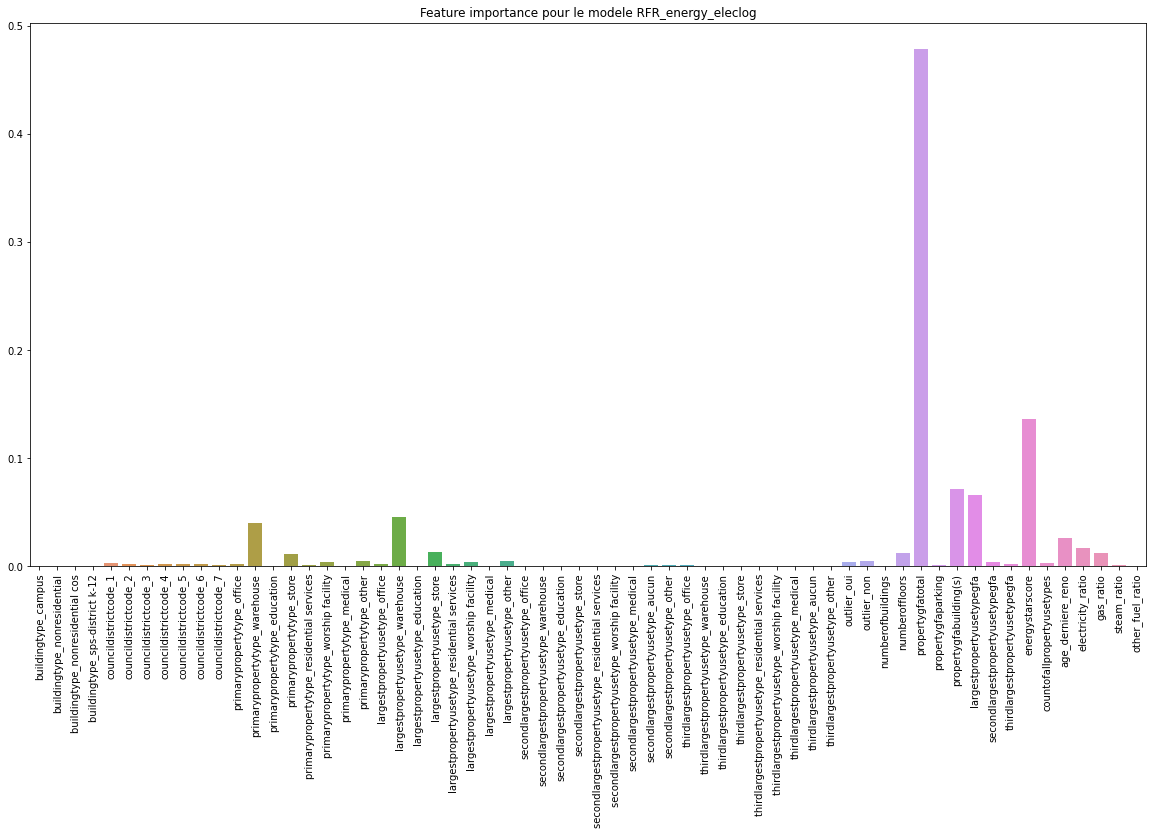

In [256]:
graph_feature_imp(RFR_energy_eleclog, 'RFR_energy_eleclog')

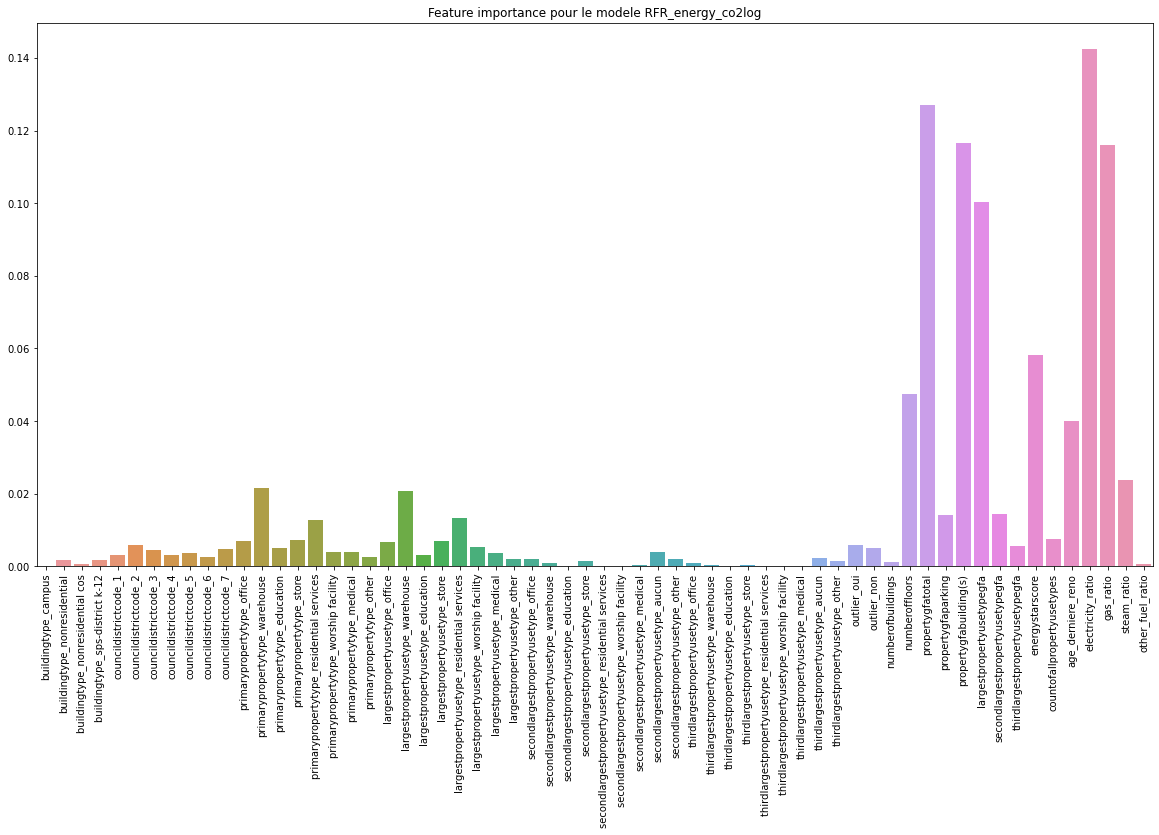

In [257]:
graph_feature_imp(RFR_energy_co2log, 'RFR_energy_co2log')

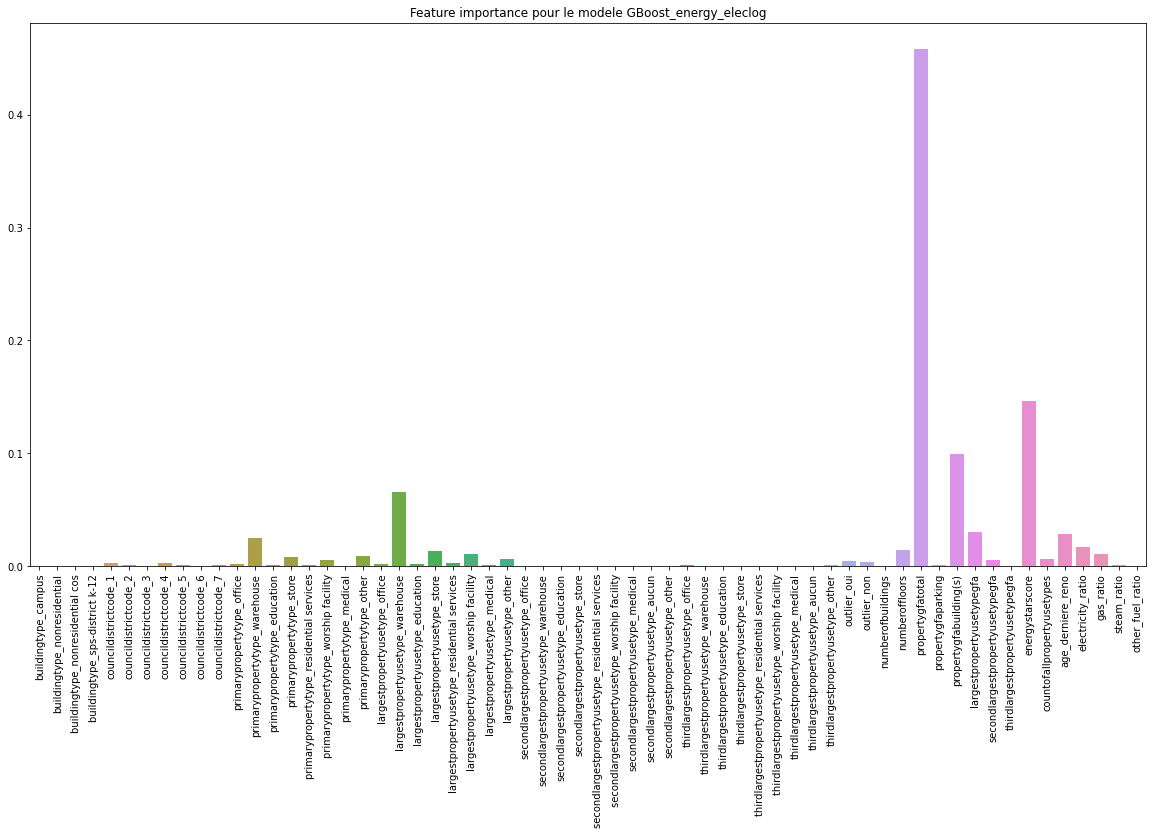

In [258]:
graph_feature_imp(GBoost_energy_eleclog, 'GBoost_energy_eleclog')

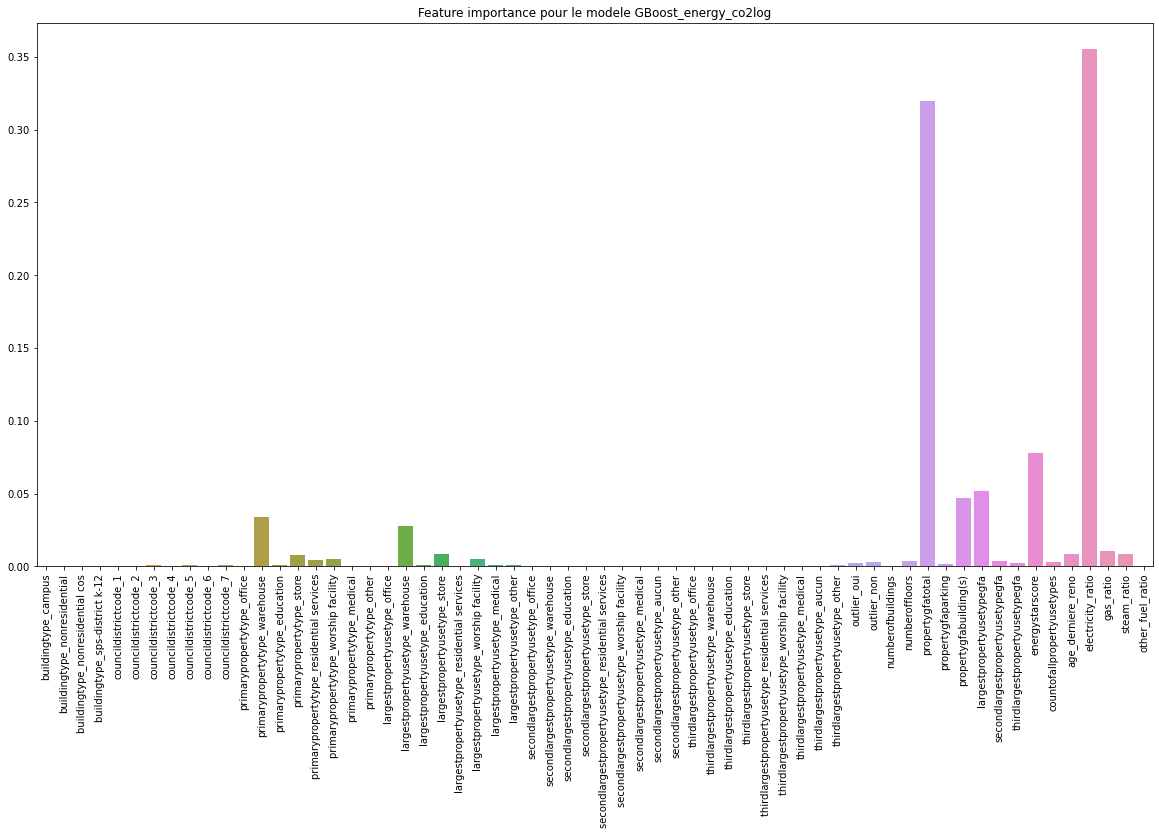

In [259]:
graph_feature_imp(GBoost_energy_co2log, 'GBoost_energy_co2log')

In [260]:
dic_energystar = {'RFR_elec' : RFR_energy_eleclog, 'RFR_co2' : RFR_energy_co2log, 'GBoost_elec' : GBoost_energy_eleclog, 'GBoost_co2' : GBoost_energy_co2log}

In [261]:
for model,y in zip(dic_energystar, [y_test_eleclog, y_test_co2log, y_test_eleclog, y_test_co2log]):
    print(model, 'avec energystar a un R2 score de', dic_energystar[model].score(X_test, y))

RFR_elec avec energystar a un R2 score de 0.8137346889691255
RFR_co2 avec energystar a un R2 score de 0.8299531888515856
GBoost_elec avec energystar a un R2 score de 0.8195332495274581
GBoost_co2 avec energystar a un R2 score de 0.8853727134260905


In [262]:
for model,y in zip(dic_energystar, [y_test_eleclog, y_test_co2log, y_test_eleclog, y_test_co2log]):
    print(model, 'avec energystar a un fit time de', dic_energystar[model].refit_time_, 'secondes')

RFR_elec avec energystar a un fit time de 0.687624454498291 secondes
RFR_co2 avec energystar a un fit time de 0.2872600555419922 secondes
GBoost_elec avec energystar a un fit time de 0.3813459873199463 secondes
GBoost_co2 avec energystar a un fit time de 0.5408086776733398 secondes


In [263]:
for i in [RFR_energy_eleclog, RFR_energy_co2log, GBoost_energy_eleclog, GBoost_energy_co2log]:
    print(i.best_params_)

{'estimator__bootstrap': True, 'estimator__max_depth': 20, 'estimator__max_features': 'auto', 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__n_estimators': 200}
{'estimator__bootstrap': False, 'estimator__max_depth': None, 'estimator__max_features': 'sqrt', 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__n_estimators': 200}
{'estimator__learning_rate': 0.1, 'estimator__loss': 'ls', 'estimator__max_depth': 5, 'estimator__min_samples_split': 5, 'estimator__n_estimators': 200}
{'estimator__learning_rate': 0.1, 'estimator__loss': 'huber', 'estimator__max_depth': 3, 'estimator__min_samples_split': 5, 'estimator__n_estimators': 200}


In [264]:
for i in [RandomForestRegressor_eleclog, RandomForestRegressor_co2log, GBoost_eleclog, GBoost_co2log]:
    print(i.best_params_)

{'estimator__bootstrap': False, 'estimator__max_depth': None, 'estimator__max_features': 'sqrt', 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 5, 'estimator__n_estimators': 300}
{'estimator__bootstrap': False, 'estimator__max_depth': 20, 'estimator__max_features': 'sqrt', 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 5, 'estimator__n_estimators': 200}
{'estimator__learning_rate': 0.1, 'estimator__loss': 'ls', 'estimator__max_depth': 3, 'estimator__min_samples_split': 2, 'estimator__n_estimators': 100}
{'estimator__learning_rate': 0.1, 'estimator__loss': 'ls', 'estimator__max_depth': 3, 'estimator__min_samples_split': 5, 'estimator__n_estimators': 100}


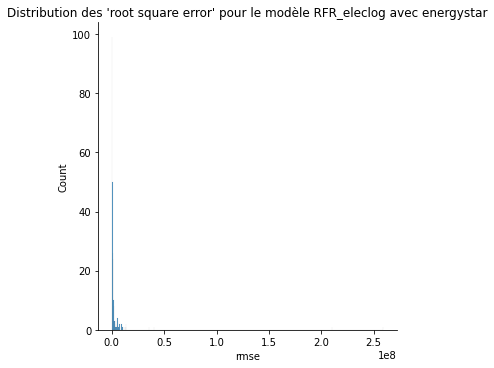

In [265]:
df_rfr_energy_eleclog = df_erreurs(RFR_energy_eleclog, 'elec', True, 'RFR_eleclog avec energystar')

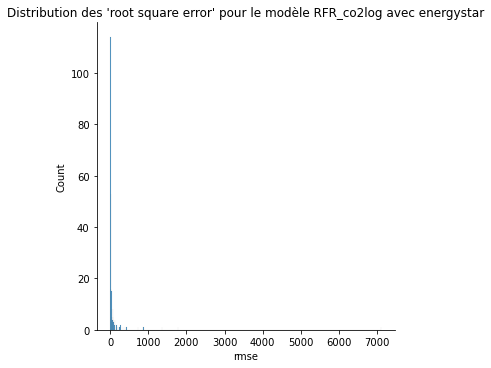

In [266]:
df_rfr_energy_co2log = df_erreurs(RFR_energy_co2log, 'co2', True, 'RFR_co2log avec energystar')

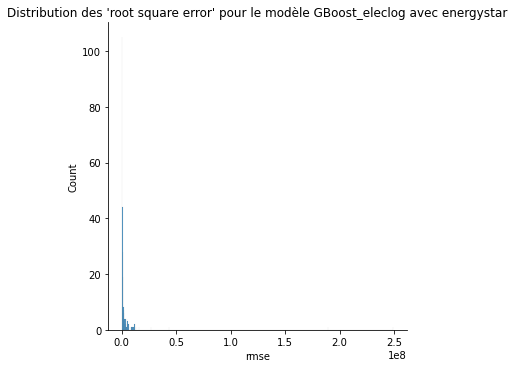

In [267]:
df_GBoost_energy_eleclog = df_erreurs(GBoost_energy_eleclog, 'elec', True, 'GBoost_eleclog avec energystar')

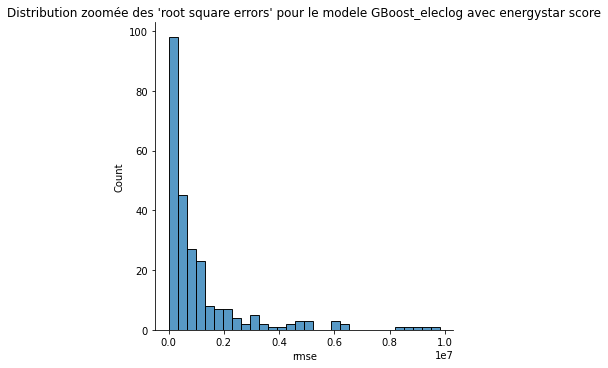

In [268]:
sns.displot(data = df_GBoost_energy_eleclog[df_GBoost_energy_eleclog.rmse < 1e07], x = 'rmse')
plt.title('Distribution zoomée des \'root square errors\' pour le modele GBoost_eleclog avec energystar score');

In [269]:
df_GBoost_energy_eleclog[df_GBoost_energy_eleclog.rmse > 1e07]

energy_log  ghgemissions_log  siteenergyuse(kbtu)  \
218    17.866243          6.164451         5.743953e+07   
1099   16.769648          6.563884         1.918517e+07   
193    17.309964          7.280887         3.293229e+07   
357    16.904514          5.873145         2.195518e+07   
362    17.090803          5.222516         2.645095e+07   
167    17.440576          6.109270         3.752718e+07   
94     19.346970          8.999262         2.525121e+08   
2      18.100297          7.645053         7.258702e+07   
991    16.249491          5.716024         1.140418e+07   
388    19.449495          7.579878         2.797747e+08   
344    15.903897          4.047777         8.071881e+06   

      ghgemissions(metrictonsco2e)  prediction          rmse  
218                        474.540   17.233668  2.692639e+07  
1099                       708.020   15.777945  1.206854e+07  
193                       1451.275   16.865571  1.181566e+07  
357                        354.365   16.123969  1.189628e+07  
362                        184.400   16.490235  1.194260e+07  
167                        449.010   16.884266  1.601207e+07  
94                        8096.110   17.962864  1.892458e+08  
2                         2089.280   17.184192  4.354680e+07  
991                        302.695   17.002863  1.282002e+07  
388                       1957.390   17.239827  2.490730e+08  
344                         56.270   16.749166  1.072434e+07

In [270]:
X_test.loc[df_GBoost_energy_eleclog[df_GBoost_energy_eleclog.rmse > 1e07].index]

buildingtype   primarypropertytype councildistrictcode  \
218   nonresidential                 other                   7   
1099  nonresidential  residential services                   2   
193   nonresidential  residential services                   7   
357   nonresidential                office                   7   
362   nonresidential                office                   7   
167   nonresidential                office                   7   
94    nonresidential               medical                   4   
2     nonresidential  residential services                   7   
991   nonresidential  residential services                   5   
388   nonresidential                 other                   7   
344   nonresidential                office                   1   

      numberofbuildings  numberoffloors  propertygfatotal  propertygfaparking  \
218                 1.0             6.0          378443.0            177660.0   
1099                1.0             1.0          141297.0              2276.5   
193                 1.0            21.0          305548.0                 0.0   
357                 1.0             1.0          105100.0                 0.0   
362                 1.0             4.0          129551.0             42500.0   
167                 1.0            42.0          617684.0            171500.0   
94                  3.5            10.0          879000.0                 0.0   
2                   1.0            41.0          956110.0            196718.0   
991                 1.0             6.0          244500.0             32362.5   
388                 1.0            33.0          429405.0                 0.0   
344                 1.0             5.0          138106.0             16221.0   

      propertygfabuilding(s) largestpropertyusetype  \
218                 200783.0                  other   
1099                139020.5   residential services   
193                 305548.0   residential services   
357                 105100.0                 office   
362                  87051.0                 office   
167                 446184.0                 office   
94                  879000.0                medical   
2                   759392.0   residential services   
991                 212137.5   residential services   
388                 429405.0                  other   
344                 121885.0                 office   

      largestpropertyusetypegfa secondlargestpropertyusetype  \
218                    200783.0                        aucun   
1099                   141297.0                        aucun   
193                    310000.0                        aucun   
357                    105100.0                        aucun   
362                     81470.5                        other   
167                    446184.0                        aucun   
94                     879000.0                        aucun   
2                      756493.0                        aucun   
991                    244500.0                        aucun   
388                    218997.0                       office   
344                    117667.0                        other   

      secondlargestpropertyusetypegfa thirdlargestpropertyusetype  \
218                               0.0                       aucun   
1099                              0.0                       aucun   
193                               0.0                       aucun   
357                               0.0                       aucun   
362                           42500.0                       other   
167                               0.0                       aucun   
94                                0.0                       aucun   
2                                 0.0                       aucun   
991                               0.0                       aucun   
388                          210409.0                       aucun   
344                           16221.0                

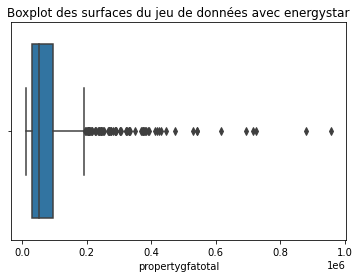

In [271]:
sns.boxplot(data = data_energystar, x = 'propertygfatotal');
plt.title('Boxplot des surfaces du jeu de données avec energystar');

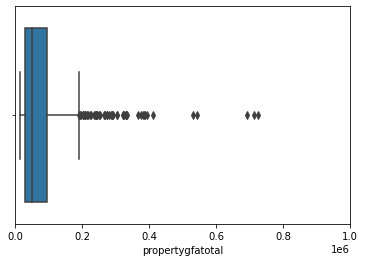

In [272]:
sns.boxplot(data = X_train, x = 'propertygfatotal');
plt.xlim(0,1e06);

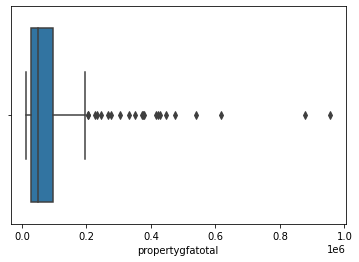

In [273]:
sns.boxplot(data = X_test, x = 'propertygfatotal');

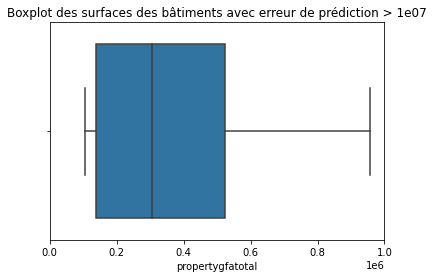

In [274]:
sns.boxplot(data = X_test.loc[df_GBoost_energy_eleclog[df_GBoost_energy_eleclog.rmse > 1e07].index], x = 'propertygfatotal');
plt.xlim(0,1e06)
plt.title('Boxplot des surfaces des bâtiments avec erreur de prédiction > 1e07');

In [275]:
#surface des rmse elevées correspond au surfaces 'outliers' dans le jeu de donnée entier

In [276]:
X_test.loc[df_GBoost_energy_eleclog[df_GBoost_energy_eleclog.rmse > 1e08].index]

buildingtype primarypropertytype councildistrictcode  \
94   nonresidential             medical                   4   
388  nonresidential               other                   7   

     numberofbuildings  numberoffloors  propertygfatotal  propertygfaparking  \
94                 3.5            10.0          879000.0                 0.0   
388                1.0            33.0          429405.0                 0.0   

     propertygfabuilding(s) largestpropertyusetype  largestpropertyusetypegfa  \
94                 879000.0                medical                   879000.0   
388                429405.0                  other                   218997.0   

    secondlargestpropertyusetype  secondlargestpropertyusetypegfa  \
94                         aucun                              0.0   
388                       office                         210409.0   

    thirdlargestpropertyusetype  thirdlargestpropertyusetypegfa  \
94                        aucun                             0.0   
388                       aucun                             0.0   

     energystarscore outlier  countofallpropertyusetypes  age_derniere_reno  \
94              11.5     non                         1.0                 63   
388             84.5     non                         2.0                 35   

     electricity_ratio  gas_ratio  steam_ratio  other_fuel_ratio  
94                  50         50            0                 0  
388                100          0            0                 0

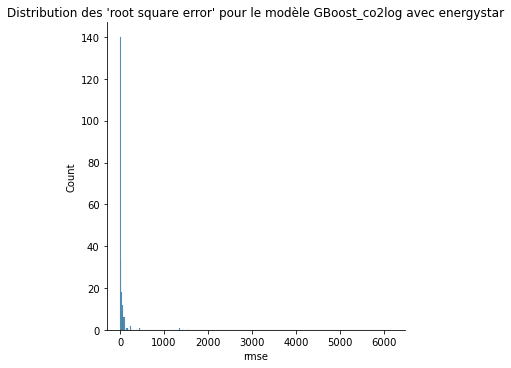

In [277]:
df_GBoost_energy_co2log = df_erreurs(GBoost_energy_co2log, 'co2', True, 'GBoost_co2log avec energystar')

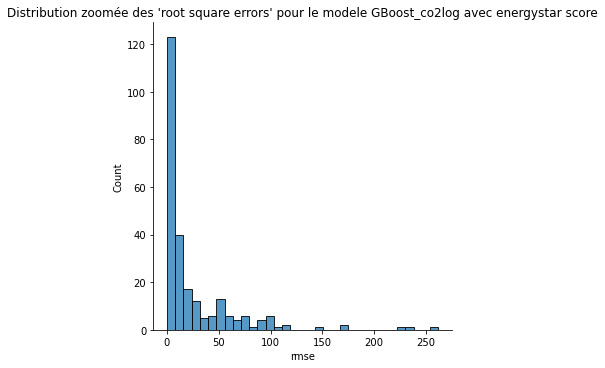

In [278]:
sns.displot(data = df_GBoost_energy_co2log[df_GBoost_energy_co2log.rmse < 300], x = 'rmse')
plt.title('Distribution zoomée des \'root square errors\' pour le modele GBoost_co2log avec energystar score');

In [279]:
X_test.loc[df_GBoost_energy_co2log[df_GBoost_energy_co2log.rmse > 300].index]

buildingtype   primarypropertytype councildistrictcode  \
218   nonresidential                 other                   7   
199   nonresidential  residential services                   7   
1099  nonresidential  residential services                   2   
94    nonresidential               medical                   4   
2     nonresidential  residential services                   7   
15    nonresidential                 other                   7   
388   nonresidential                 other                   7   

      numberofbuildings  numberoffloors  propertygfatotal  propertygfaparking  \
218                 1.0             6.0          378443.0            177660.0   
199                 1.0            19.0          332067.0             59280.0   
1099                1.0             1.0          141297.0              2276.5   
94                  3.5            10.0          879000.0                 0.0   
2                   1.0            41.0          956110.0            196718.0   
15                  1.0            10.0          540360.0                 0.0   
388                 1.0            33.0          429405.0                 0.0   

      propertygfabuilding(s) largestpropertyusetype  \
218                 200783.0                  other   
199                 272787.0   residential services   
1099                139020.5   residential services   
94                  879000.0                medical   
2                   759392.0   residential services   
15                  540360.0                  other   
388                 429405.0                  other   

      largestpropertyusetypegfa secondlargestpropertyusetype  \
218                    200783.0                        aucun   
199                    332067.0                        aucun   
1099                   141297.0                        aucun   
94                     879000.0                        aucun   
2                      756493.0                        aucun   
15                     537150.0                        aucun   
388                    218997.0                       office   

      secondlargestpropertyusetypegfa thirdlargestpropertyusetype  \
218                               0.0                       aucun   
199                               0.0                       aucun   
1099                              0.0                       aucun   
94                                0.0                       aucun   
2                                 0.0                       aucun   
15                                0.0                       aucun   
388                          210409.0                       aucun   

      thirdlargestpropertyusetypegfa  energystarscore outlier  \
218                              0.0            100.0     non   
199                              0.0              7.0     non   
1099                             0.0             72.5     non   
94                               0.0             11.5     non   
2                                0.0             43.0     non   
15                               0.0             71.5     non   
388                              0.0             84.5     non   

      countofallpropertyusetypes  age_derniere_reno  electricity_ratio  \
218                          1.0                 14                100   
199                          1.0                 43                 50   
1099                         1.0                 49                 40   
94                           1.0                 63                 50   
2                            1.0                 47                 70   
15                           1.0                100                 50   
388                          2.0                 35                100   

      gas_ratio  steam_ratio  other_fuel_ratio  
218           0            0                 0  
199          10           40                 0  
1099         60            0                 0  
94           

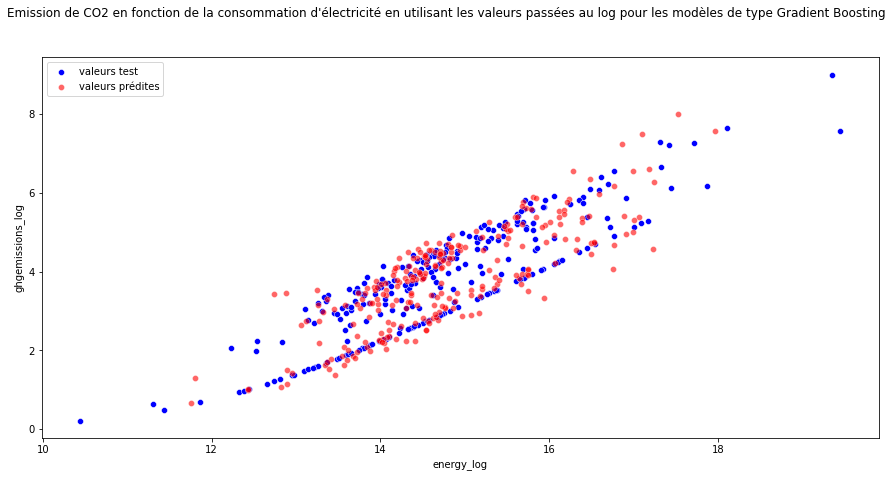

In [280]:
graph(GBoost_energy_eleclog, GBoost_energy_co2log, True, type_modele = 'Gradient Boosting')

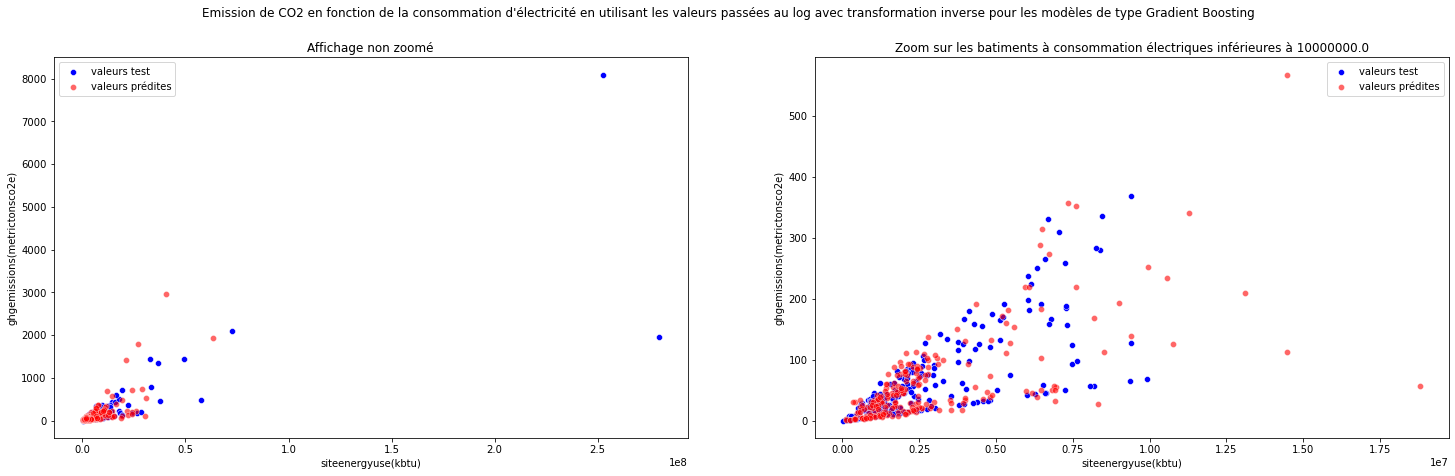

In [281]:
graph(GBoost_energy_eleclog, GBoost_energy_co2log, True, True, type_modele = 'Gradient Boosting')

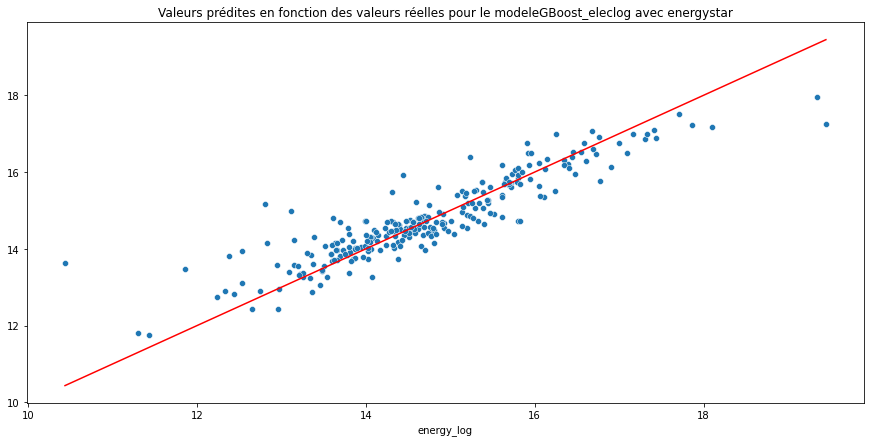

In [282]:
graph_ypred_ytest(y_test_eleclog, GBoost_energy_eleclog.predict(X_test), 'GBoost_eleclog avec energystar')

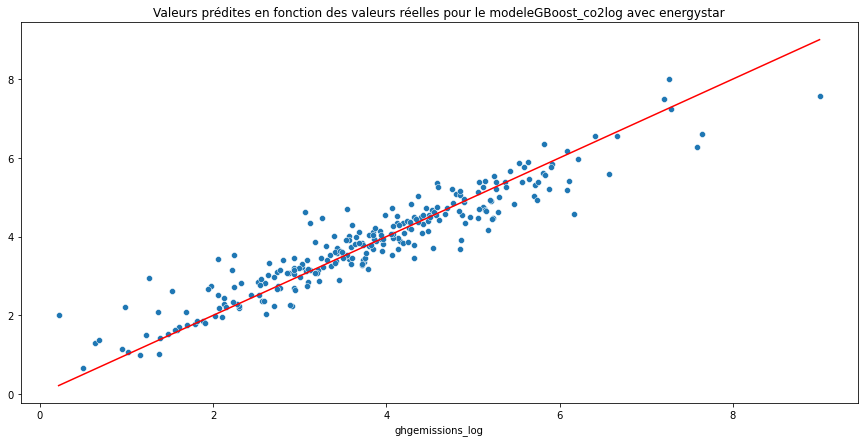

In [283]:
graph_ypred_ytest(y_test_co2log, GBoost_energy_co2log.predict(X_test), 'GBoost_co2log avec energystar')

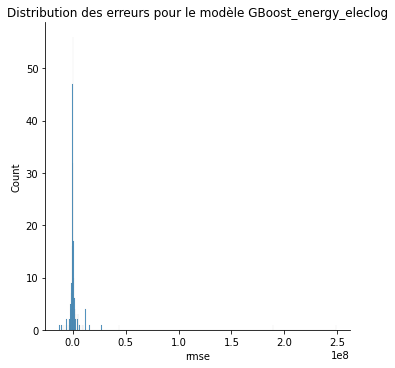

In [284]:
df_gboost_energylog_neg = df_erreurs(GBoost_energy_eleclog, 'elec', True, 'GBoost_energy_eleclog', pos = False, ret = True)

In [285]:
df_gboost_energylog_neg.describe()

energy_log  ghgemissions_log  siteenergyuse(kbtu)  \
count  259.000000        259.000000         2.590000e+02   
mean    14.725263          3.809894         7.111134e+06   
std      1.279959          1.426789         2.446945e+07   
min     10.434858          0.215111         3.402425e+04   
25%     13.873535          2.920451         1.059741e+06   
50%     14.621059          3.783621         2.237922e+06   
75%     15.561141          4.763228         5.736078e+06   
max     19.449495          8.999262         2.797747e+08   

       ghgemissions(metrictonsco2e)  prediction          rmse  
count                    259.000000  259.000000  2.590000e+02  
mean                     147.670792   14.782003  2.184271e+06  
std                      555.044590    1.079804  1.982464e+07  
min                        0.240000   11.760869 -1.282002e+07  
25%                       17.550000   14.068609 -4.961844e+05  
50%                       42.975000   14.634746 -5.511008e+04  
75%                      116.127500   15.509797  6.545011e+05  
max                     8096.110000   17.962864  2.490730e+08

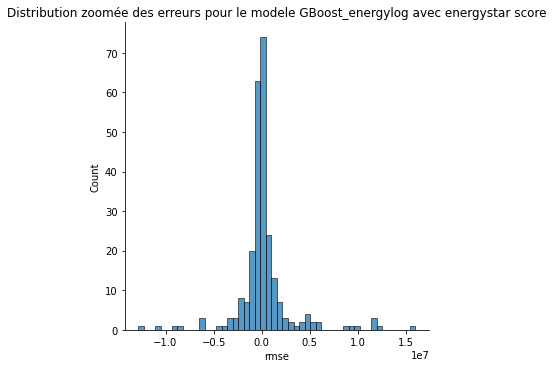

In [286]:
ax = sns.displot(data = df_gboost_energylog_neg[df_gboost_energylog_neg.rmse < 2e07], x = 'rmse', bins = 50)
plt.title('Distribution zoomée des erreurs pour le modele GBoost_energylog avec energystar score');

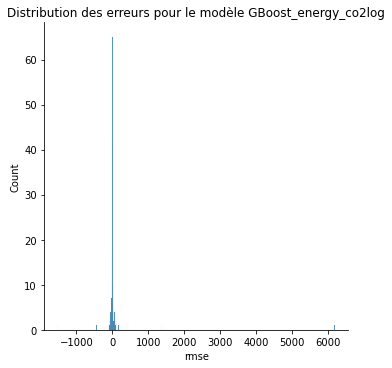

In [287]:
df_gboost_co2log_neg = df_erreurs(GBoost_energy_co2log, 'co2', True, 'GBoost_energy_co2log', pos = False, ret = True)

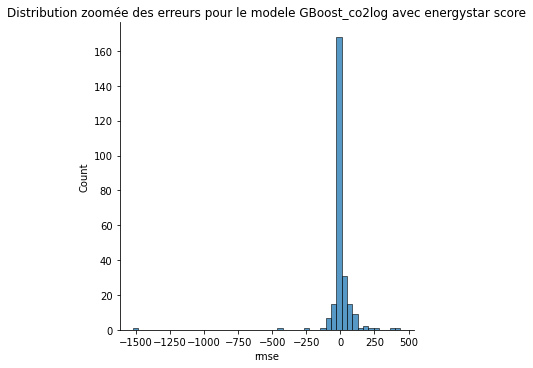

In [288]:
ax = sns.displot(data = df_gboost_co2log_neg[df_gboost_co2log_neg.rmse < 500], x = 'rmse', bins = 50)
plt.title('Distribution zoomée des erreurs pour le modele GBoost_co2log avec energystar score');

## Sans EnergyStar

In [289]:
cat_col_sansenergy, drop_col_sansenergy, num_col_sansenergy = groupcol(data_energystar)

In [290]:
X = data_energystar.drop(drop_col_sansenergy, axis = 1)
y = data_energystar[['energy_log','ghgemissions_log', 'siteenergyuse(kbtu)', 'ghgemissions(metrictonsco2e)']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

y_train_elec, y_test_elec = recupcolonne('siteenergyuse(kbtu)')
y_train_eleclog, y_test_eleclog = recupcolonne('energy_log')
y_train_co2, y_test_co2 = recupcolonne('ghgemissions(metrictonsco2e)')
y_train_co2log, y_test_co2log = recupcolonne('ghgemissions_log')

In [291]:
RFR_sansenergy_eleclog = gridsearch(pipe_RandomForestRegressor, params_RandomForestRegressor, y_train_eleclog)
RFR_sansenergy_co2log = gridsearch(pipe_RandomForestRegressor, params_RandomForestRegressor, y_train_co2log)

In [292]:
GBoost_sansenergy_eleclog = gridsearch(pipe_GBoost, params_GBoost, y_train_eleclog)
GBoost_sansenergy_co2log = gridsearch(pipe_GBoost, params_GBoost, y_train_co2log)

In [293]:
rmse(RFR_sansenergy_eleclog, 'elec', True)

21221296.37990065

In [294]:
rmse(RFR_sansenergy_co2log, 'co2', True)

453.67730094503753

In [295]:
rmse(GBoost_sansenergy_eleclog, 'elec', True)

18246773.069439396

In [296]:
rmse(GBoost_sansenergy_co2log, 'co2', True)

301.3802413468059

In [297]:
cols = []

encoder = RFR_sansenergy_eleclog.best_estimator_.named_steps['preprocessing'].transformers_

for i in np.arange(5):
    
    cols += encoder[i][1].get_feature_names(encoder[i][2]).tolist()

cols +=num_col_sansenergy

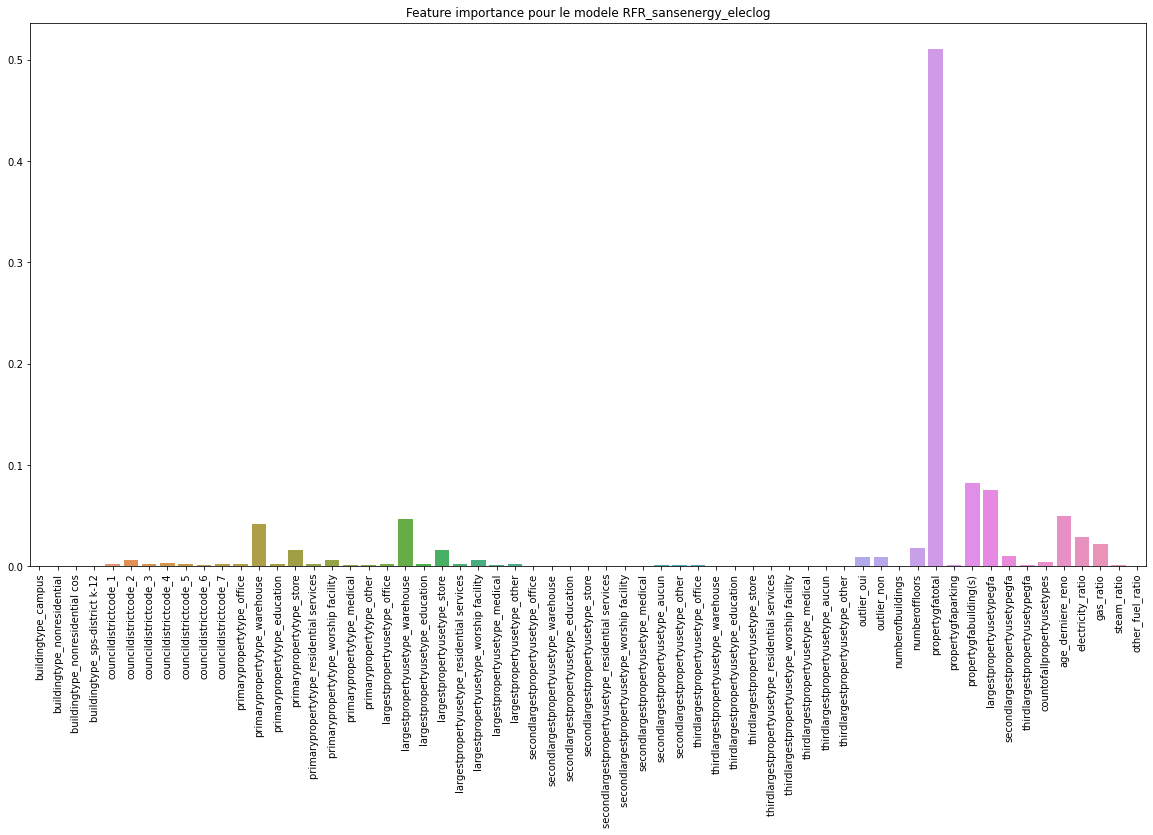

In [298]:
graph_feature_imp(RFR_sansenergy_eleclog, 'RFR_sansenergy_eleclog')

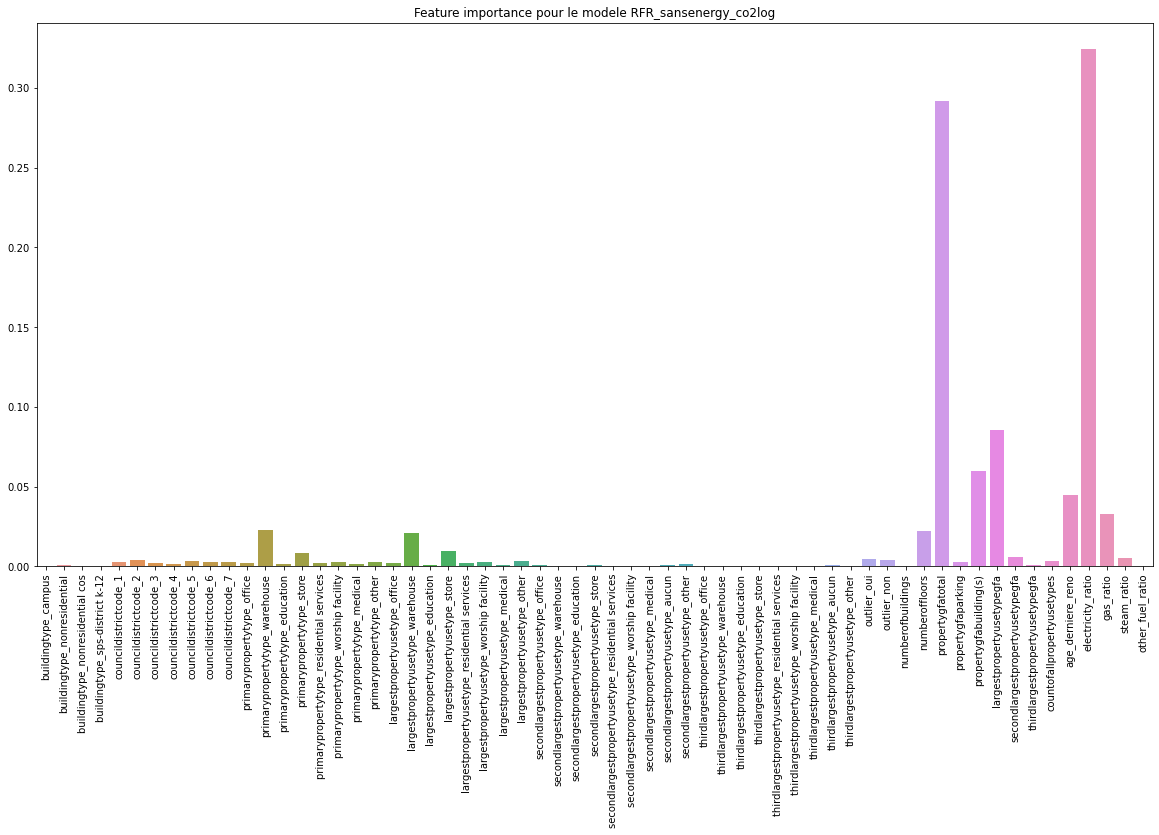

In [299]:
graph_feature_imp(RFR_sansenergy_co2log, 'RFR_sansenergy_co2log')

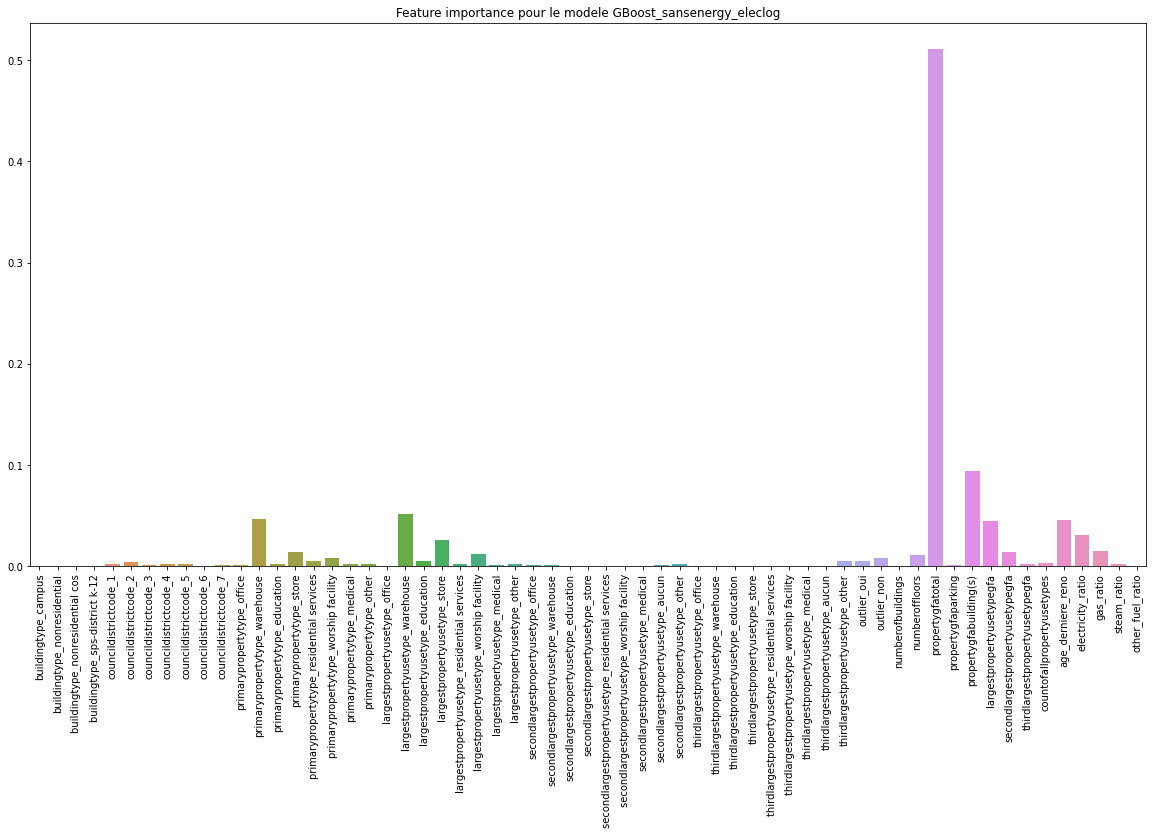

In [300]:
graph_feature_imp(GBoost_sansenergy_eleclog, 'GBoost_sansenergy_eleclog')

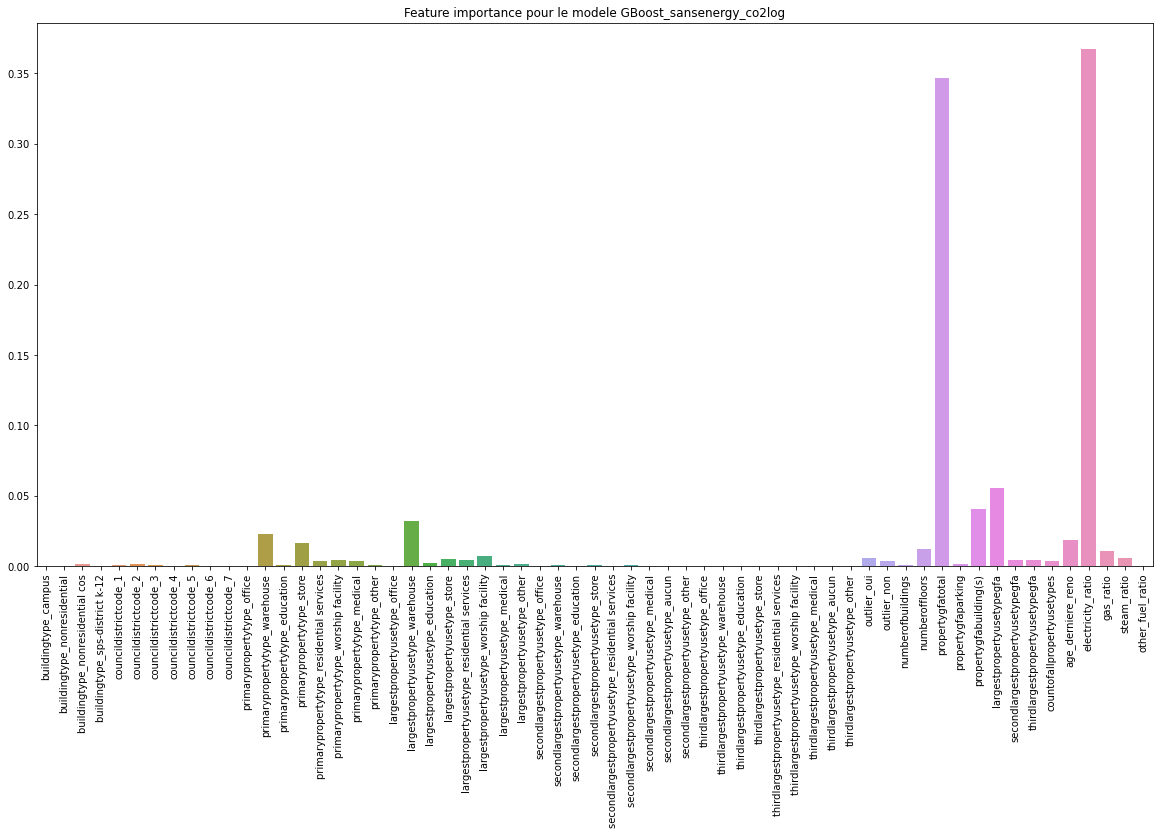

In [301]:
graph_feature_imp(GBoost_sansenergy_co2log, 'GBoost_sansenergy_co2log')

In [302]:
for i in [RFR_sansenergy_eleclog, RFR_sansenergy_co2log, GBoost_sansenergy_eleclog, GBoost_sansenergy_co2log]:
    print(i.best_params_)

{'estimator__bootstrap': True, 'estimator__max_depth': None, 'estimator__max_features': 'auto', 'estimator__min_samples_leaf': 2, 'estimator__min_samples_split': 5, 'estimator__n_estimators': 300}
{'estimator__bootstrap': True, 'estimator__max_depth': 20, 'estimator__max_features': 'auto', 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__n_estimators': 300}
{'estimator__learning_rate': 0.1, 'estimator__loss': 'huber', 'estimator__max_depth': 5, 'estimator__min_samples_split': 2, 'estimator__n_estimators': 100}
{'estimator__learning_rate': 0.1, 'estimator__loss': 'huber', 'estimator__max_depth': 3, 'estimator__min_samples_split': 5, 'estimator__n_estimators': 200}


In [303]:
dic_sansenergystar = {'RFR_elec' : RFR_sansenergy_eleclog, 'RFR_co2' : RFR_sansenergy_co2log, 'GBoost_elec' : GBoost_sansenergy_eleclog, 'GBoost_co2' : GBoost_sansenergy_co2log}

In [304]:
for model,y in zip(dic_sansenergystar, [y_test_eleclog, y_test_co2log, y_test_eleclog, y_test_co2log]):
    print(model, 'avec energystar a un R2 score de', dic_sansenergystar[model].score(X_test, y))

RFR_elec avec energystar a un R2 score de 0.6870638223369678
RFR_co2 avec energystar a un R2 score de 0.7916805259712539
GBoost_elec avec energystar a un R2 score de 0.6926251393514253
GBoost_co2 avec energystar a un R2 score de 0.8046889425022478


In [305]:
for model,y in zip(dic_sansenergystar, [y_test_eleclog, y_test_co2log, y_test_eleclog, y_test_co2log]):
    print(model, 'sans energystar a un fit time de', dic_sansenergystar[model].refit_time_, 'secondes')

RFR_elec sans energystar a un fit time de 0.7879514694213867 secondes
RFR_co2 sans energystar a un fit time de 1.081982135772705 secondes
GBoost_elec sans energystar a un fit time de 0.6946303844451904 secondes
GBoost_co2 sans energystar a un fit time de 0.5084617137908936 secondes


In [306]:
import time

start = time.time()

#actions
time.sleep(2)

end = time.time()

In [307]:
end-start #temsp en seconde pour effectuer actions

2.0150790214538574